# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle to make black and white images and dashed and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [2]:
#Extra Headers:
import os as os
import pywt as py
import statistics as st
import os as os
import random
import multiprocessing
from joblib import Parallel, delayed
import platform

from time import time as ti

In [3]:
import CoreFunctions as cf

## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [4]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [5]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [6]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Recordings2/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\SubSet\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

In [ ]:
files = os.listdir(folder)

In [69]:
files = ['220923 recording3.csv',
        '221011 recording2.csv',
        '221011 recording3.csv',
        '221006 recording3.csv',
        '221006 recording2.csv',
        '221024 recording2a.csv',
        '221011 recording3a.csv',
        '221017 recording2.csv',
        '220919 recording3.csv',
        '220919 recording2.csv',
        '221020 recording1a.csv',
        '221011 recording2a.csv',
        '221012 recording4a.csv',
        '221024 recording3a.csv',
        '221109 recording2a.csv']

In [ ]:
Saving = False
location = folder
Titles = True
Ledgends = True
i=0
#file = files[1]
#file = '220919 recording1.csv'

def lineCount(file):
    count = 0
    if file[-3:] == 'csv':
        with open(folder+file, 'r') as fp:
            for count, line in enumerate(fp):
                pass
    return [file, count + 1]

result = Parallel(n_jobs=61)(delayed(lineCount)(file) for file in files)


220923 recording3.csv
221011 recording2.csv
221011 recording3.csv
221006 recording3.csv
221006 recording2.csv
221024 recording2a.csv
221011 recording3a.csv
221017 recording2.csv
220919 recording3.csv
220919 recording2.csv
221020 recording1a.csv
221011 recording2a.csv
221012 recording4a.csv
221024 recording3a.csv
221109 recording2a.csv
221109 recording2.csv
221024 recording3.csv
221024 recording2.csv
221113 recording4.csv
221028 recording3a.csv
221028 recording3.csv
221104 recording3a.csv
221129 recording1a.csv
221107 recording2.csv
221109 recording3.csv
221109 recording3a.csv

In [ ]:
files=[]
for res in result:
    if res[1] > 11000000 and res[1] < 14000000:
        print(res[0])
        files.append(res[0])

In [ ]:
def saveimgFile(file):
    try:
        ODataSet = np.genfromtxt(open(folder+file,'r'), delimiter=',',skip_header=0)
        FullVell = getVelocity2(ODataSet[:,3],ODataSet[:,2])
        fig=plt.figure(figsize=(6.67,3.75),dpi=200,linewidth=0.5)
        plt.plot(FullVell)
        plt.savefig(rootfolder+'tempImg/'+file+'.png')
    except:
        pass
    return 1

In [ ]:
ahhhh = Parallel(n_jobs=61)(delayed(saveimgFile)(file) for file in files)

In [7]:
ODataSet = np.genfromtxt(open(folder+'220919 recording3.csv','r'), delimiter=',',skip_header=0)

In [ ]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(ODataSet[1900000:1950000,3])
plt.title(file)
plt.show()


In [ ]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(ODataSet[1810000:1910000,4])
plt.plot(ODataSet[1810000:1910000,5])
plt.plot(ODataSet[1810000:1910000,3])
plt.show()


In [8]:
LbPX = cf.Smoothing(ODataSet[:,3],2)
LbPY = cf.Smoothing(ODataSet[:,4],2)
LbPZ = cf.Smoothing(ODataSet[:,5],2)



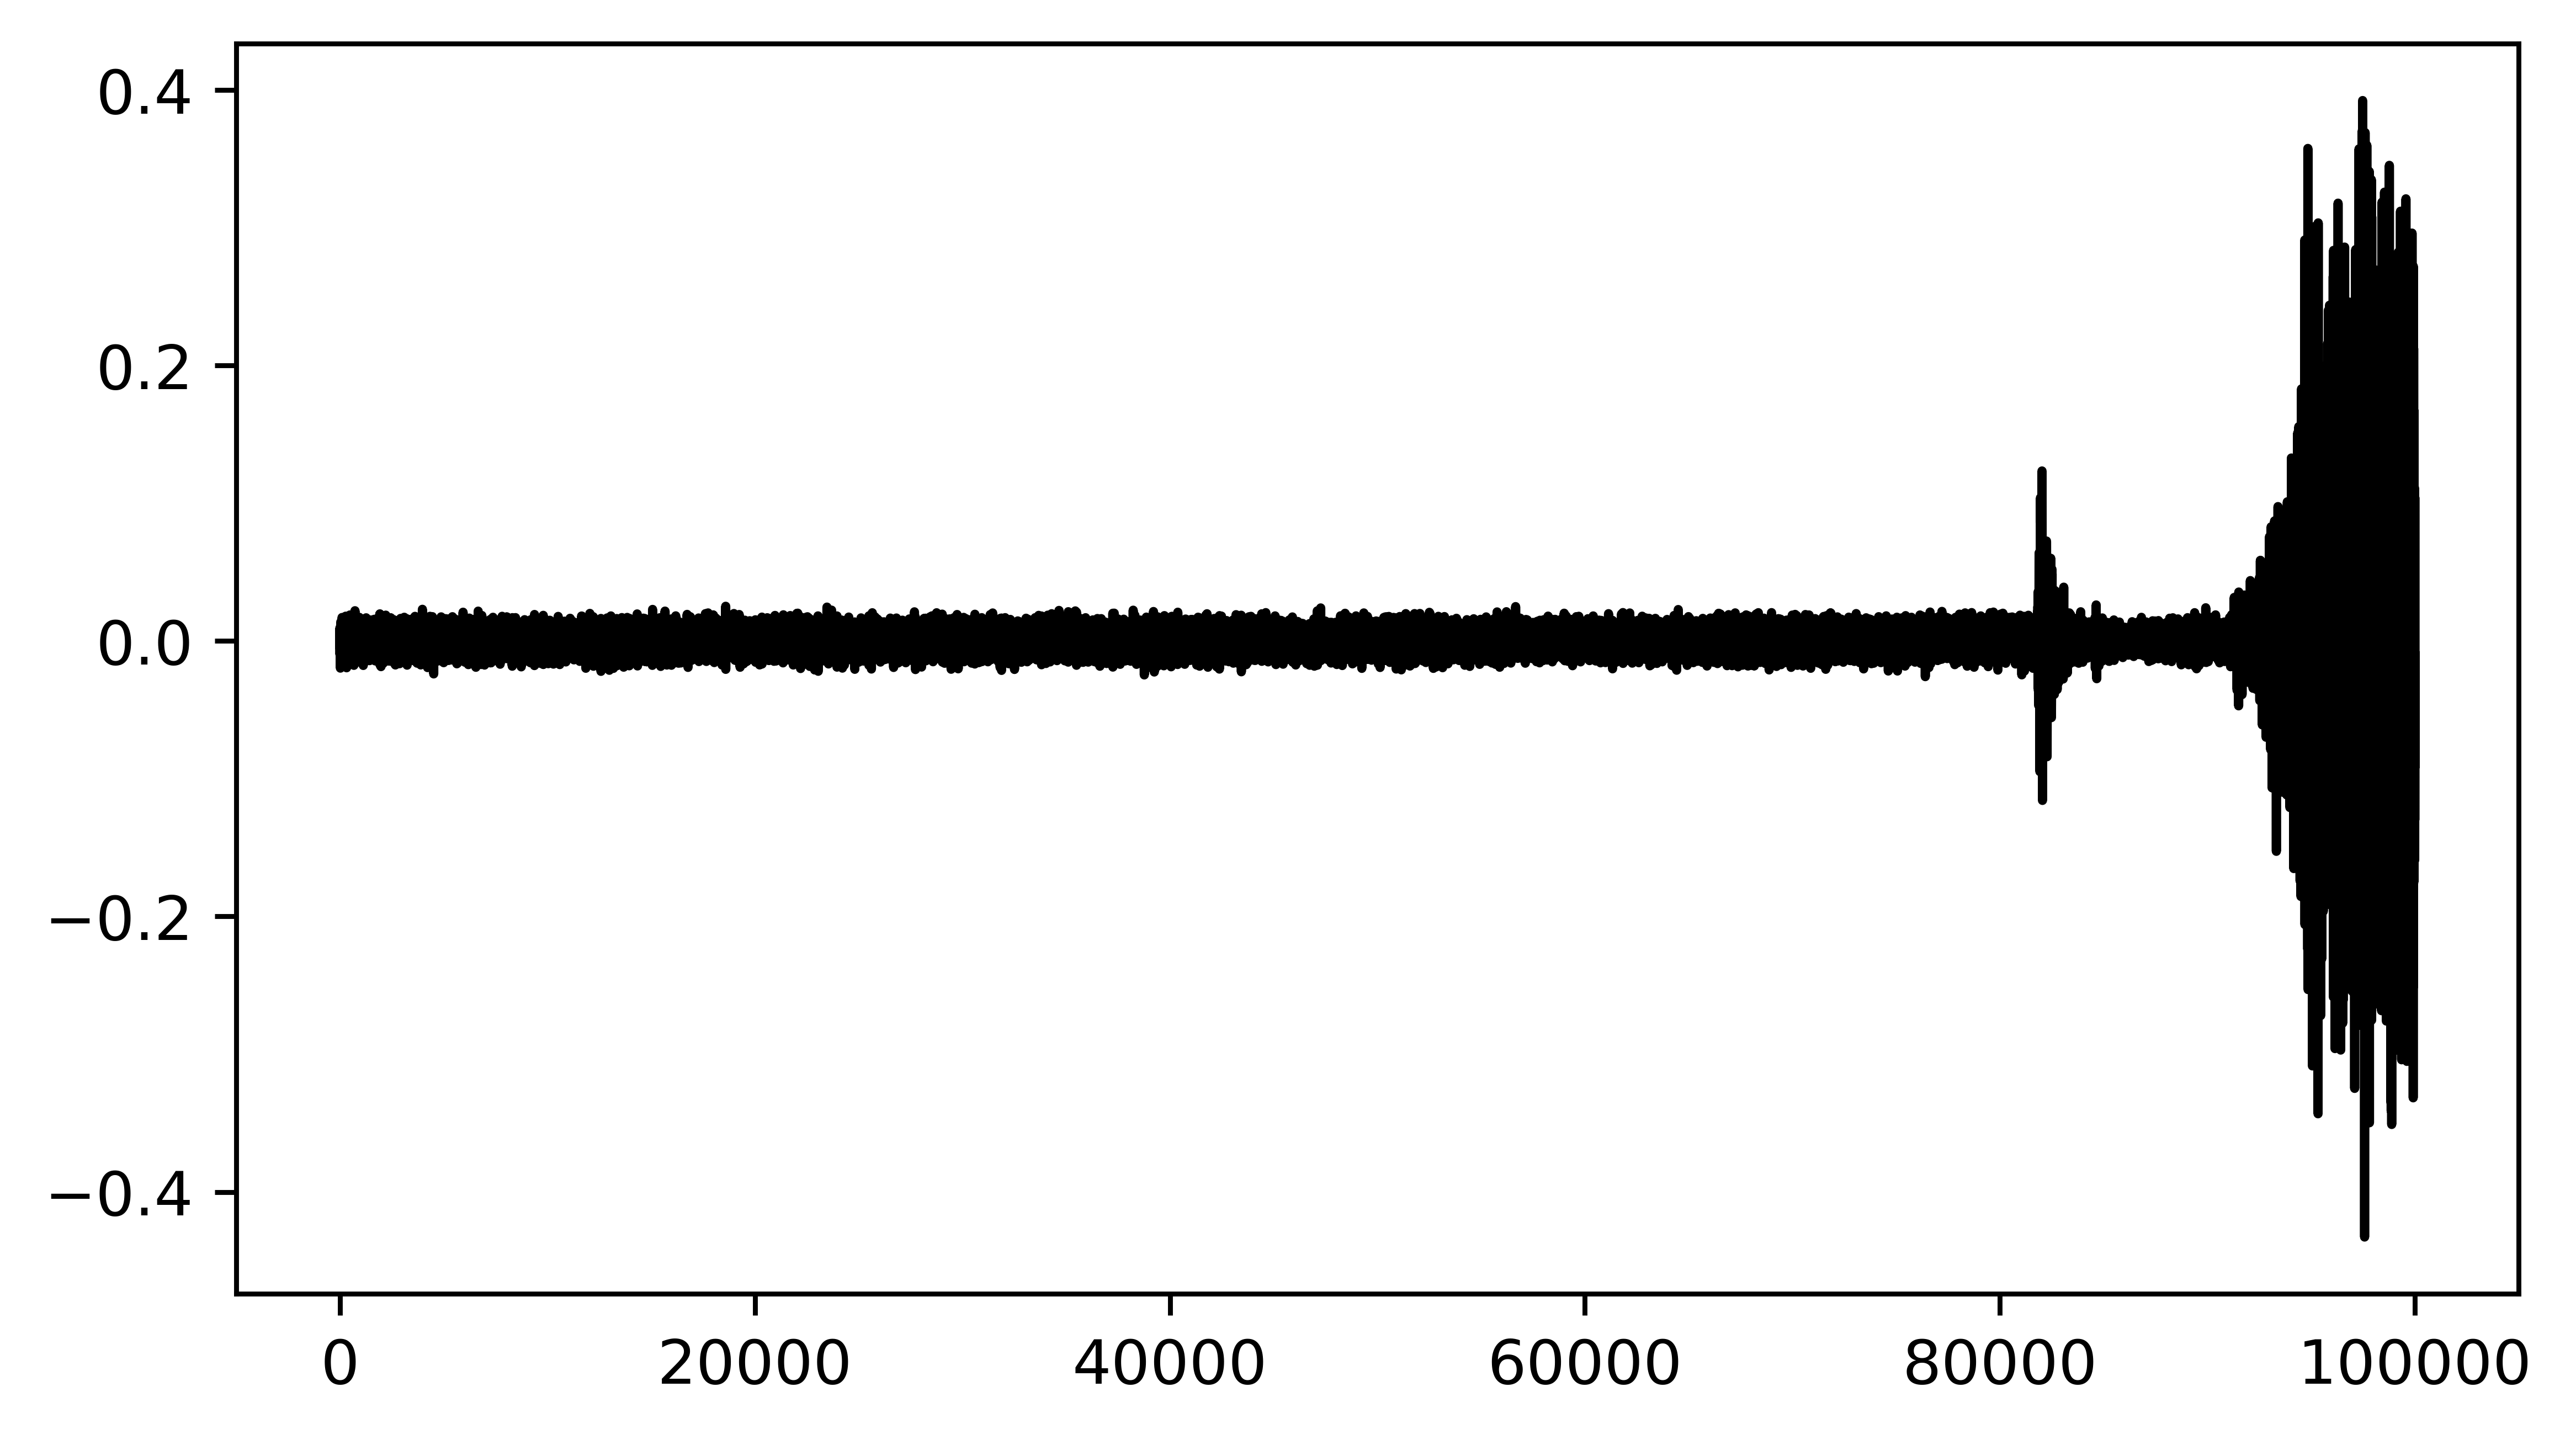

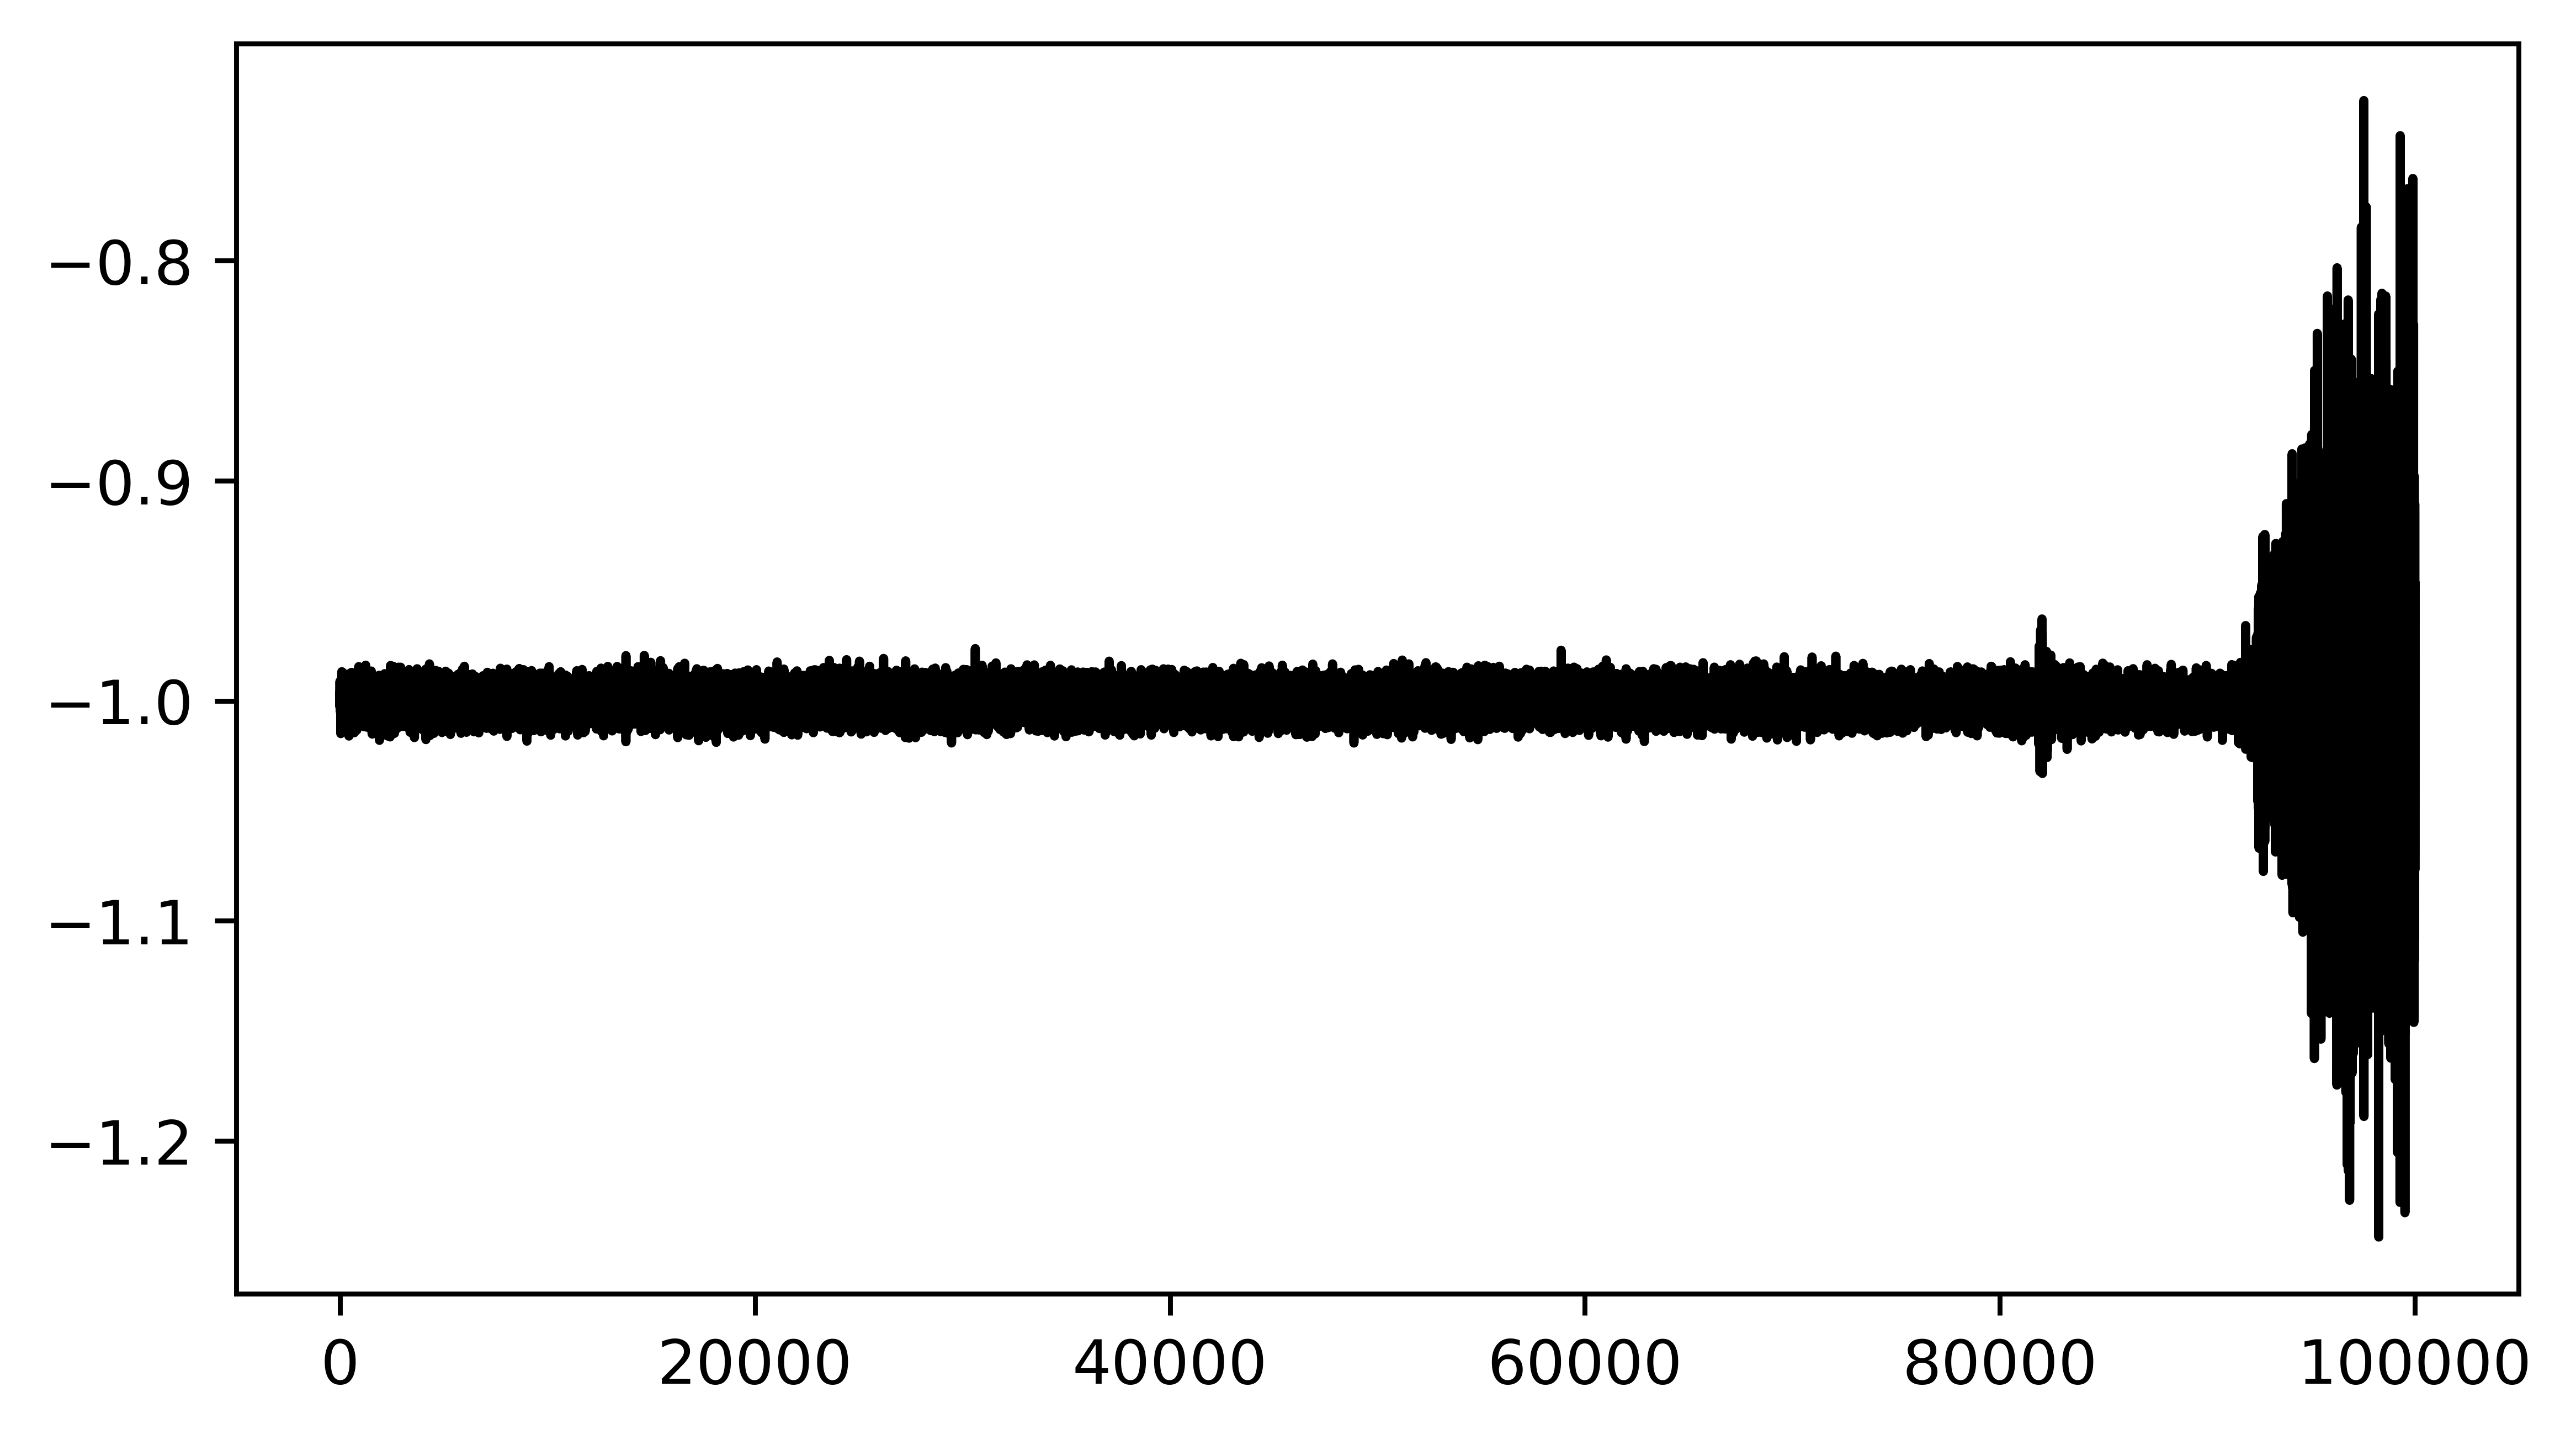

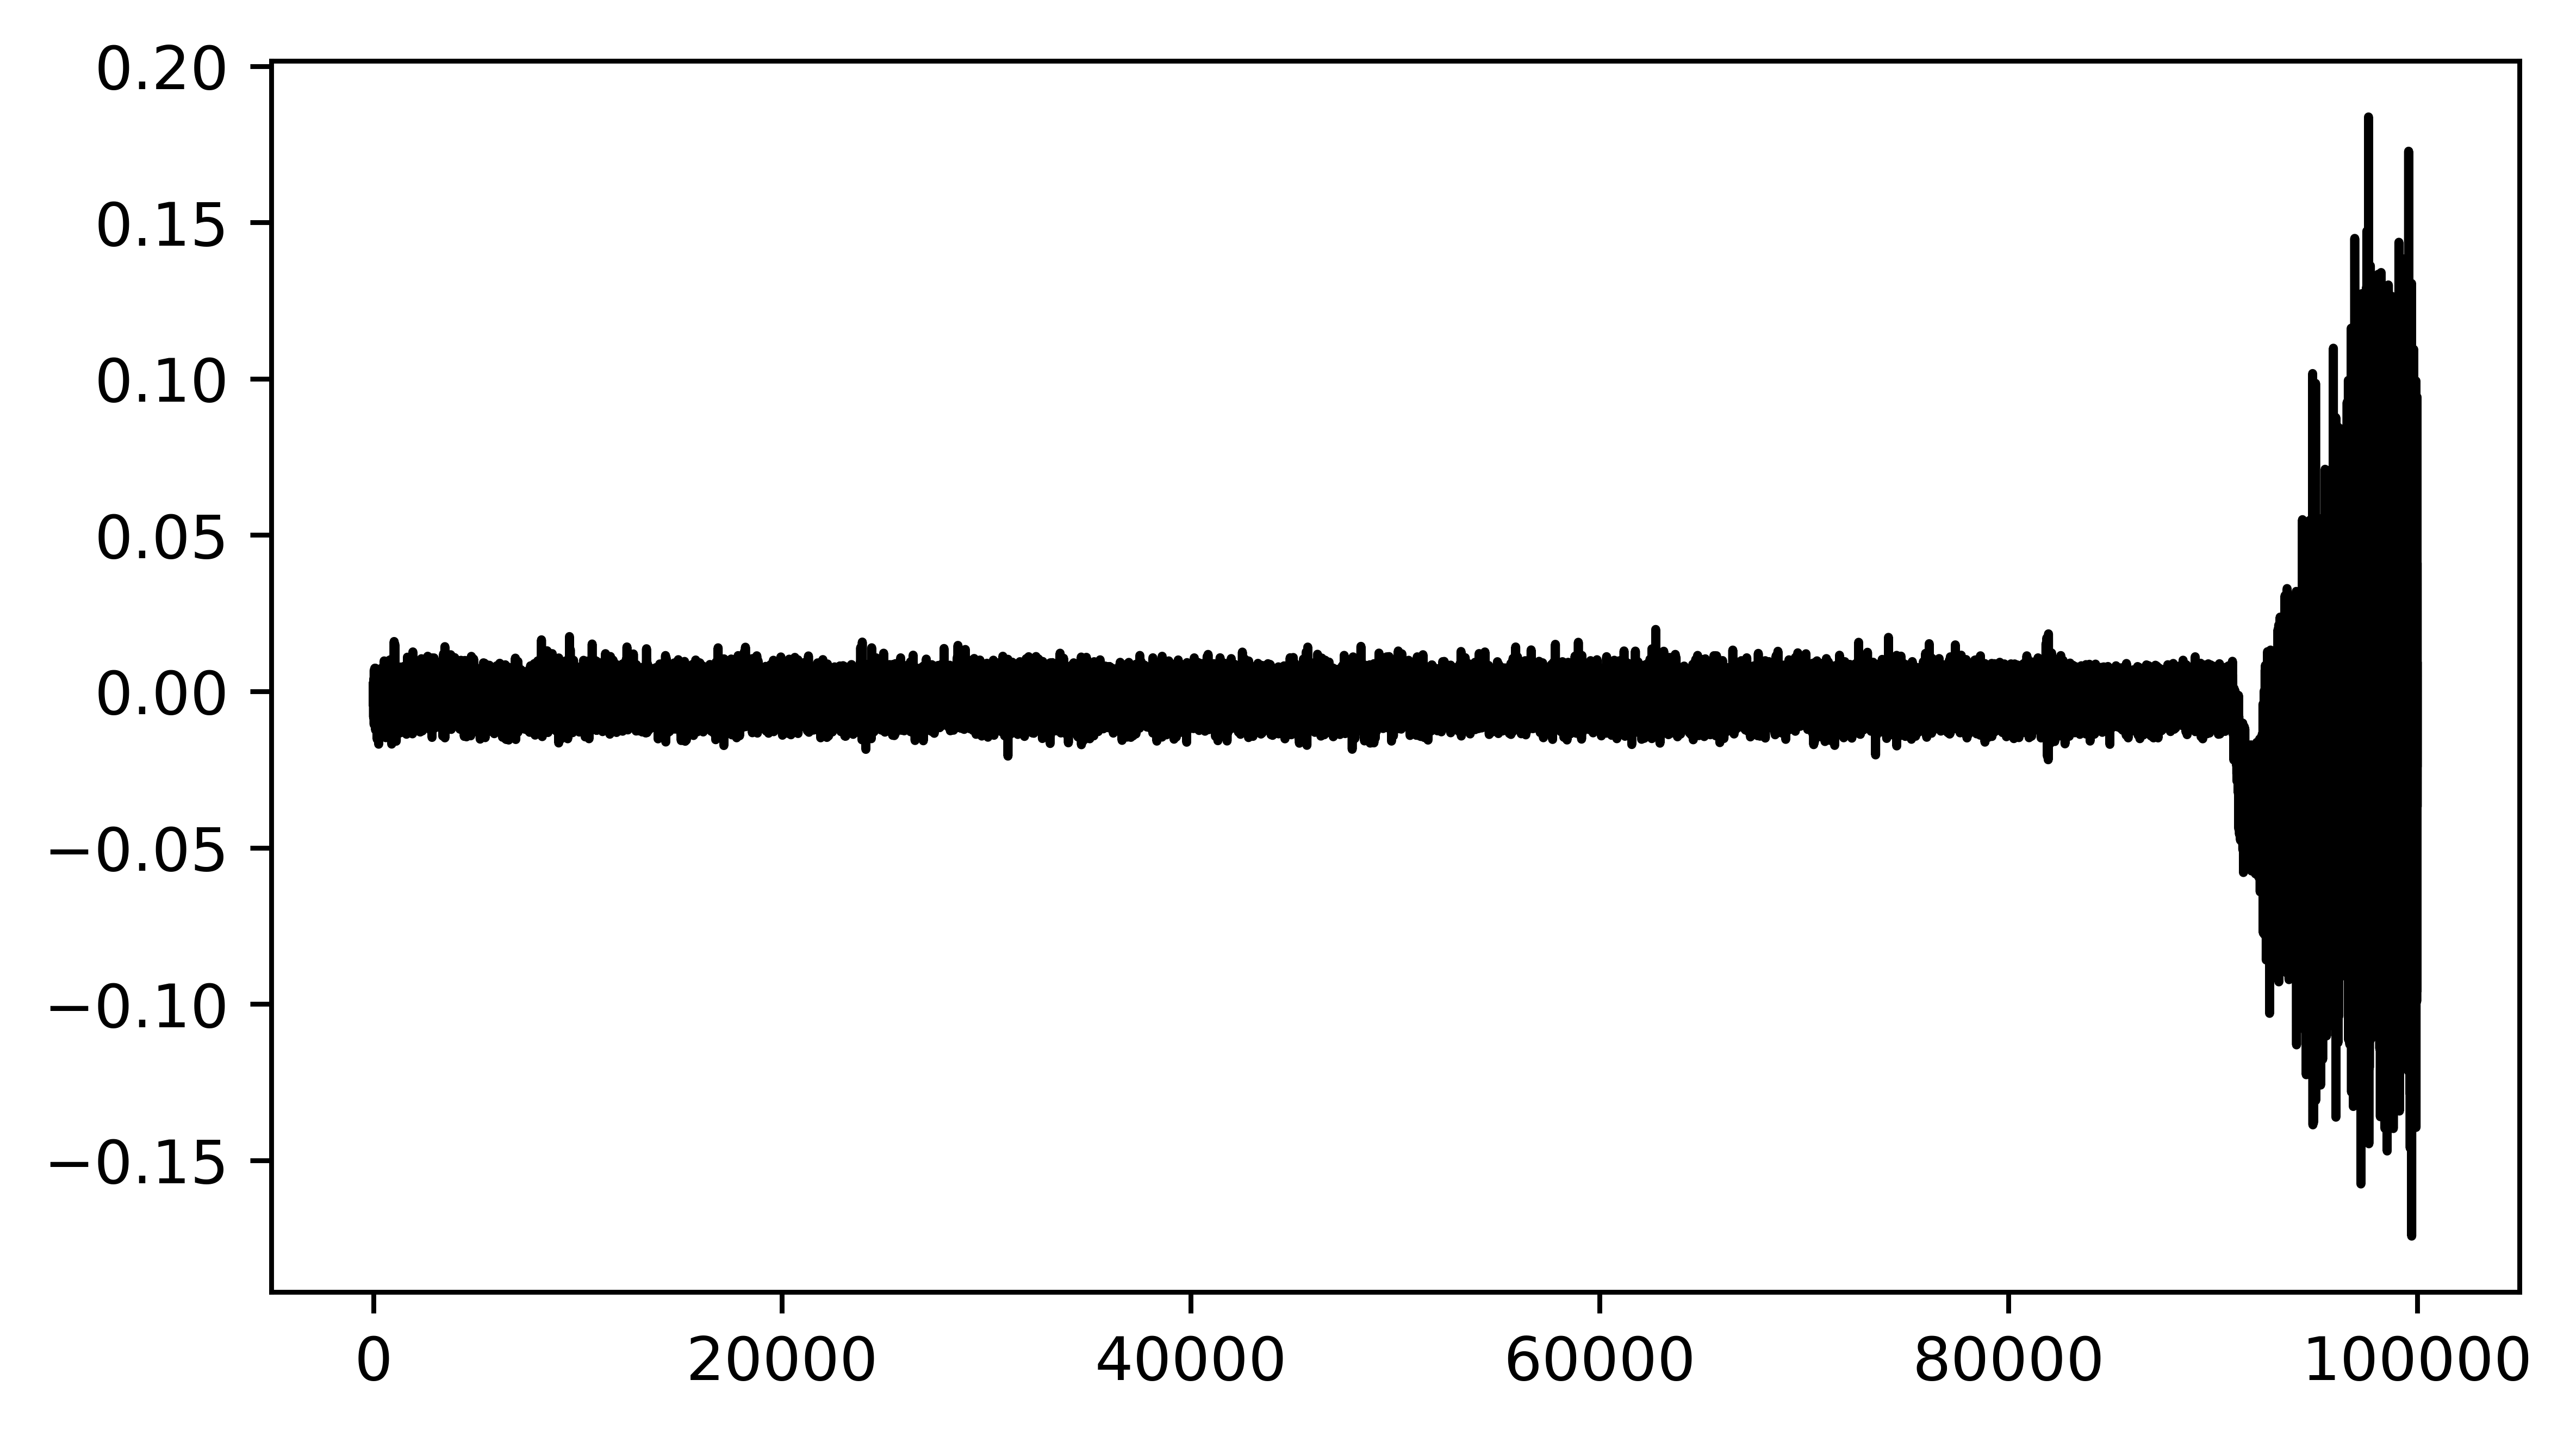

In [9]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(LbPY[1810000:1910000])
plt.show()

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(LbPZ[1810000:1910000])
plt.show()

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(LbPX[1810000:1910000])
plt.show()


In [10]:

def getVelocity(Acceleration, Timestamps = 0.003, corrected = False):
    velocity = np.zeros(len(Acceleration))
    
    if len(Timestamps) == 1:
        dTime = Timestamps
    elif len(Timestamps) == len(Acceleration):
        totTime = 0
        for i in range(len(Timestamps)-1):
            if Timestamps[i]<Timestamps[i+1]:
                totTime += (Timestamps[i+1] - Timestamps[i])
            else:
                totTime += (Timestamps[i+1] - Timestamps[i] + 10000)
        dTime = totTime / len(Timestamps)
    else:
        print('error')

    dTime = dTime / 10000.0

    velocity[0] = Acceleration[0] * (dTime)

    for i in range(len(Acceleration)-1):
        j = i + 1
        velocity[j] = velocity[i] + Acceleration[j] * dTime

    if corrected:
        PointVairance = velocity[-1:] / len(velocity)
        for i in range(len(velocity)):
            velocity[i] -=  PointVairance * i
    
    velocity *= 9.81

    return velocity


def getVelocity2(Acceleration, Timestamps = 0.003, corrected = False):
    velocity = np.zeros(len(Acceleration))
    dt = np.zeros(len(Timestamps))

    #print(len(Acceleration), len(Timestamps), len(dt))

    if len(Timestamps) == 1:
        dTime = Timestamps
    elif len(Timestamps) == len(Acceleration):
        totTime = 0
        for i in range(len(Timestamps)-1):
            
            if Timestamps[i]<Timestamps[i+1]:
                totTime += (Timestamps[i+1] - Timestamps[i])
                dt[i] = ((Timestamps[i+1] - Timestamps[i])/10000.0)
            else:
                totTime += (Timestamps[i+1] - Timestamps[i] + 10000)
                dt[i] = ((Timestamps[i+1] - Timestamps[i] + 10000)/10000.0)
        dTime = totTime / len(Timestamps)
    else:
        print('error')

    dt[-1:]= dt[-2:-1]
    
    dTime = dTime / 10000.0
    
    velocity[0] = Acceleration[0] * (dt[0])

    for i in range(len(Acceleration)-1):
        j = i + 1
        velocity[j] = velocity[i] + Acceleration[j] * dt[j]

    if corrected:
        PointVairance = velocity[-1:] / len(velocity)
        for i in range(len(velocity)):
            velocity[i] -=  PointVairance * i
    
    velocity *= 9.81
    
    return velocity
    


In [ ]:
np.shape(LbPX)[0]/200000

In [ ]:
for i in range(59):
    Vs = getVelocity(LbPX[i*200000:(i+1)*200000], ODataSet[i*200000:(i+1)*200000,2])
    V2s = getVelocity2(LbPX[i*200000:(i+1)*200000], ODataSet[i*200000:(i+1)*200000,2])
    fig=plt.figure(figsize=(6.67,3.75),dpi=200,linewidth=0.5)
    plt.plot(Vs)
    plt.plot(V2s)
    plt.savefig(rootfolder+'tempImg/findspot'+str(i)+'.png')

In [11]:
V=getVelocity(ODataSet[:,3], ODataSet[:,2])
Vs = getVelocity(LbPX[1500000:1600000], ODataSet[1500000:1600000,2])
V2s = getVelocity2(LbPX[1500000:1600000], ODataSet[1500000:1600000,2],True)

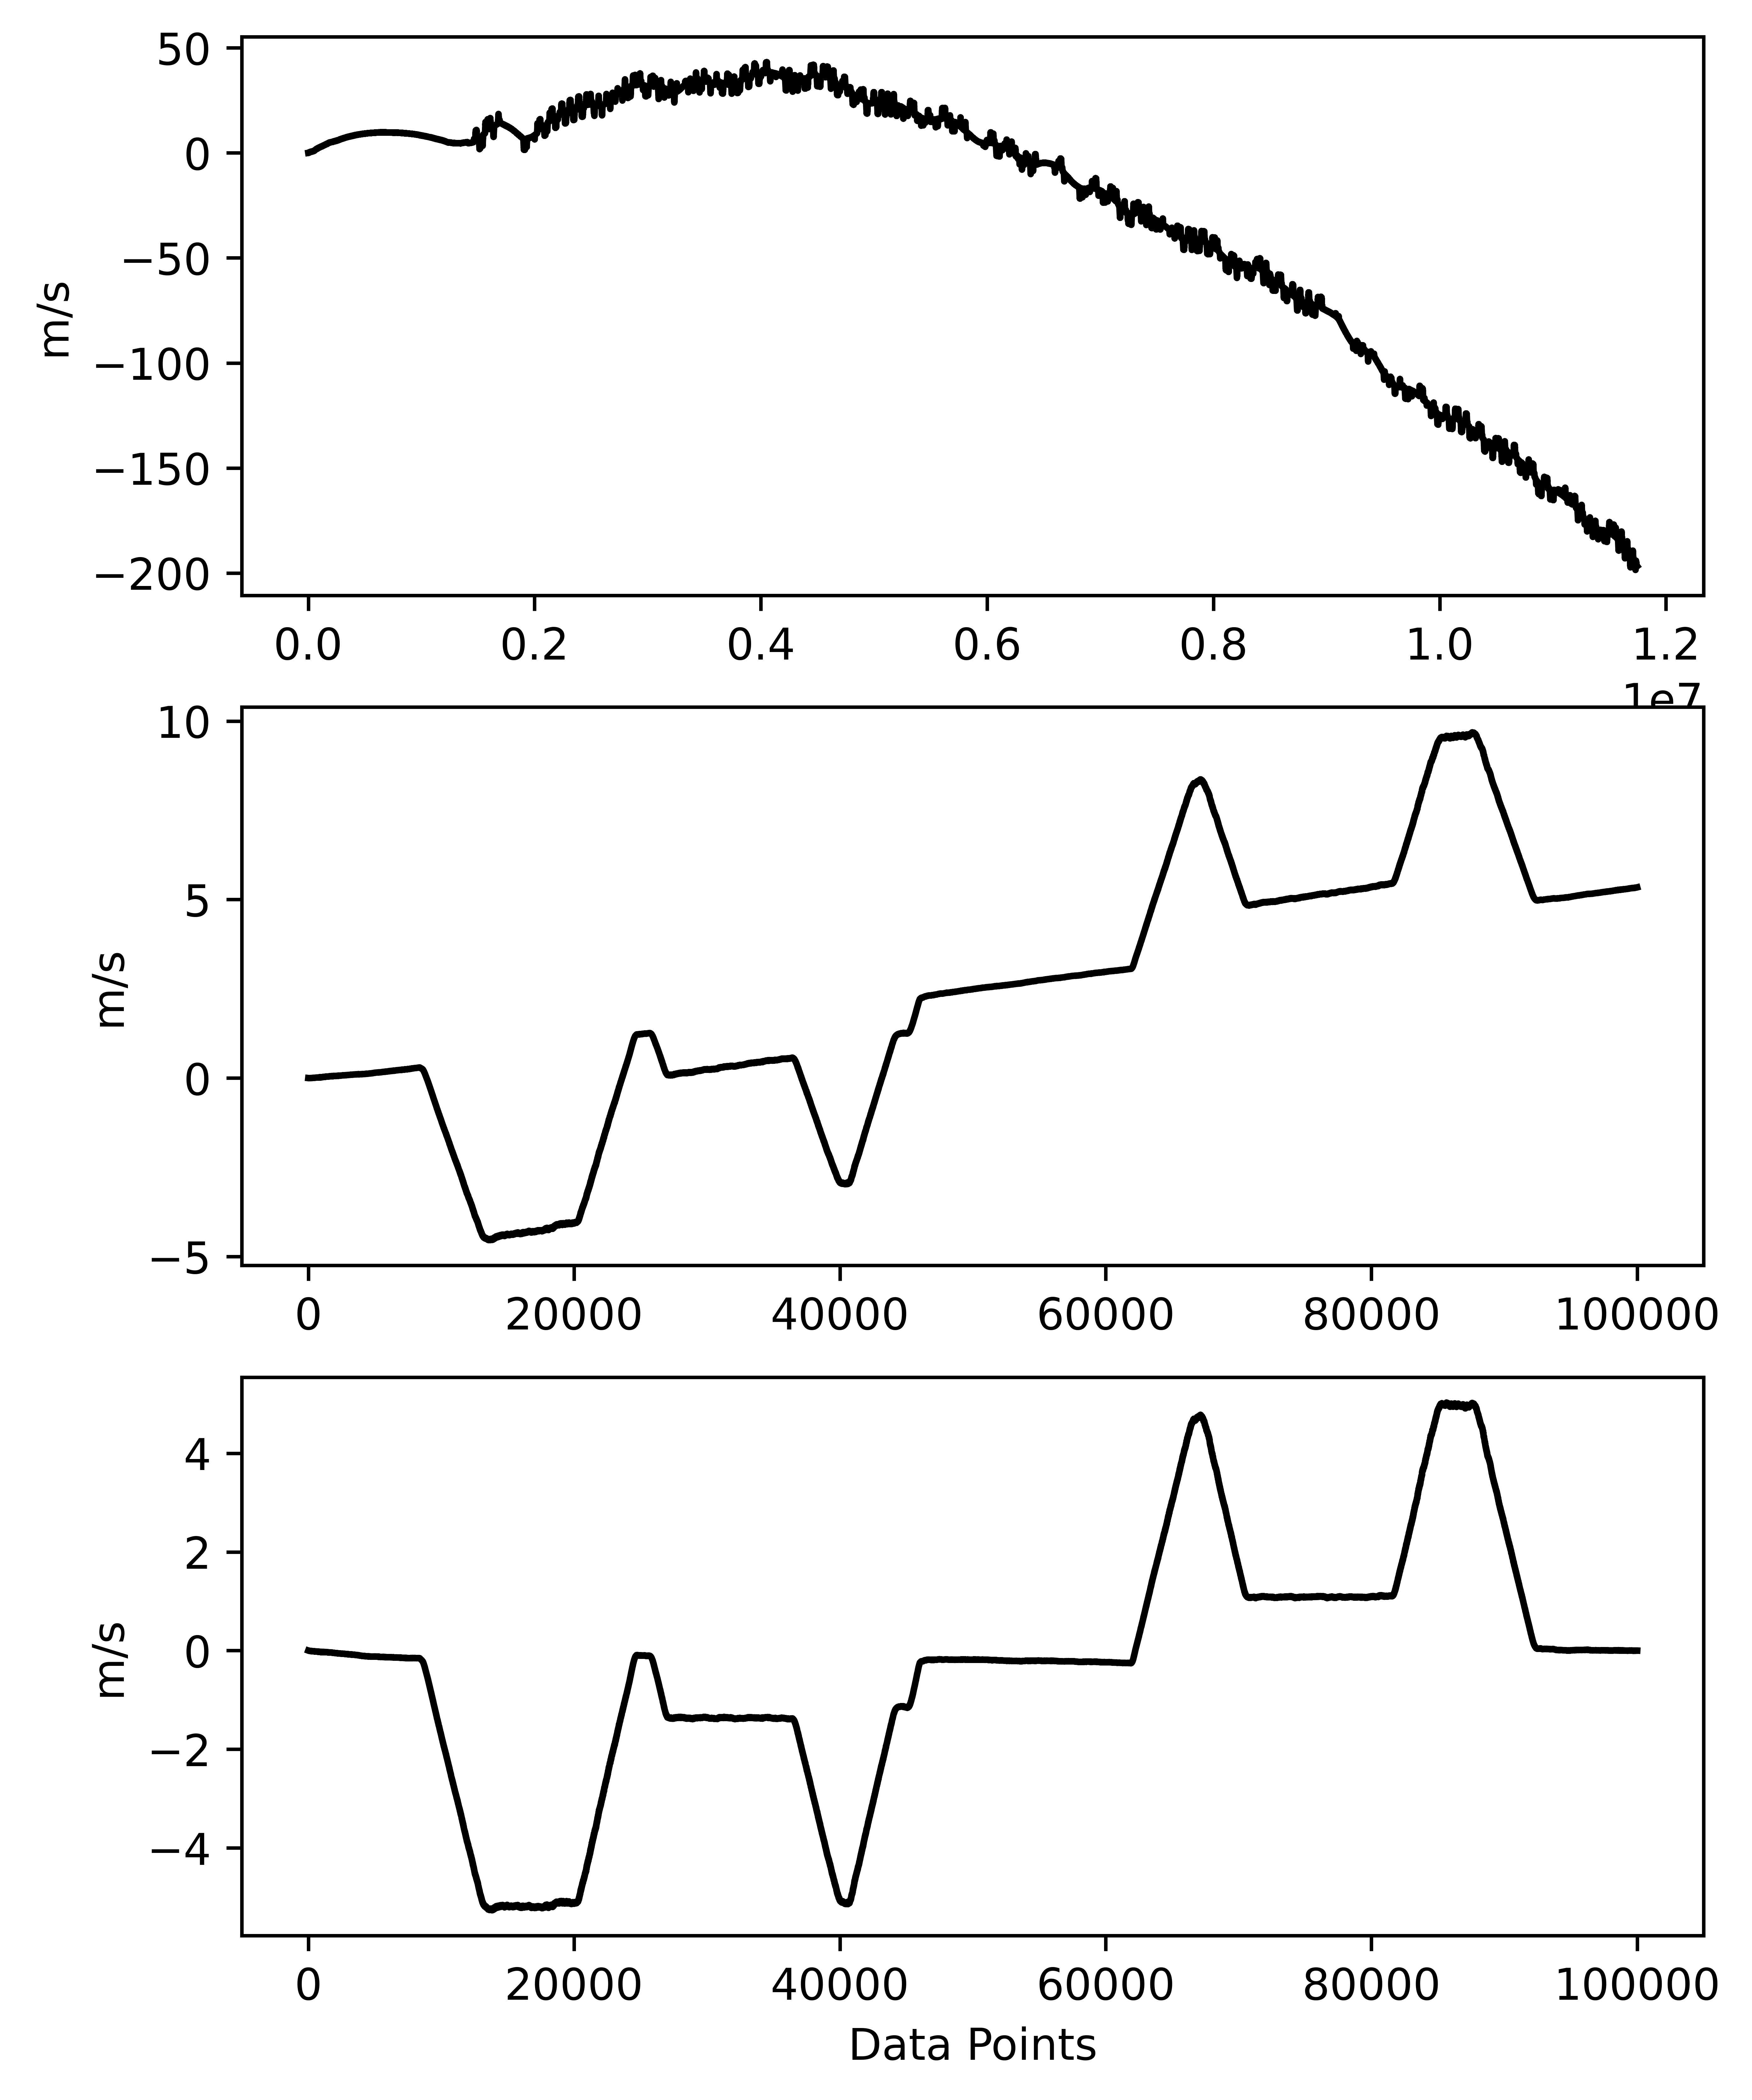

In [14]:
fig, axis =plt.subplots(3,1,figsize=(6,8),dpi=1000,linewidth=0.125)
axis[0].plot(V)
axis[1].plot(Vs)
axis[2].plot(V2s)
axis[2].set_xlabel('Data Points')
axis[0].set_ylabel('m/s')
axis[1].set_ylabel('m/s')
axis[2].set_ylabel('m/s')
#plt.savefig(rootfolder+'DriftAndCorrection.png',transparent=False)
plt.show()

In [25]:
def getSecondsFromString(Value):
    Hour = int(Value[0:2])
    Minute = int(Value[2:4])
    Seconds = int(Value[4:6])
    
    Total = (Hour * 3600) + (Minute * 60) + Seconds

    return Total


Text(0, 0.5, 'm/s')

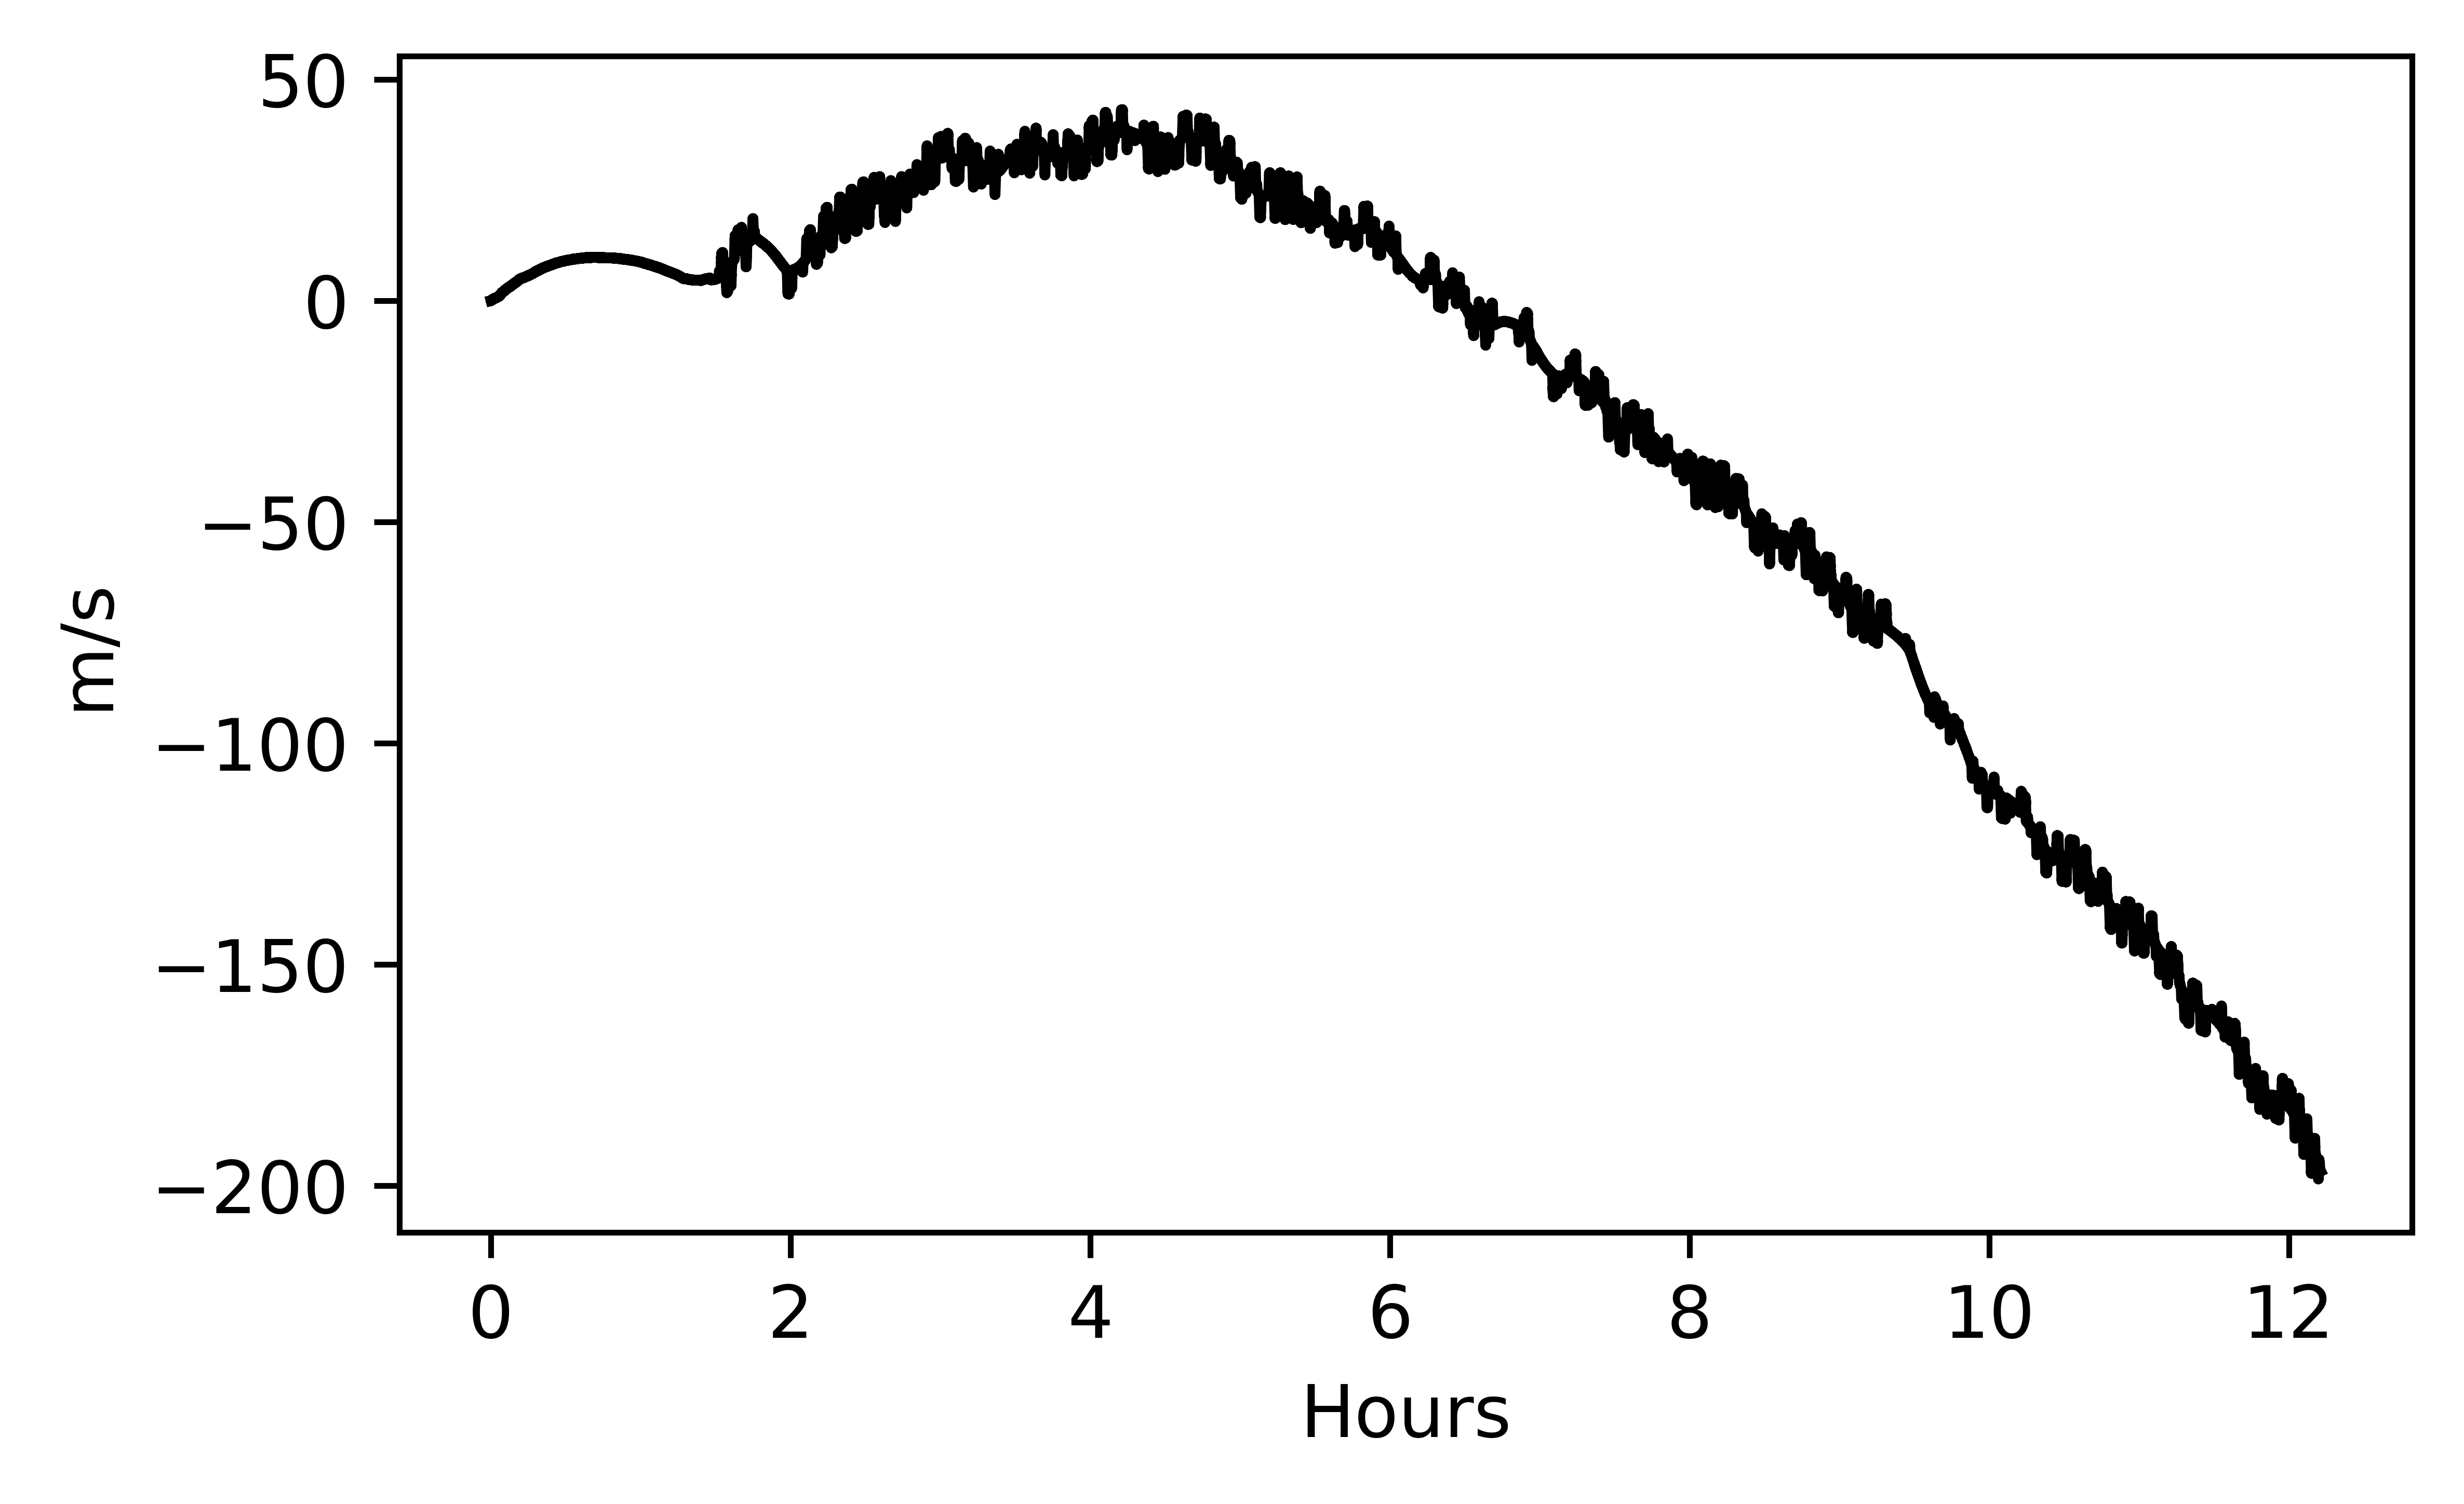

In [53]:
Seconds = getSecondsFromString(str(ODataSet[-2,1])) - getSecondsFromString(str(ODataSet[0,1]))
TotalTime = np.linspace(0,Seconds/3600, np.shape(ODataSet[:,2])[0])
fig, ax = plt.subplots(1,1,figsize=(5,3),dpi=1000,linewidth=0.0625)
ax.plot(TotalTime, V )
ax.set_xlabel('Hours')
ax.set_ylabel('m/s')

In [54]:
start = getSecondsFromString(str(ODataSet[1600000,1])) 
end = getSecondsFromString(str(ODataSet[1500000,1]))
TotalTime = np.linspace(start/60,end/60, 1600000-1500000)


Text(0, 0.5, 'm/s')

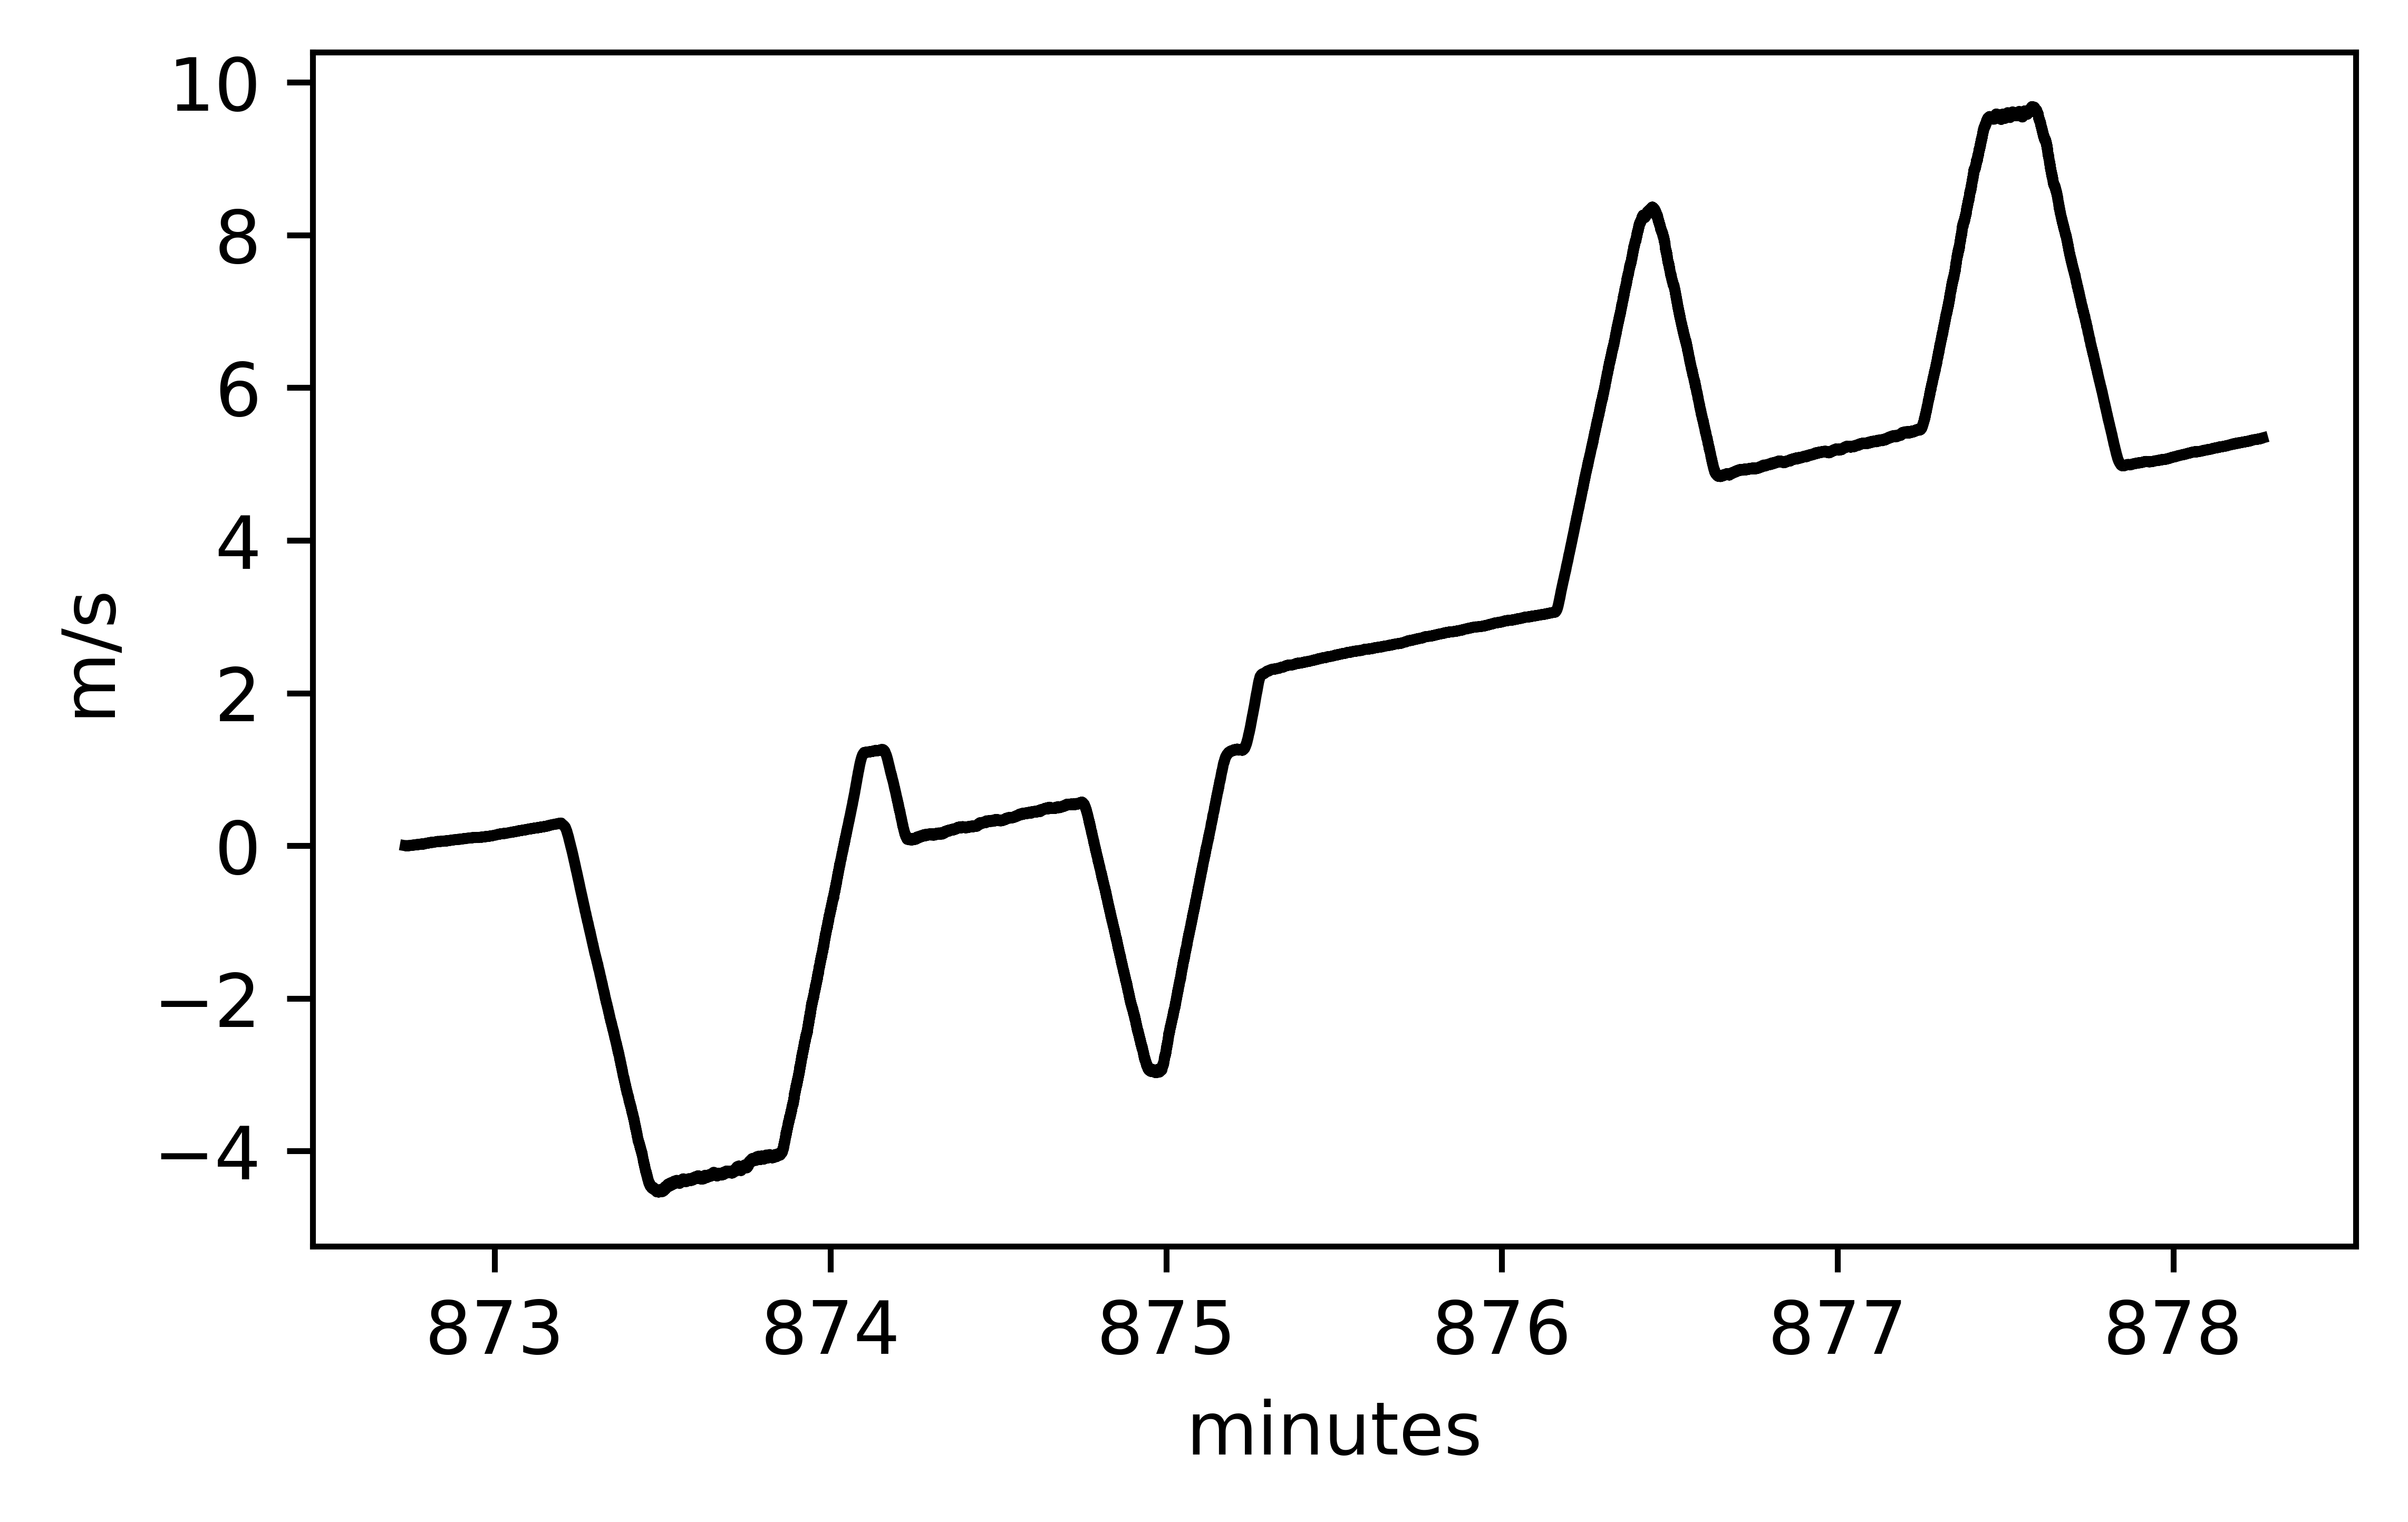

In [57]:
fig, ax = plt.subplots(1,1,figsize=(5,3),dpi=1000,linewidth=0.0625)
ax.plot(TotalTime, np.flip(Vs))
ax.set_xlabel('minutes')
ax.set_ylabel('m/s')

Text(0, 0.5, 'm/s')

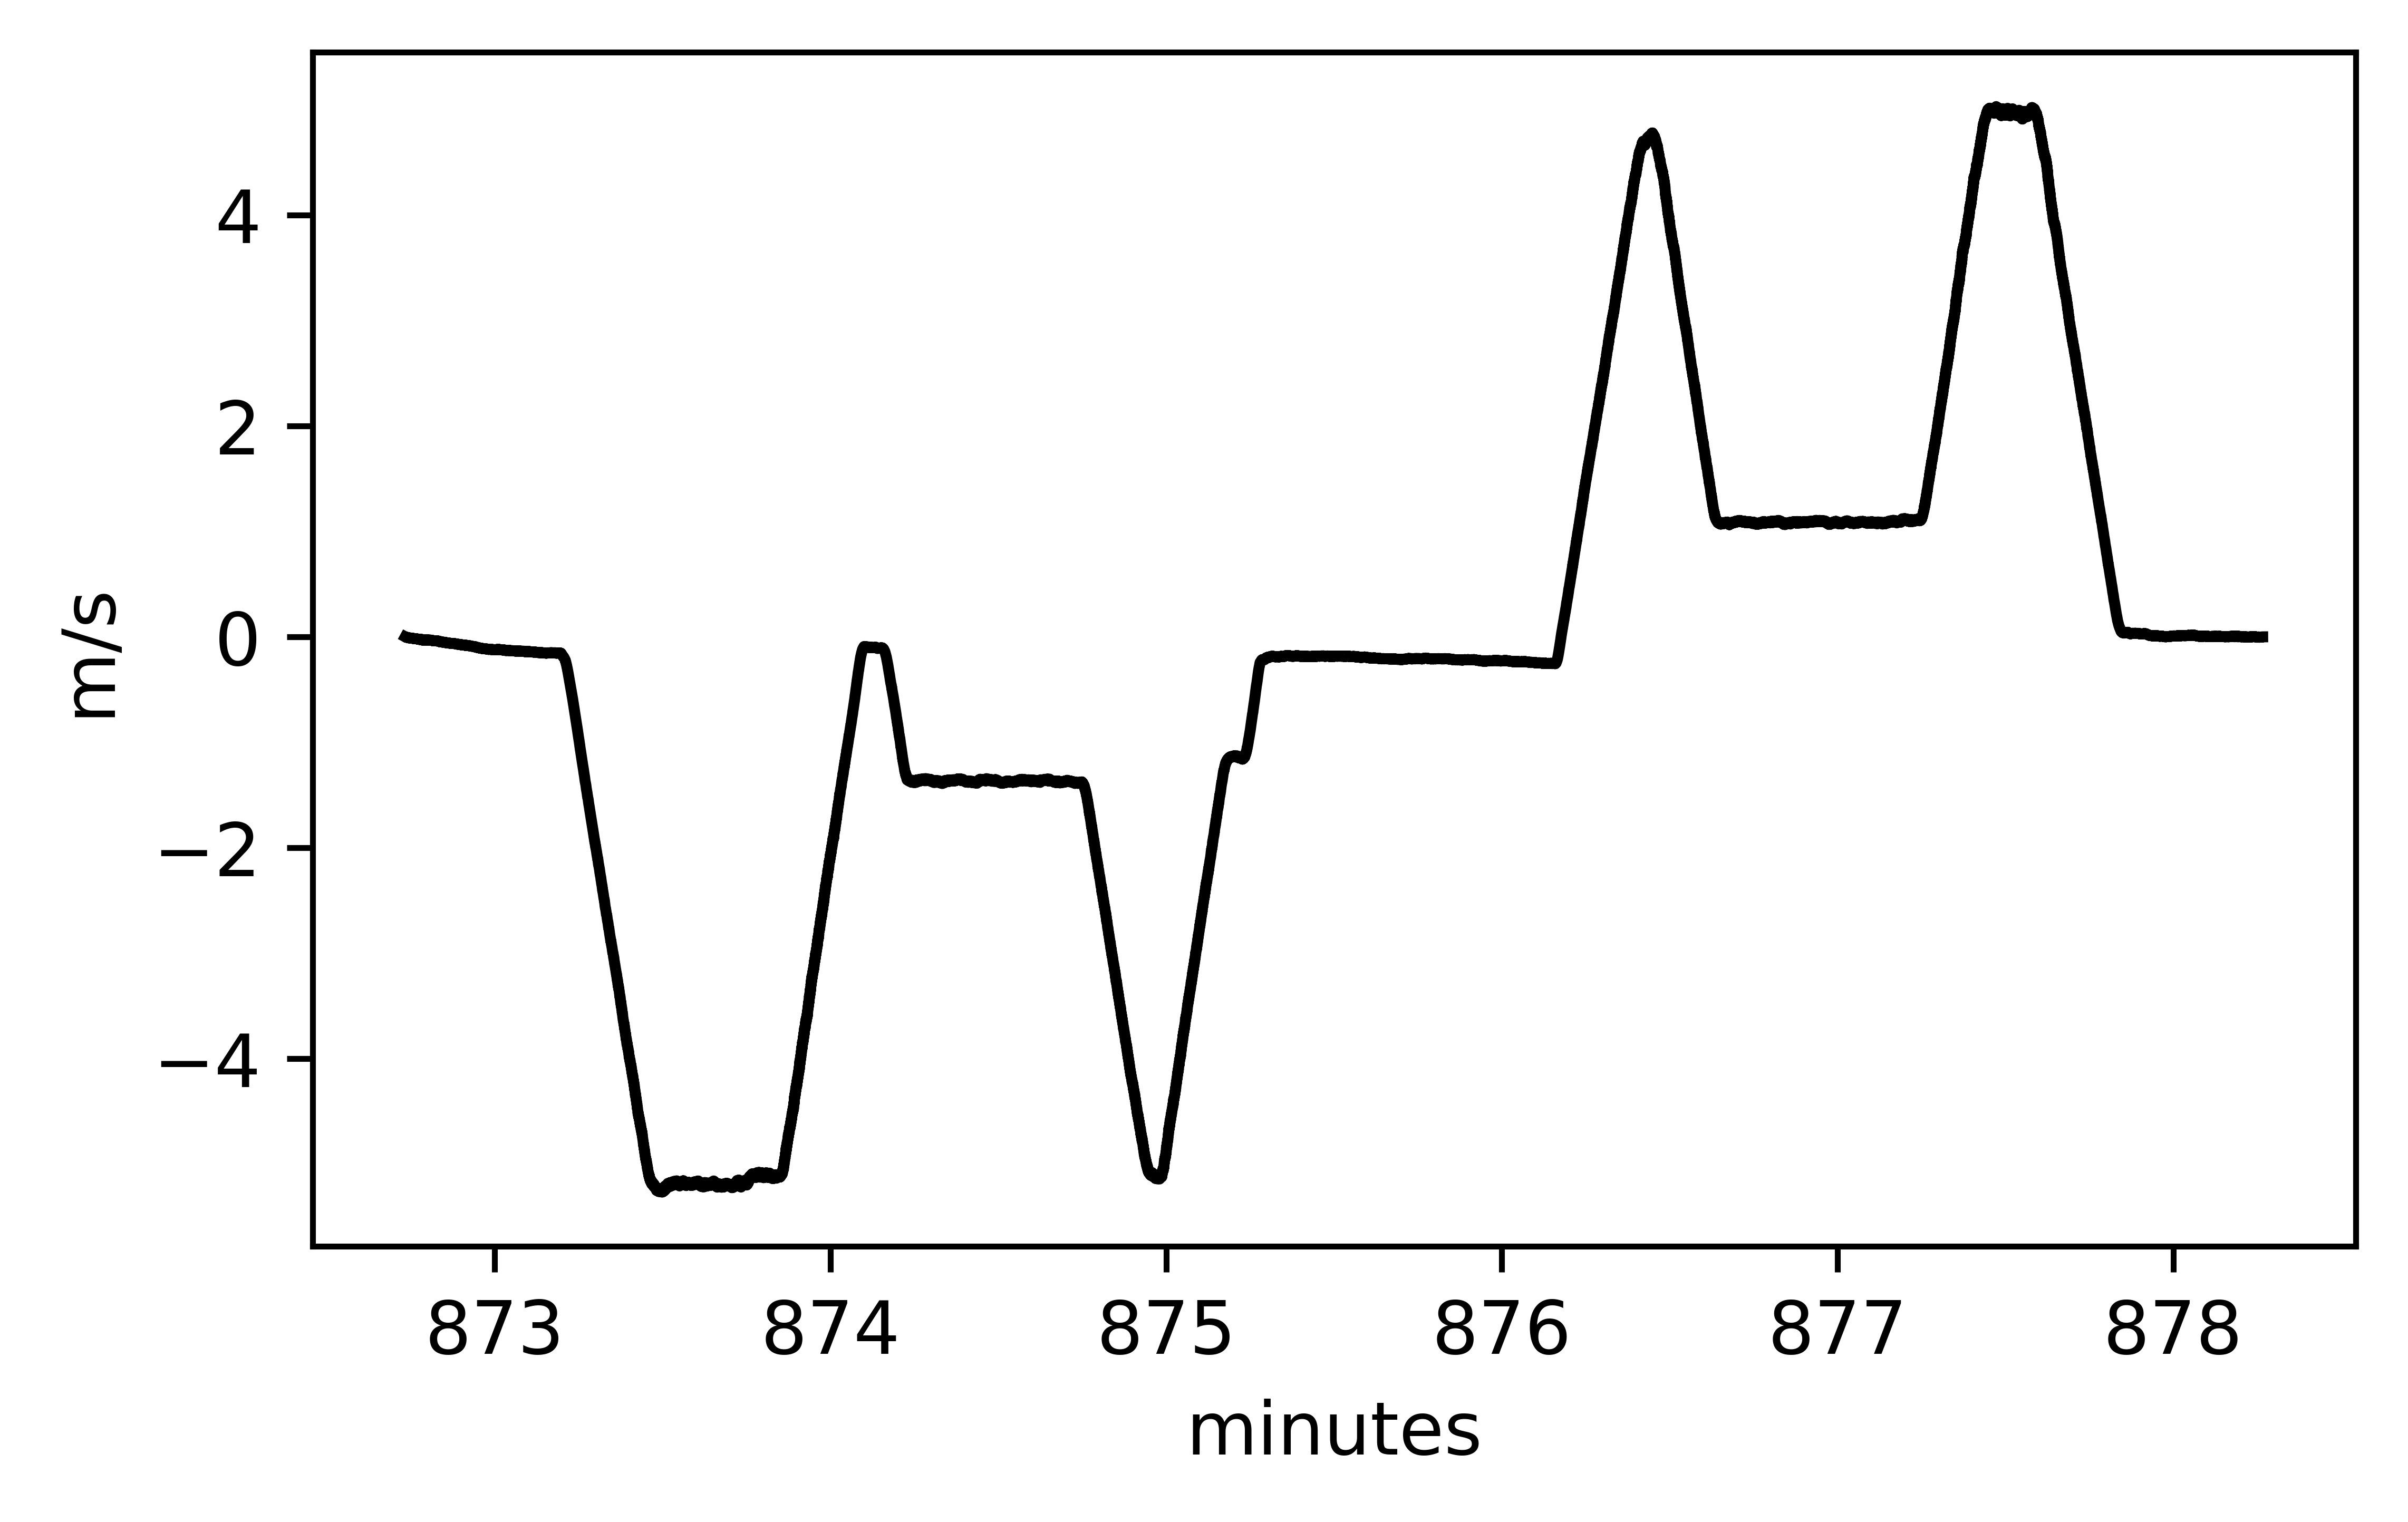

In [56]:
fig, ax = plt.subplots(1,1,figsize=(5,3),dpi=1000,linewidth=0.0625)
ax.plot(TotalTime, np.flip(V2s))
ax.set_xlabel('minutes')
ax.set_ylabel('m/s')


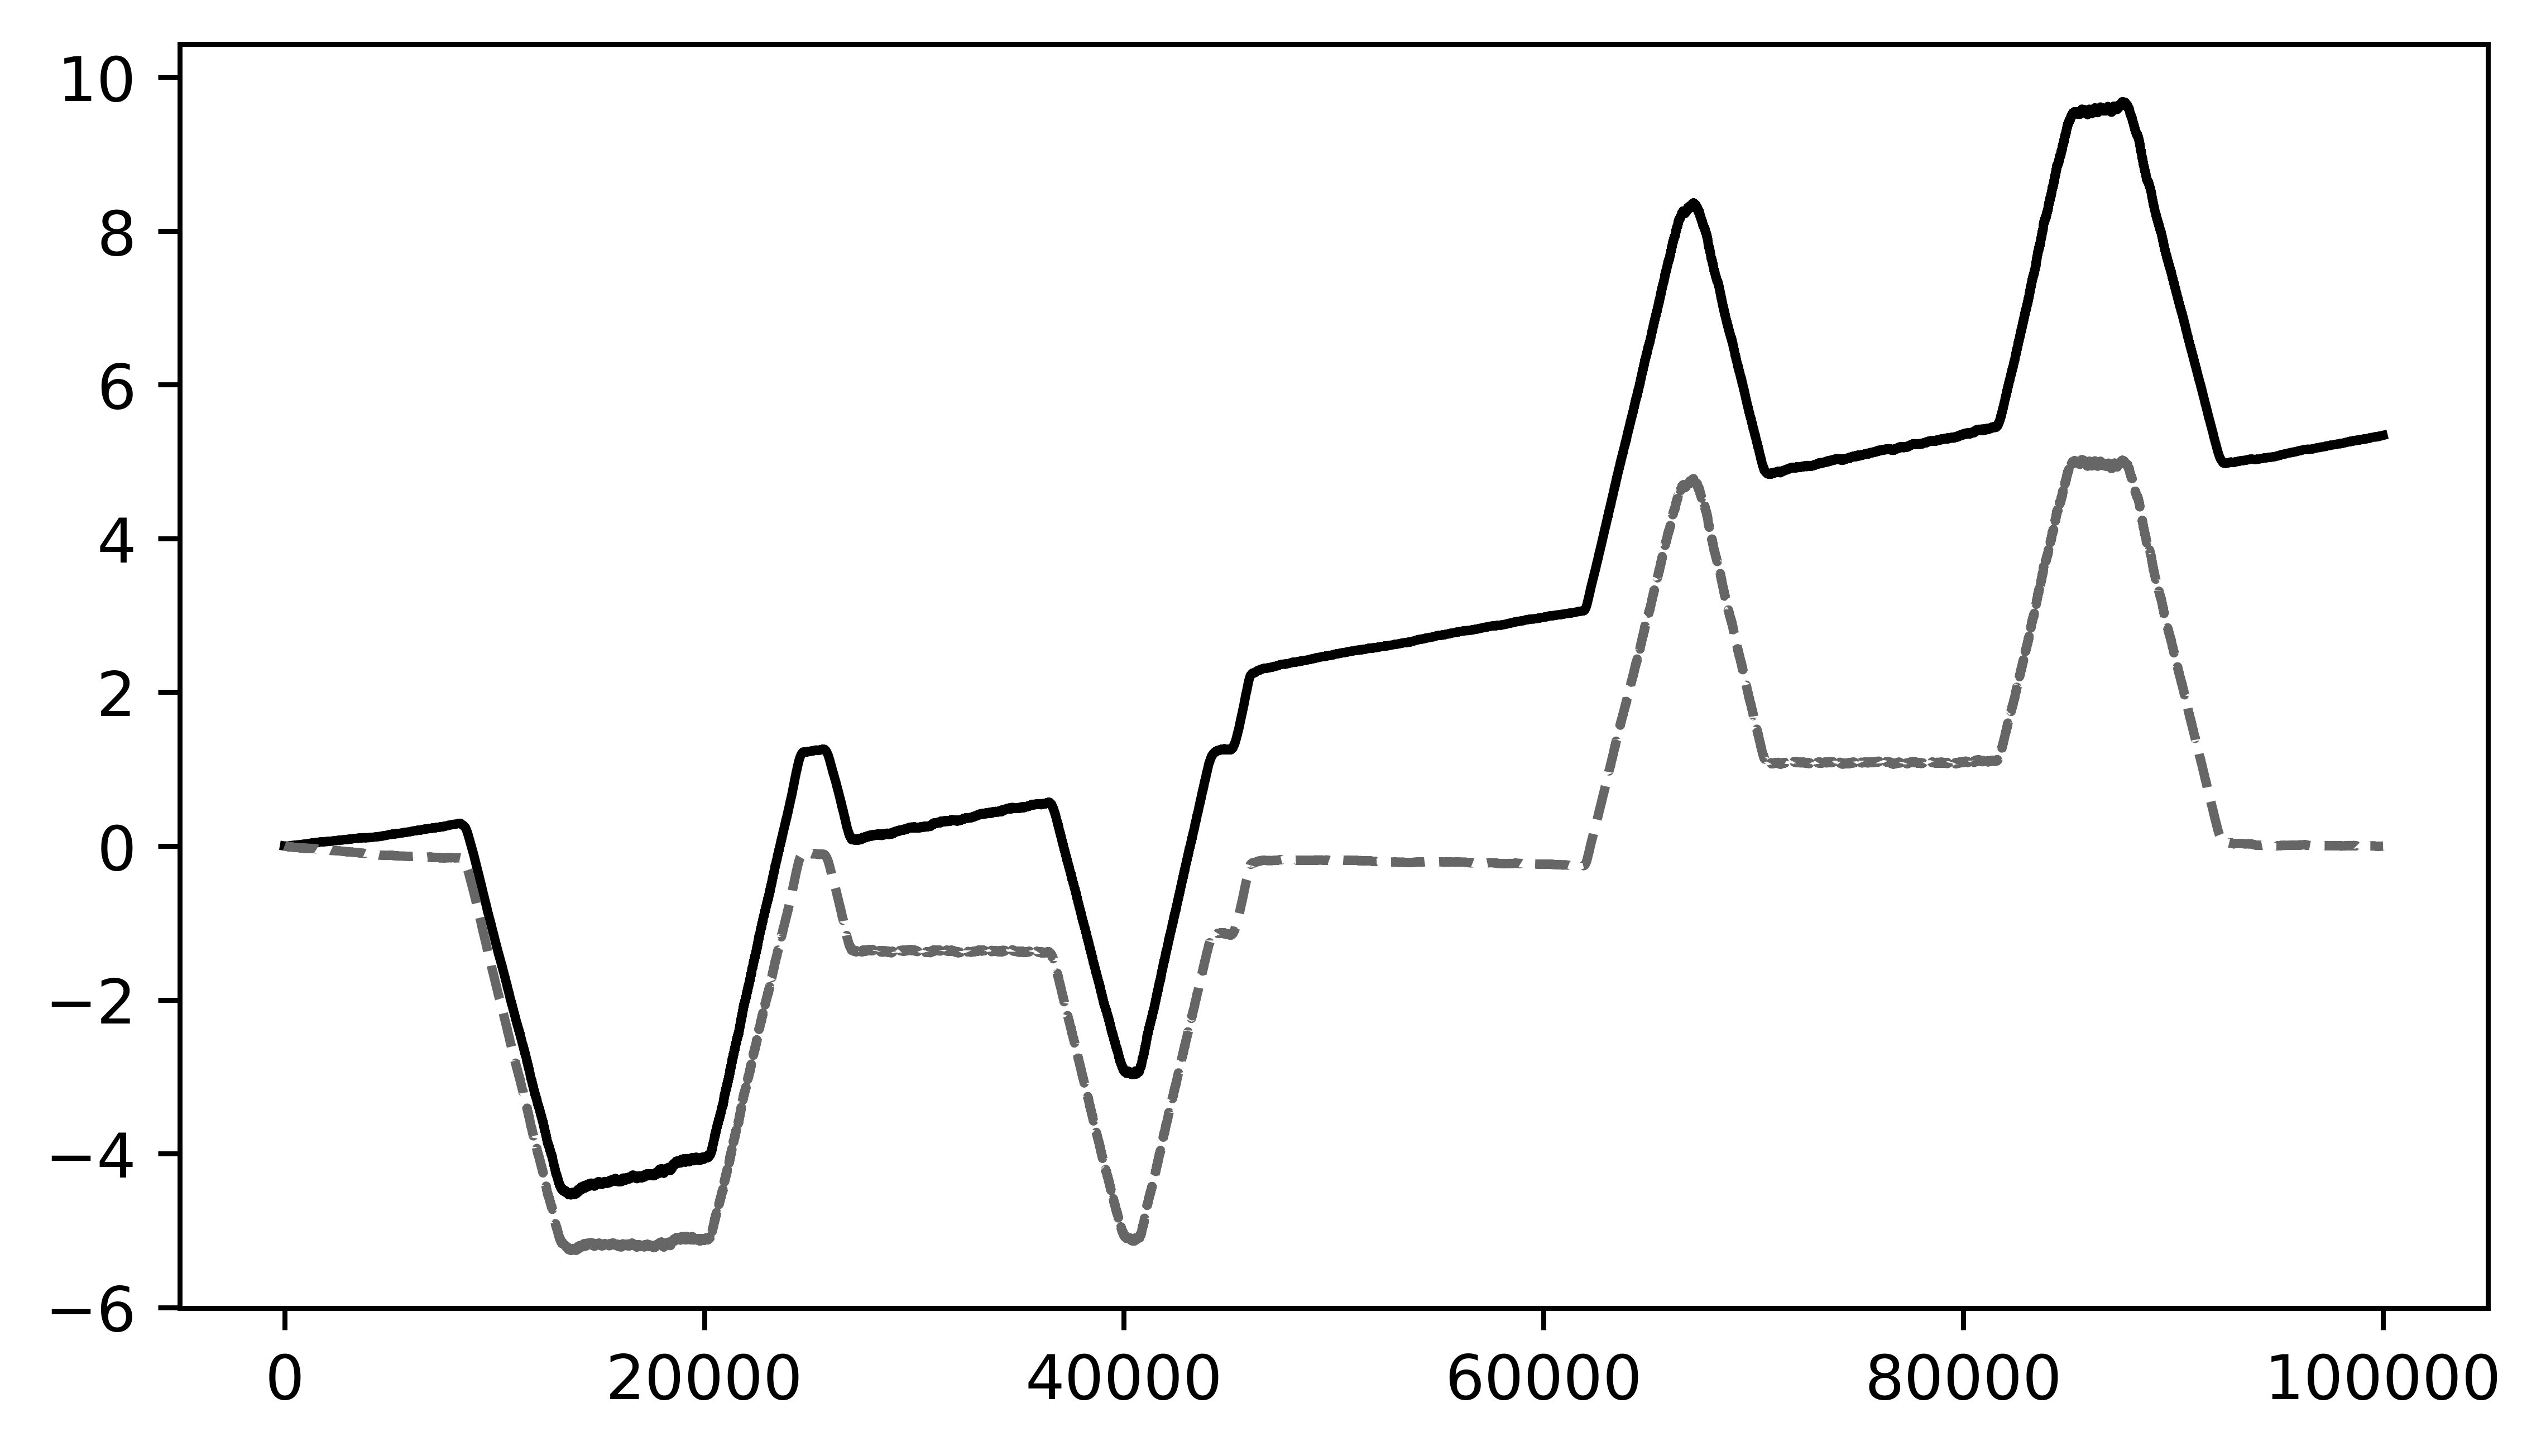

In [58]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(Vs)
plt.plot(V2s)
plt.show()


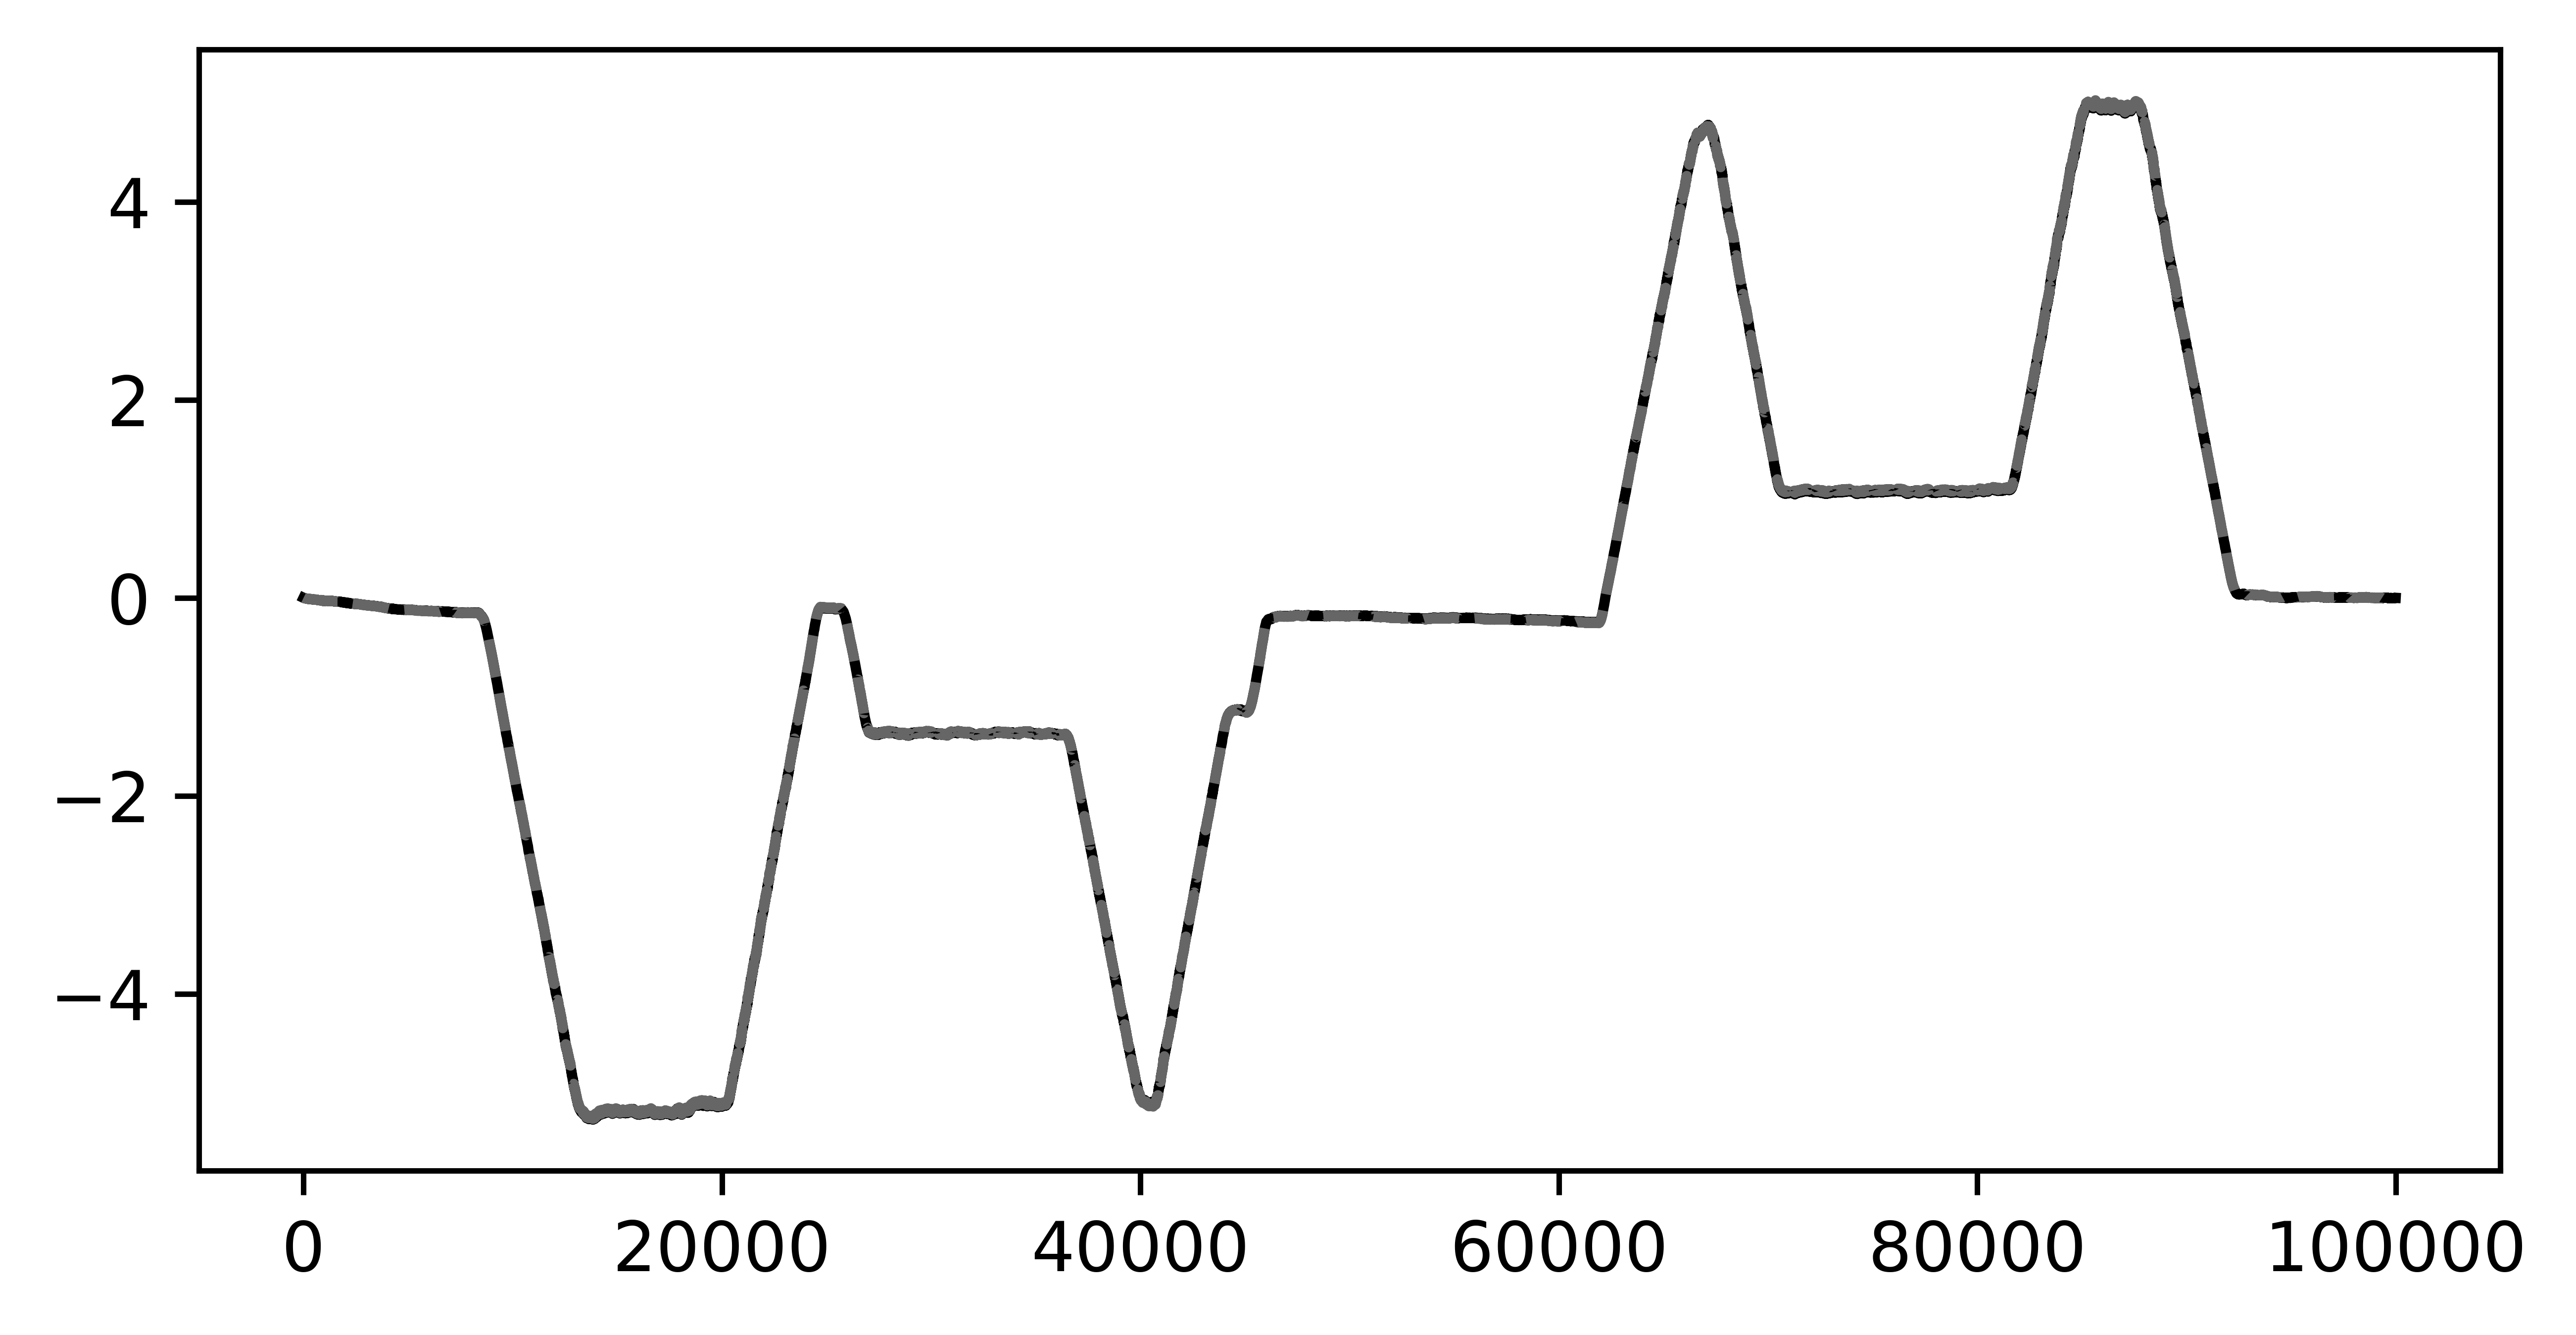

In [59]:

PointVairance = Vs[-1:] / len(Vs)
for i in range(len(Vs)):
    Vs[i] -=  PointVairance * i

fig=plt.figure(figsize=(6,3),dpi=1000,linewidth=0.5)
plt.plot(Vs)
plt.plot(V2s)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


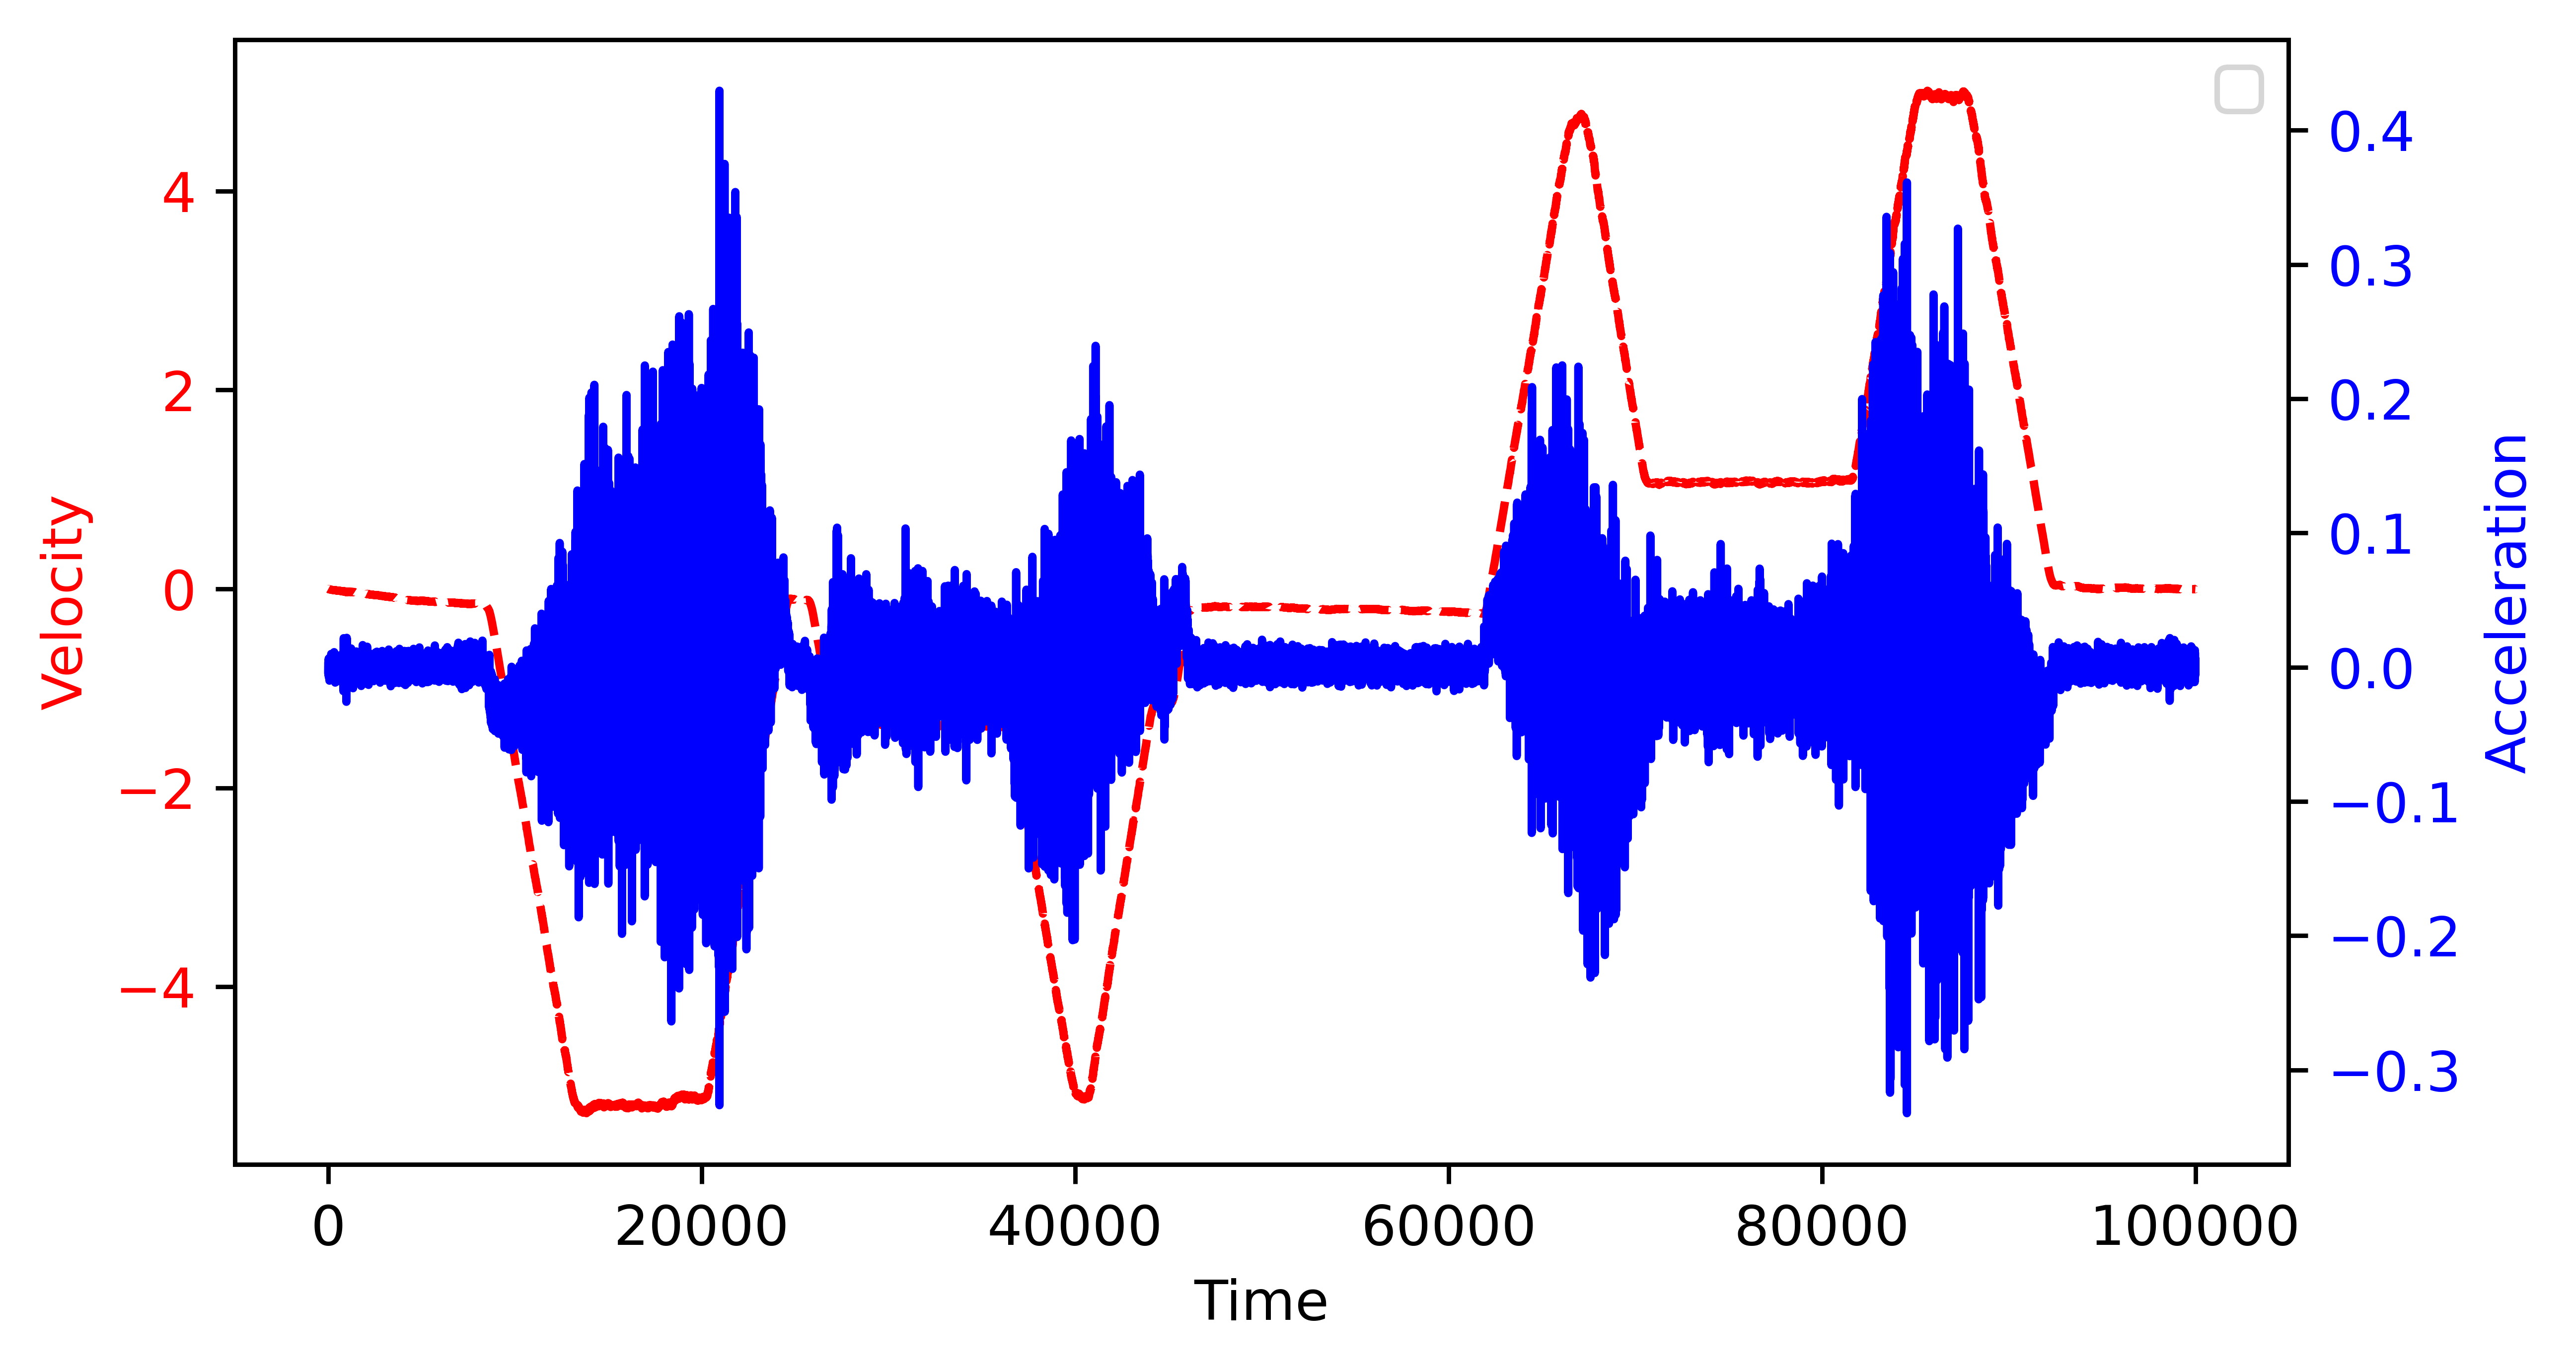

In [70]:
fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 
  
ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red') 
ax1.plot(range(len(Vs)), Vs, color = 'red', linestyle = 'dashed' )
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Acceleration', color = 'blue') 
ax2.plot(range(len(Vs)), LbPX[1500000:1600000], color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 

plt.legend()
# Show plot

plt.show()


In [71]:
FV = getVelocity(ODataSet[:,3],ODataSet[:,2])

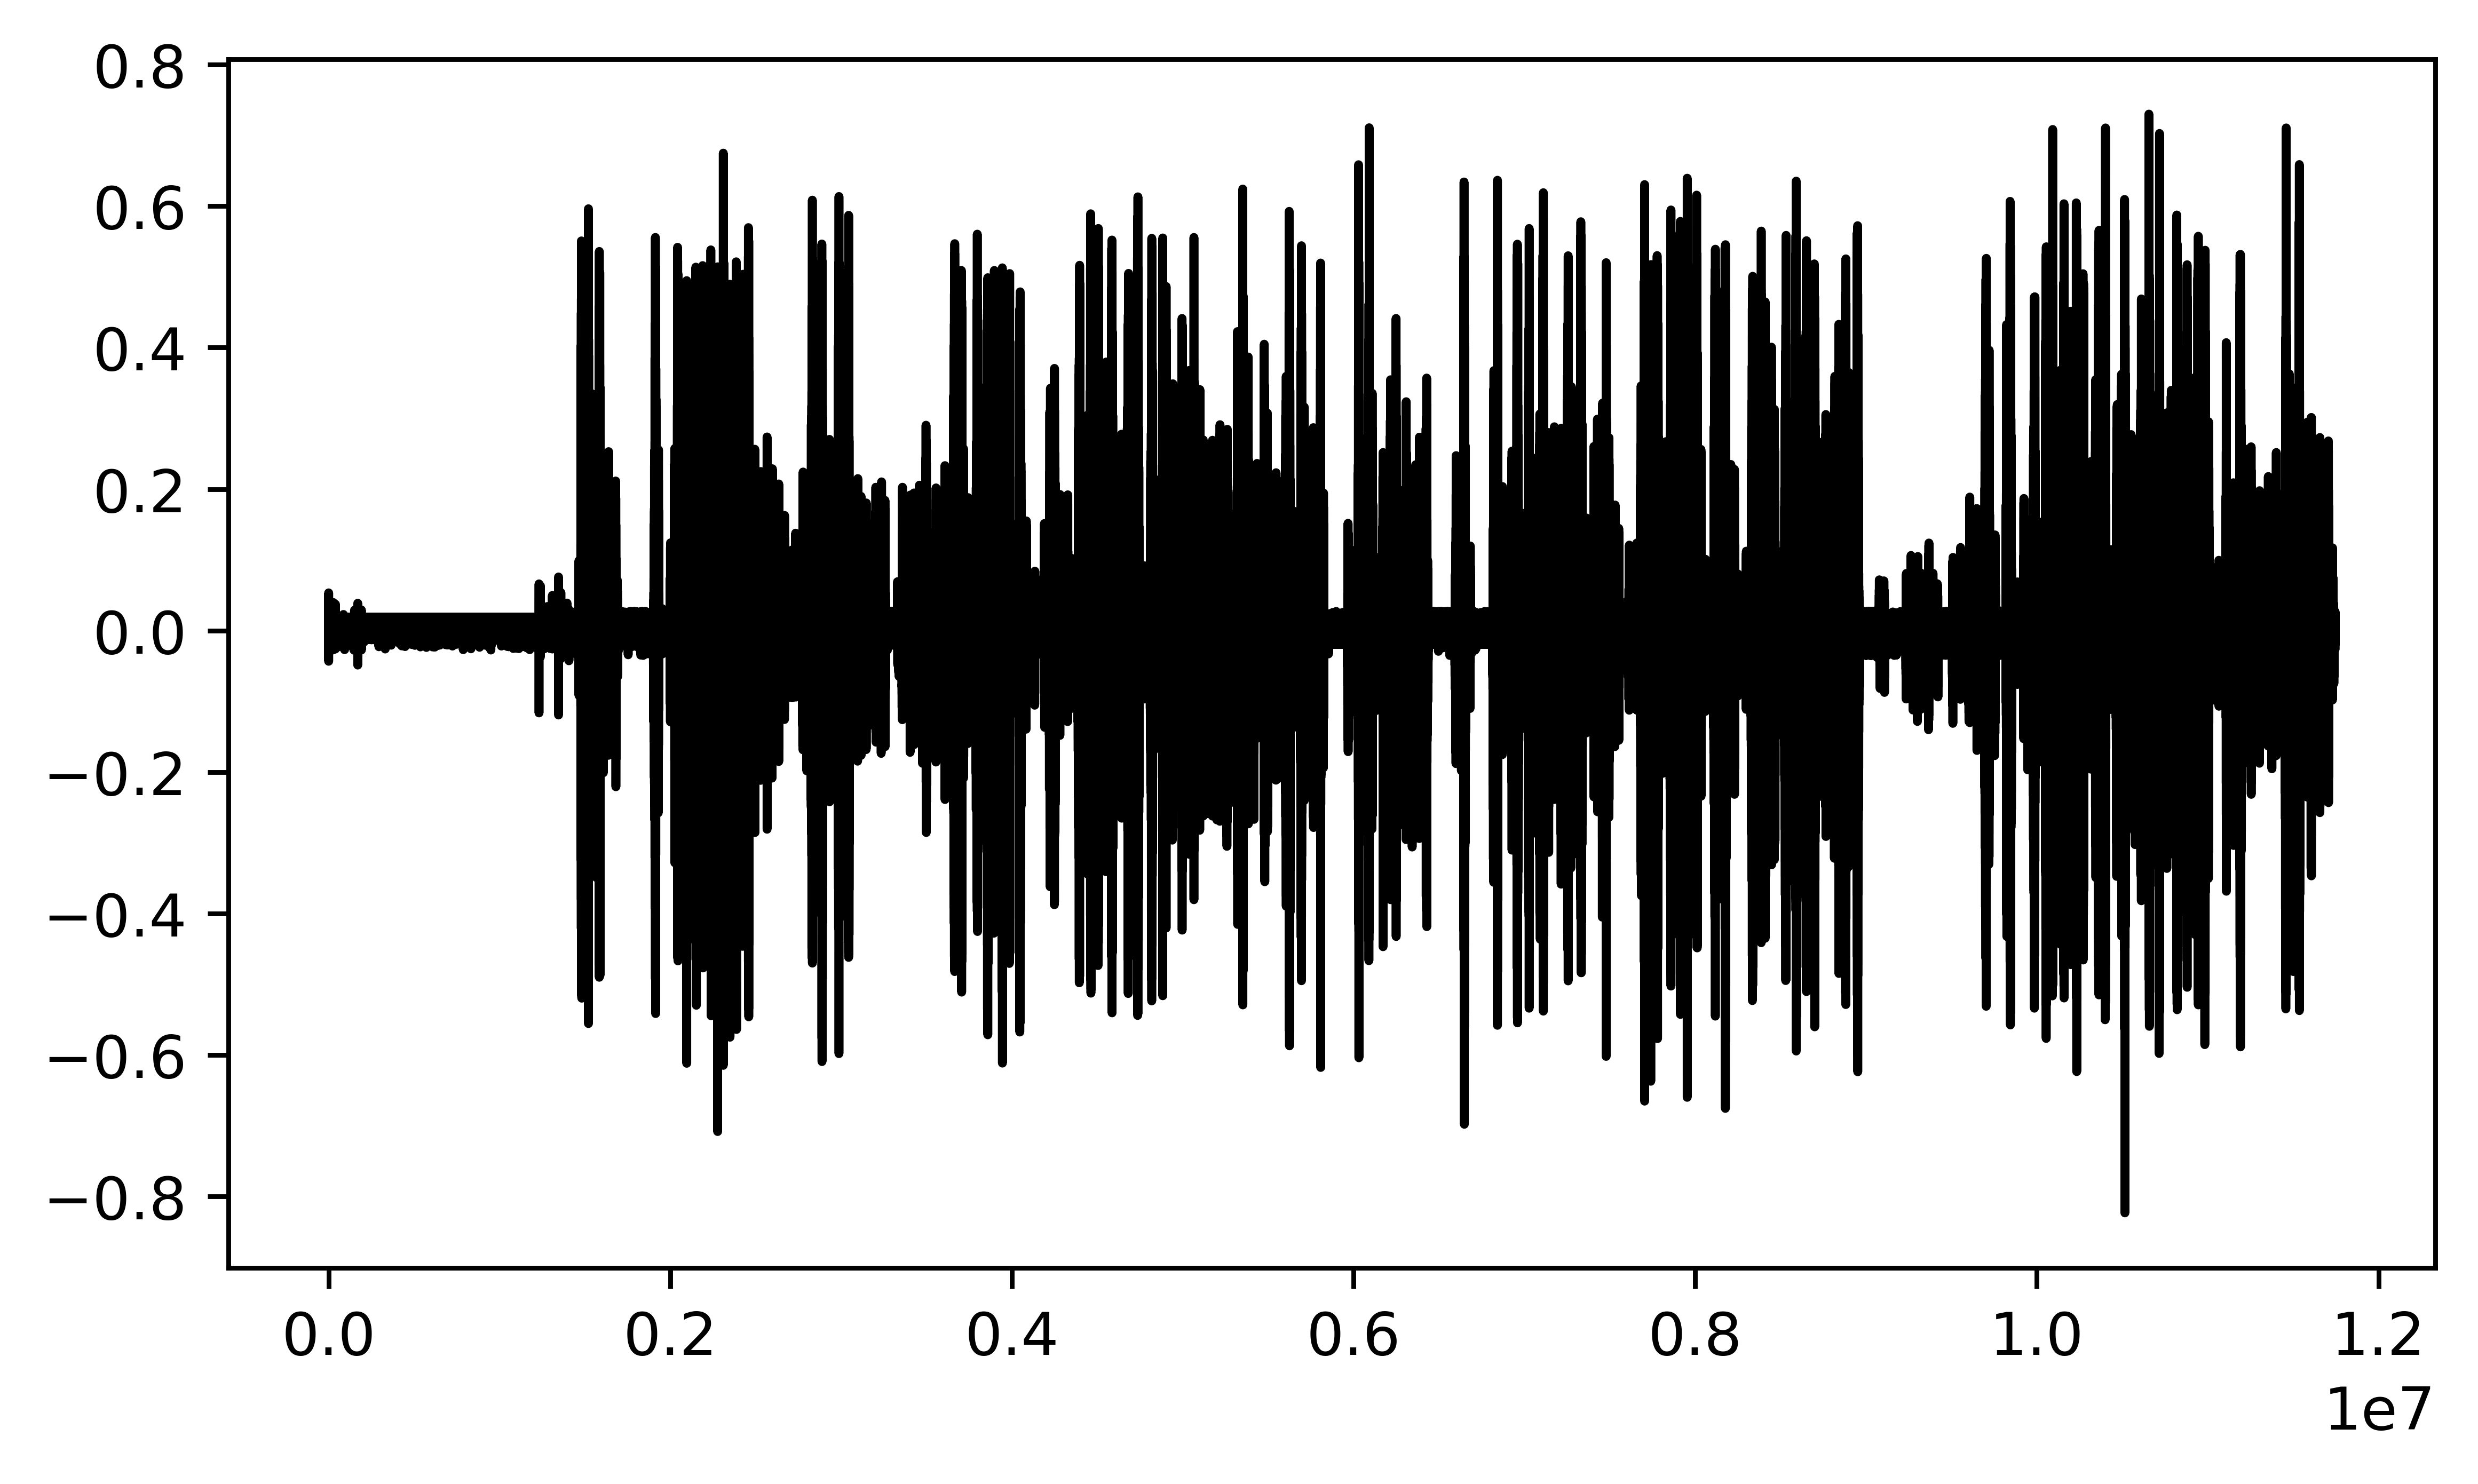

In [72]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(ODataSet[:,3])
plt.show()

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FV)
plt.show()

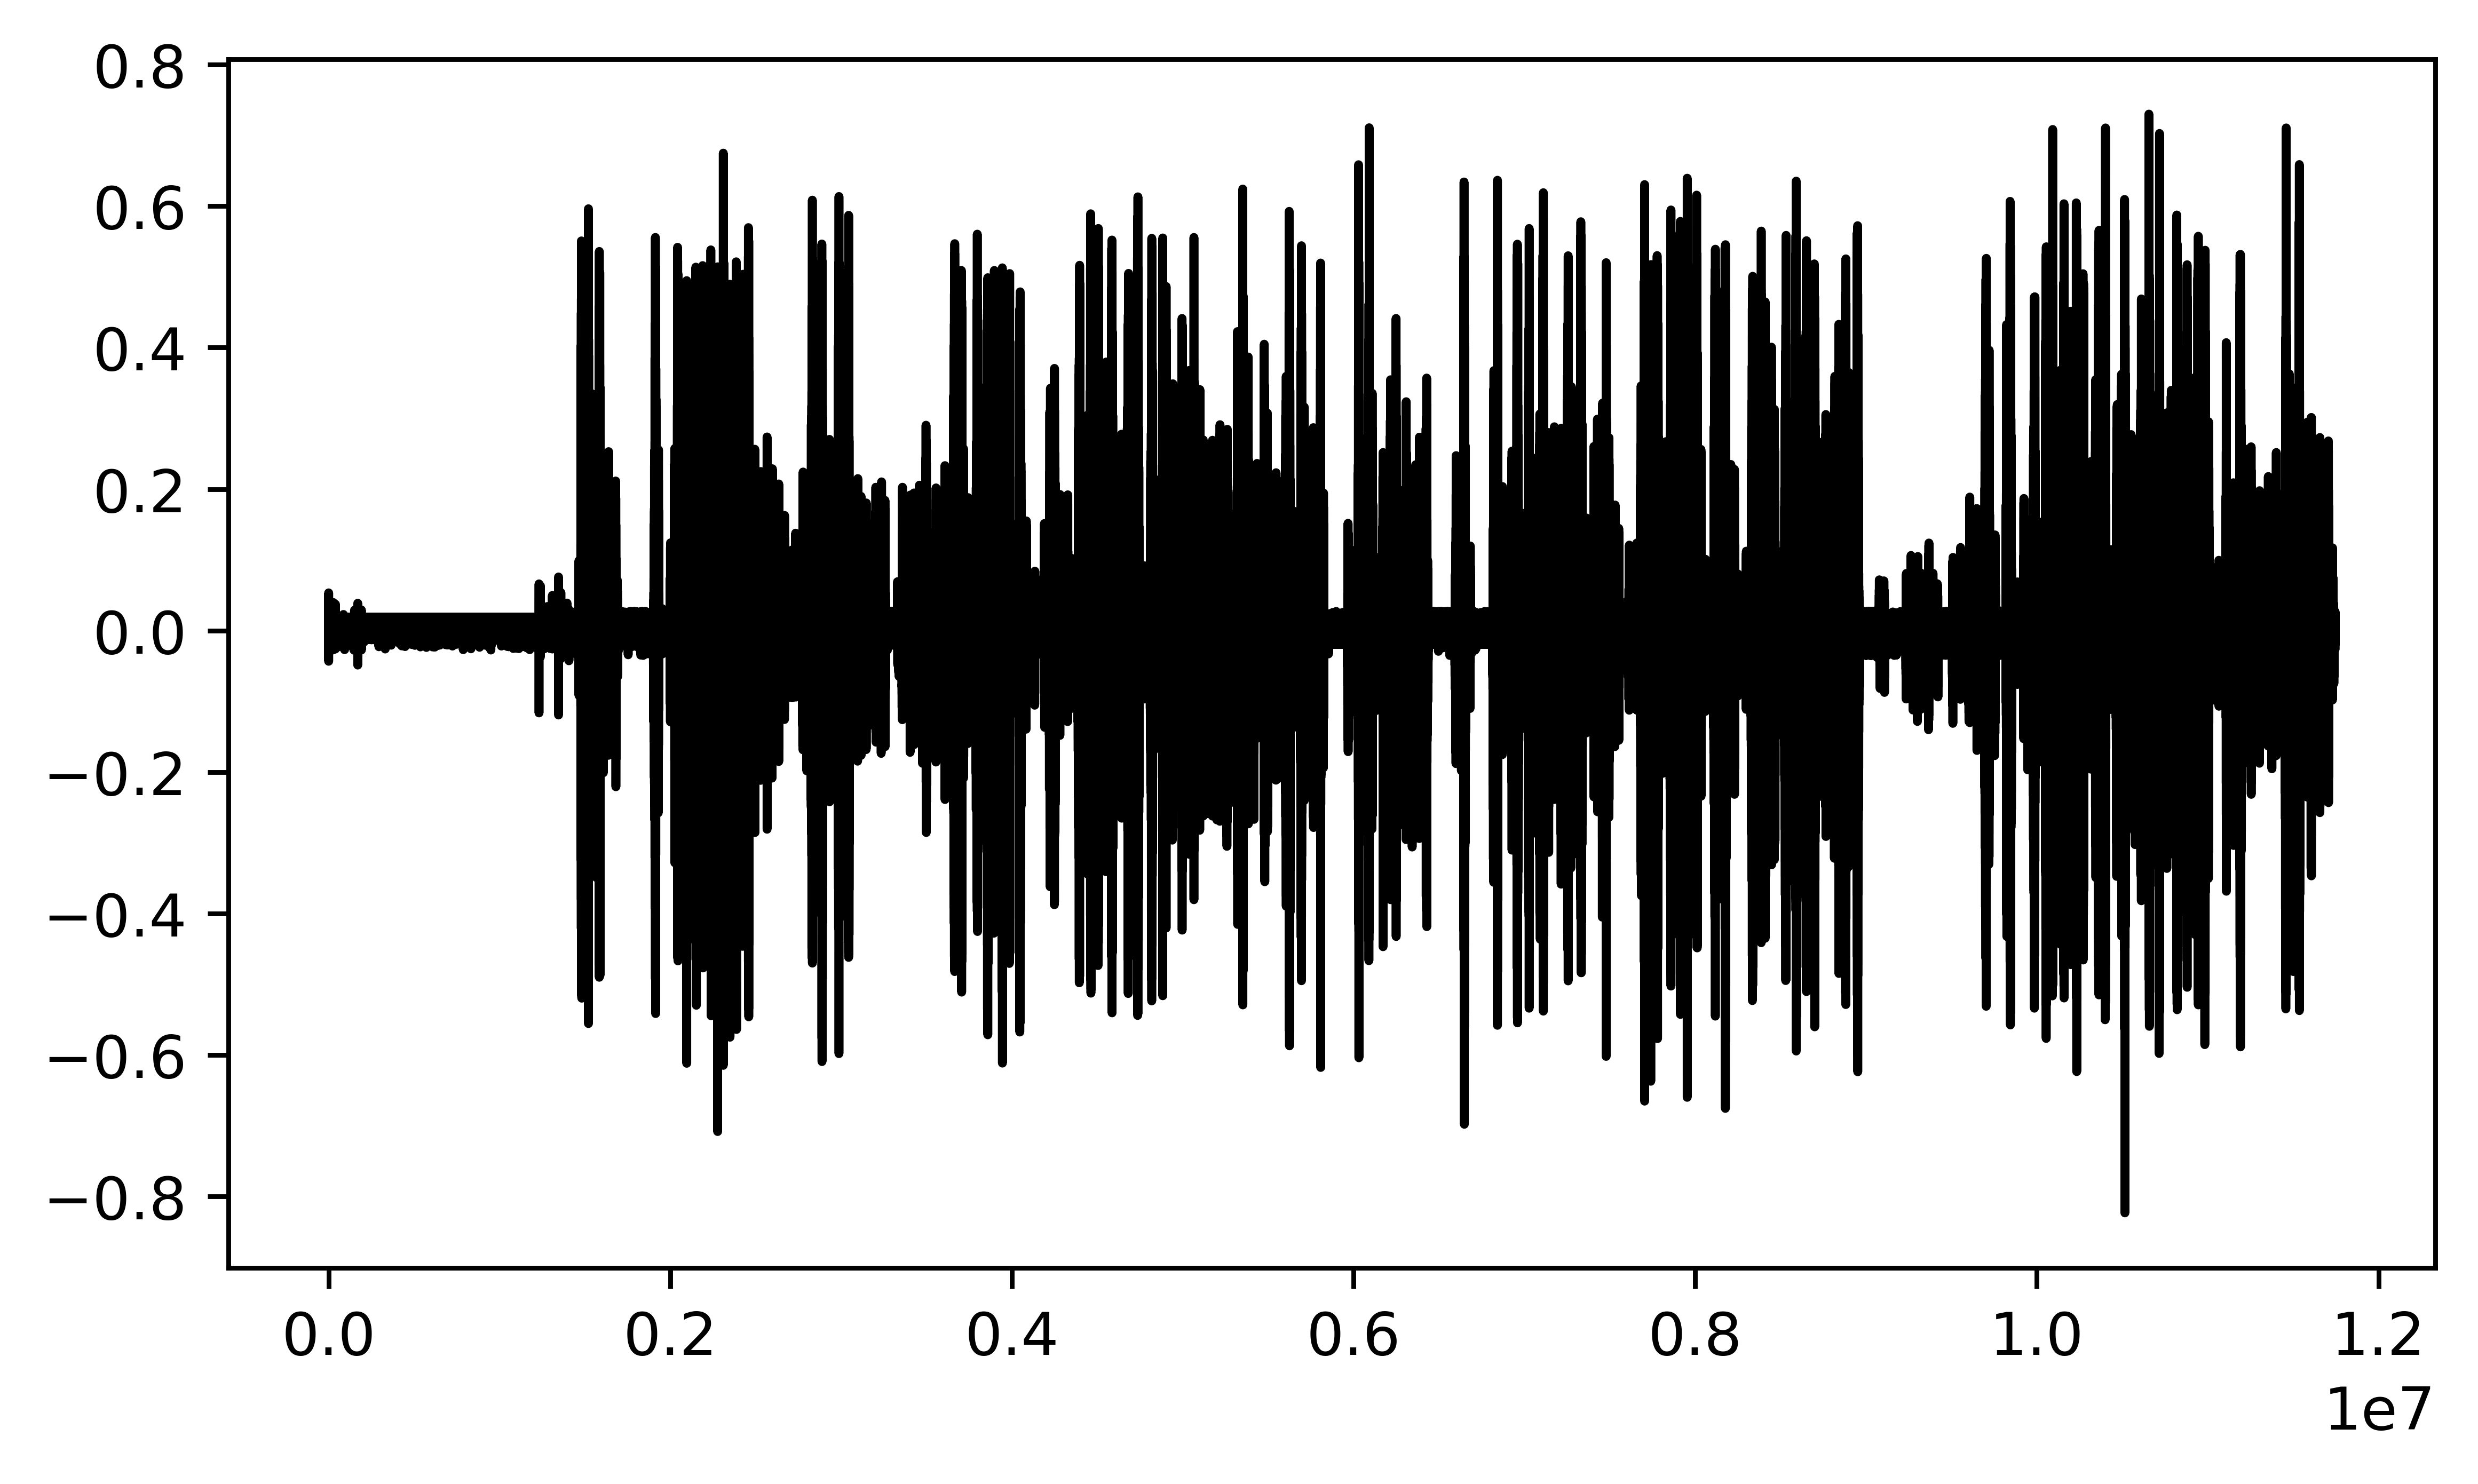

In [73]:
FullSmooth = cf.Smoothing(ODataSet[:,3],1)
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FullSmooth)
plt.show()

In [74]:
RDataSet = np.genfromtxt(open(folder+files[0],'r'), delimiter=',',skip_header=0)
print(files[1],np.shape(RDataSet))

221011 recording2.csv (13793070, 7)


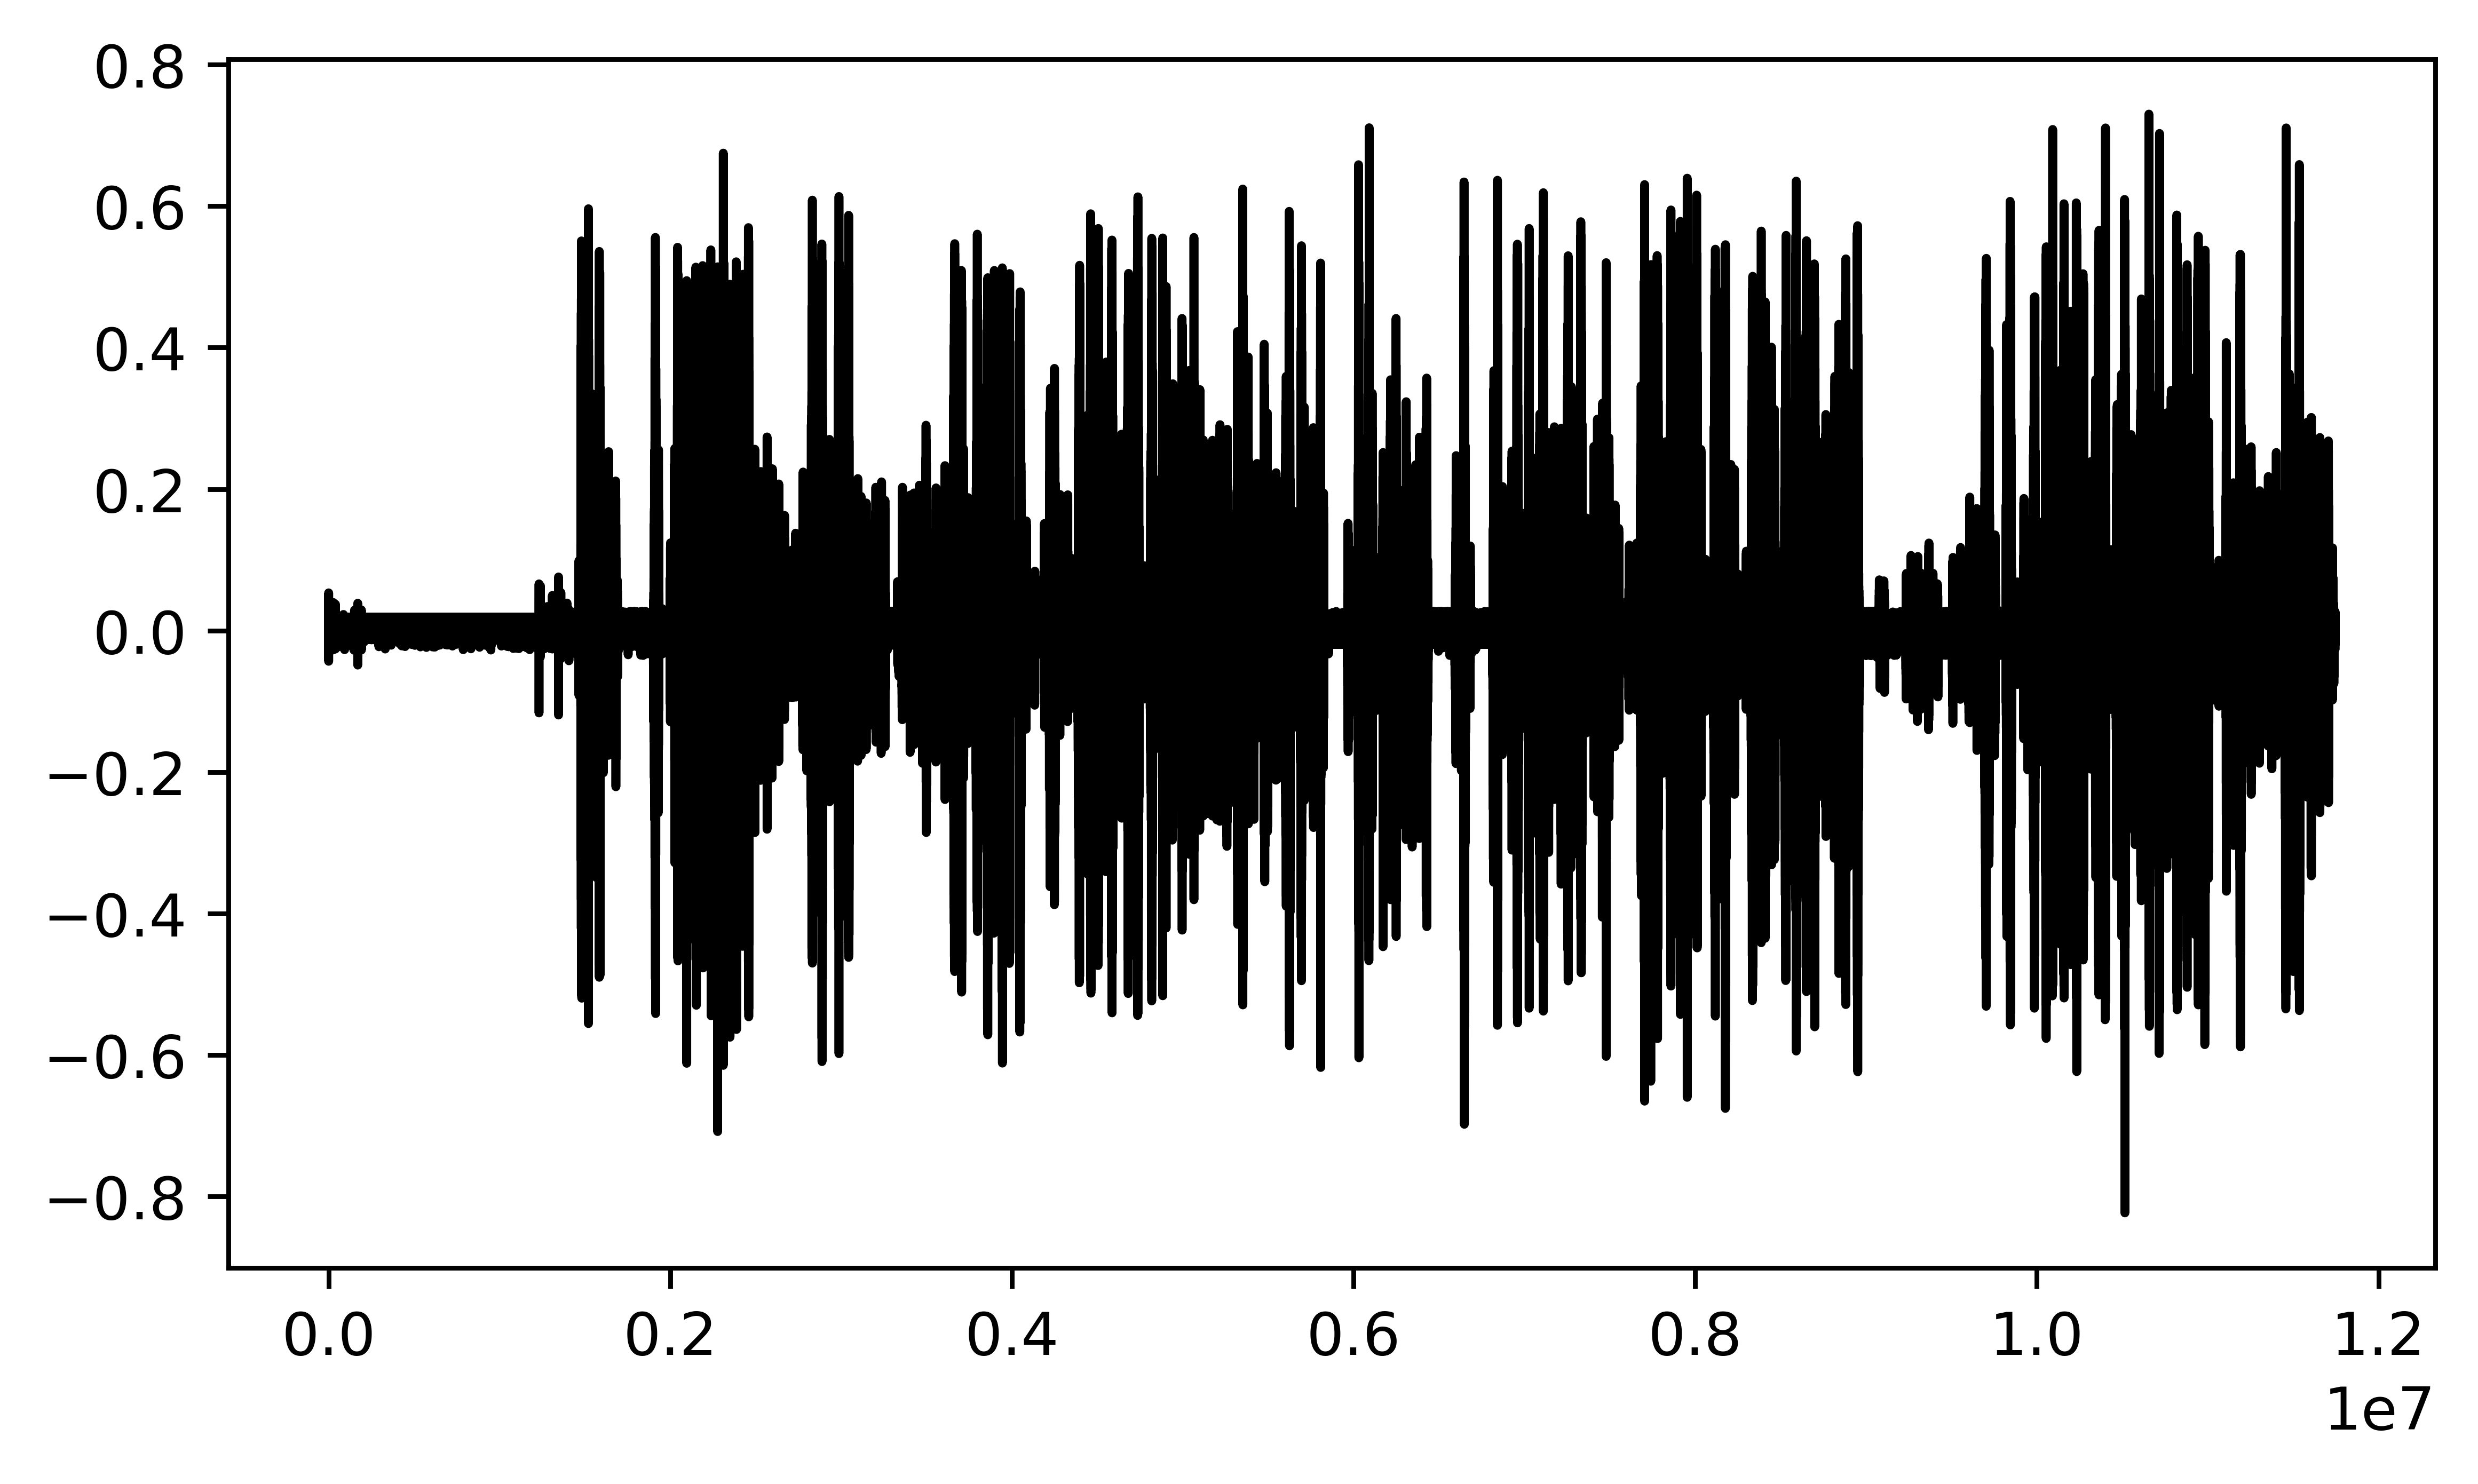

In [75]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(ODataSet[:,3])
plt.show()

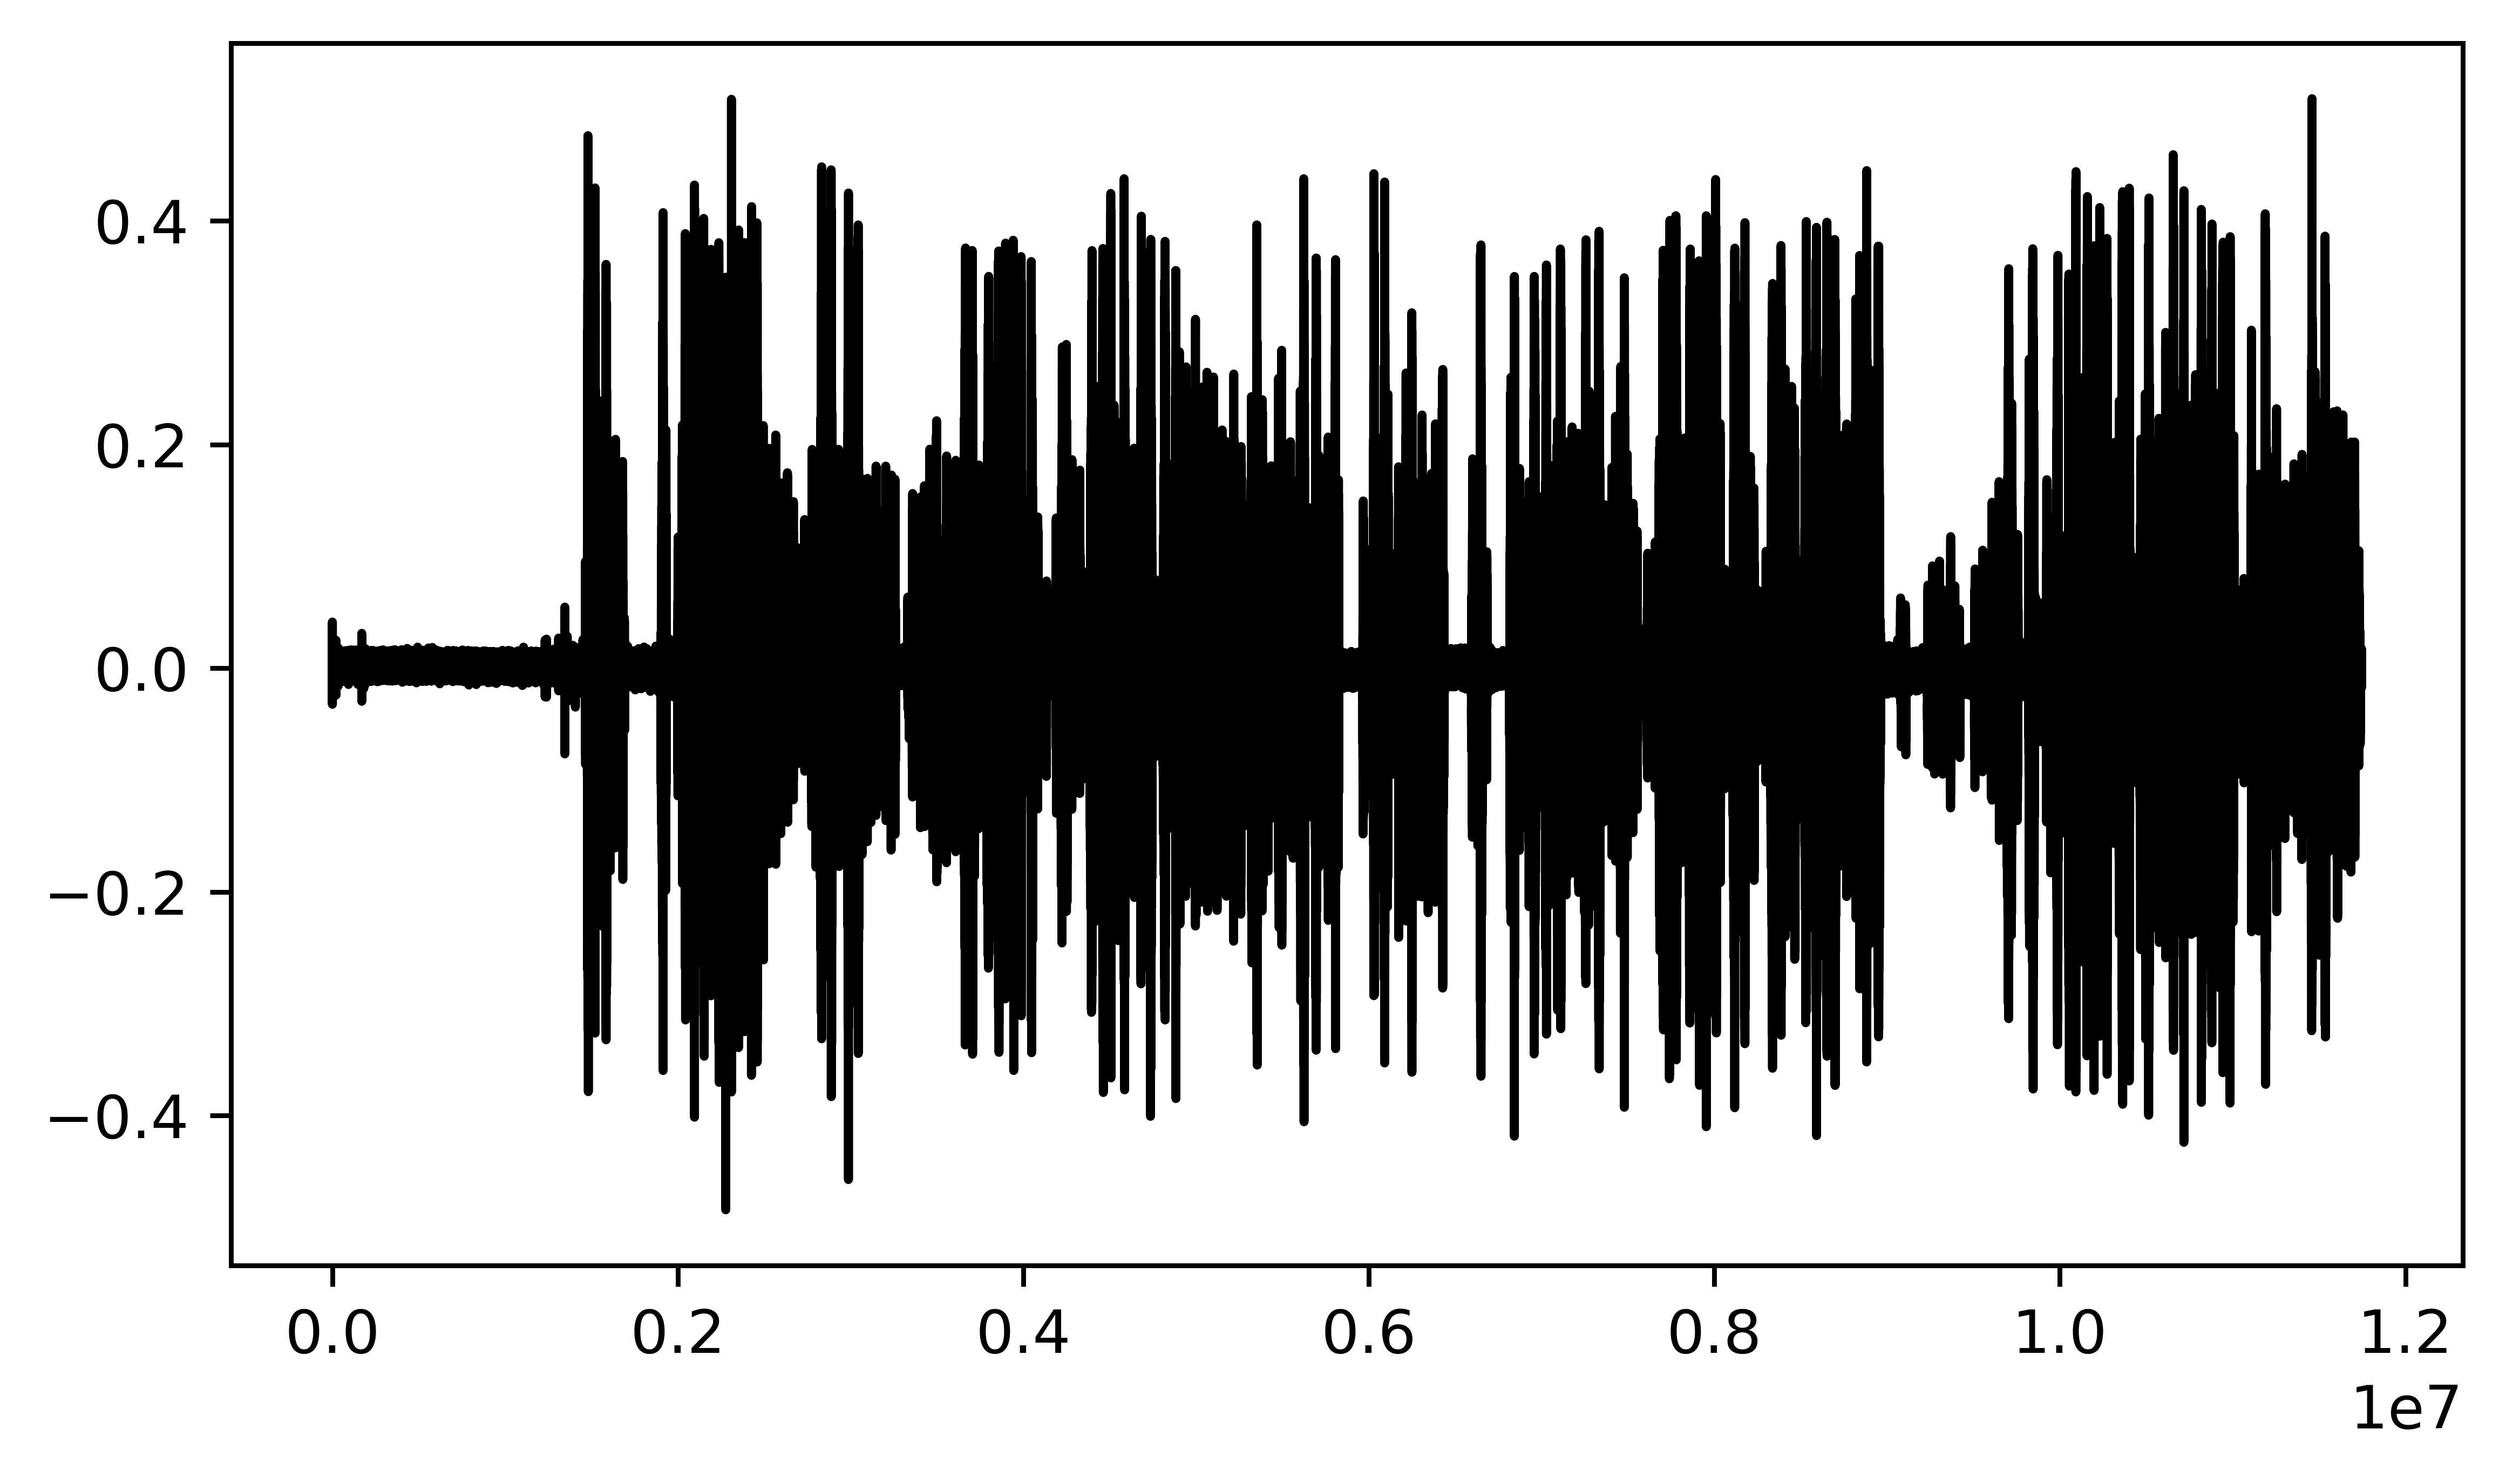

In [76]:
FullSmooth = cf.Smoothing(ODataSet[:,3],2)
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FullSmooth)
plt.show()

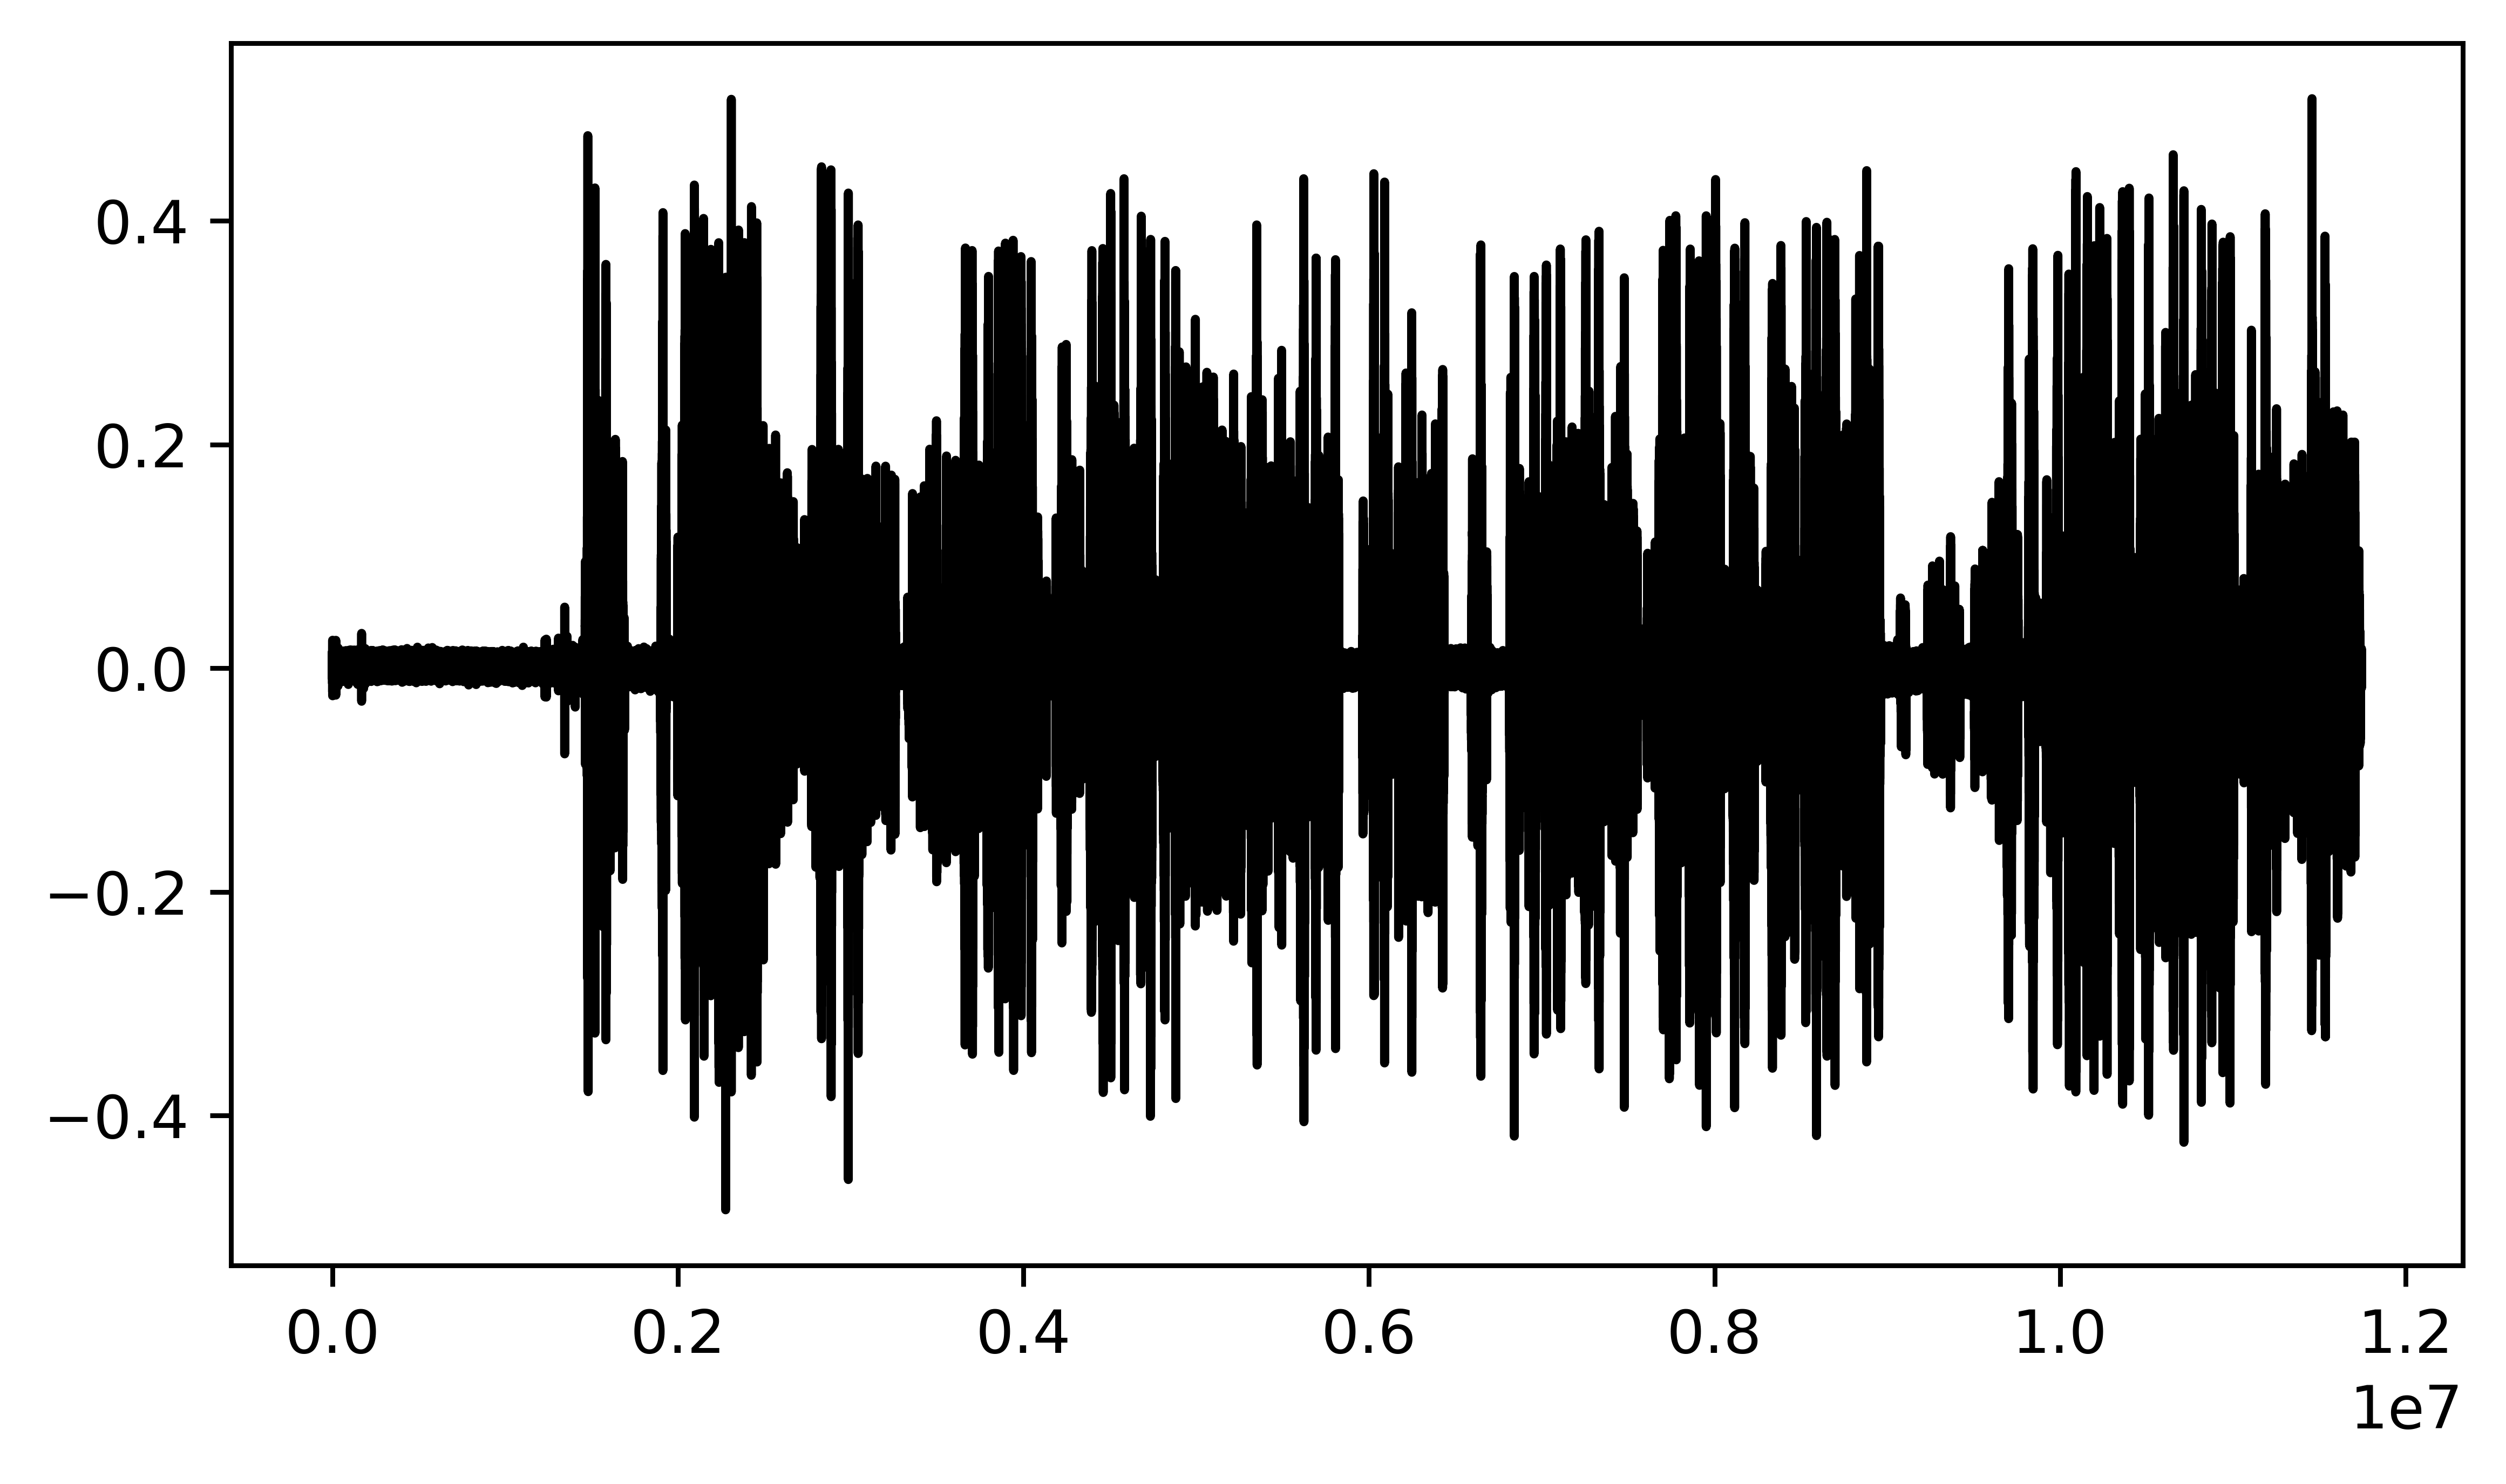

In [77]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FullSmooth[1000:24500000])
plt.show()

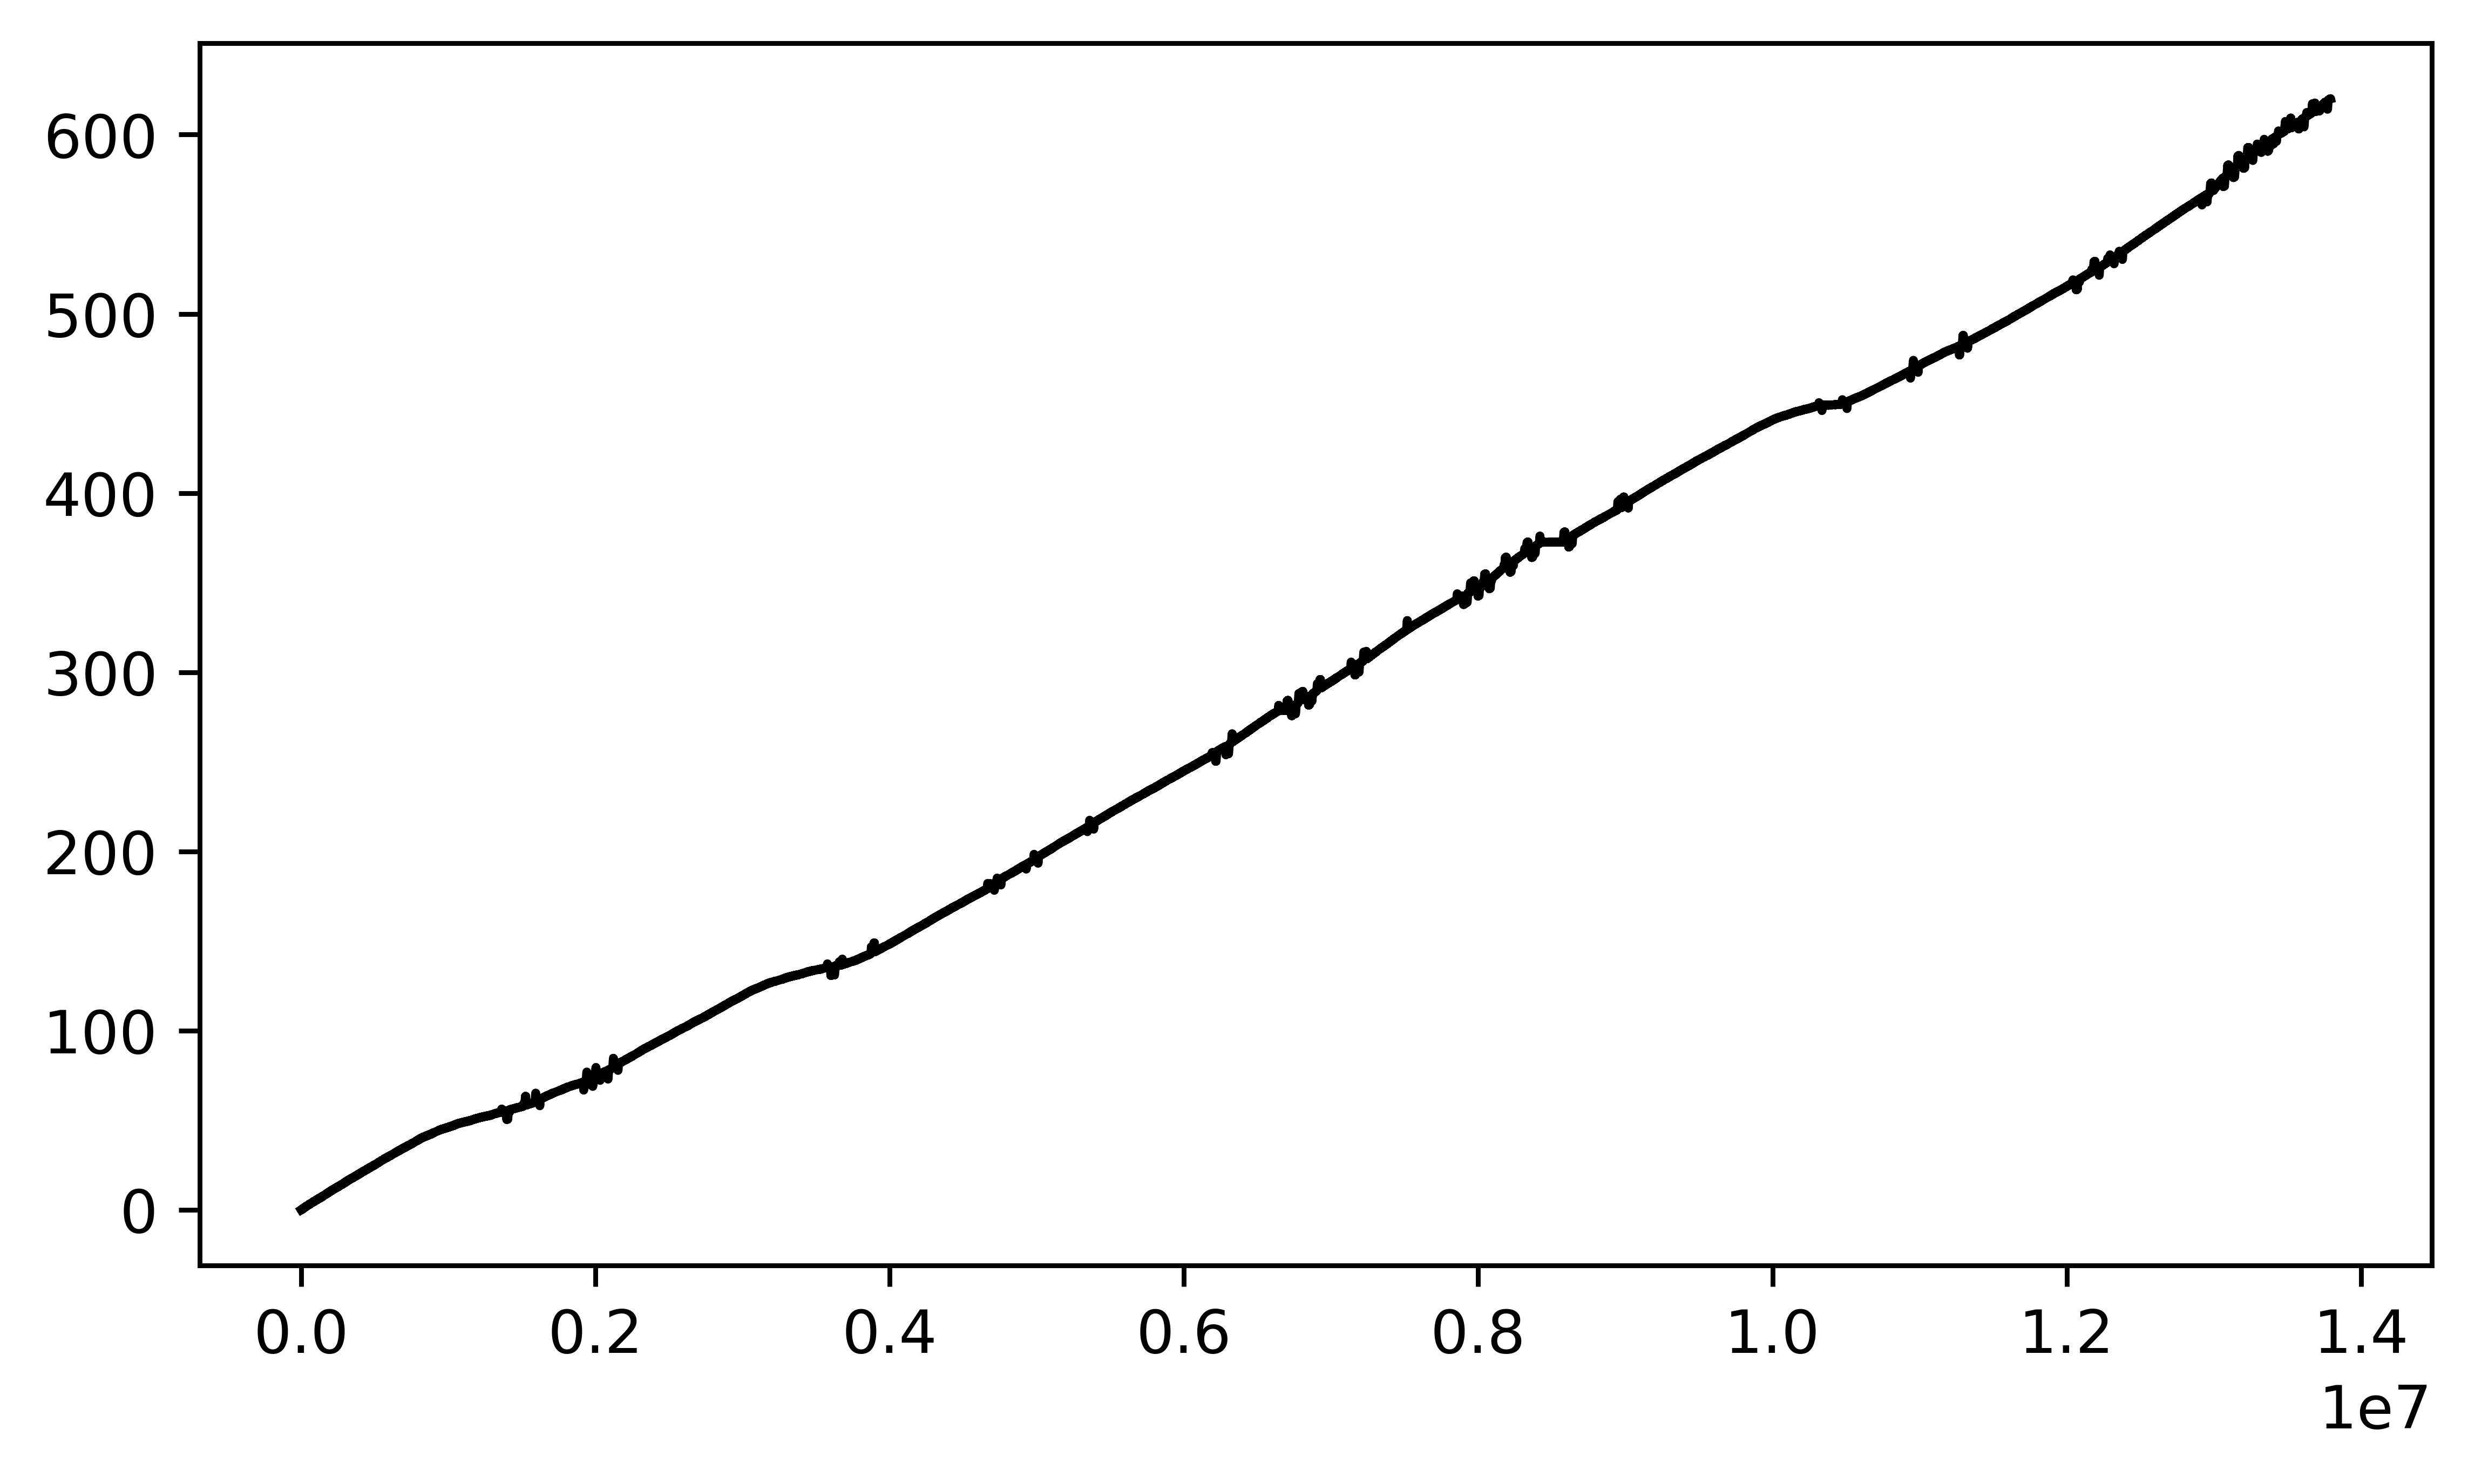

In [78]:
FullVell = getVelocity2(RDataSet[:,3],RDataSet[:,2])

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FullVell)
plt.show()

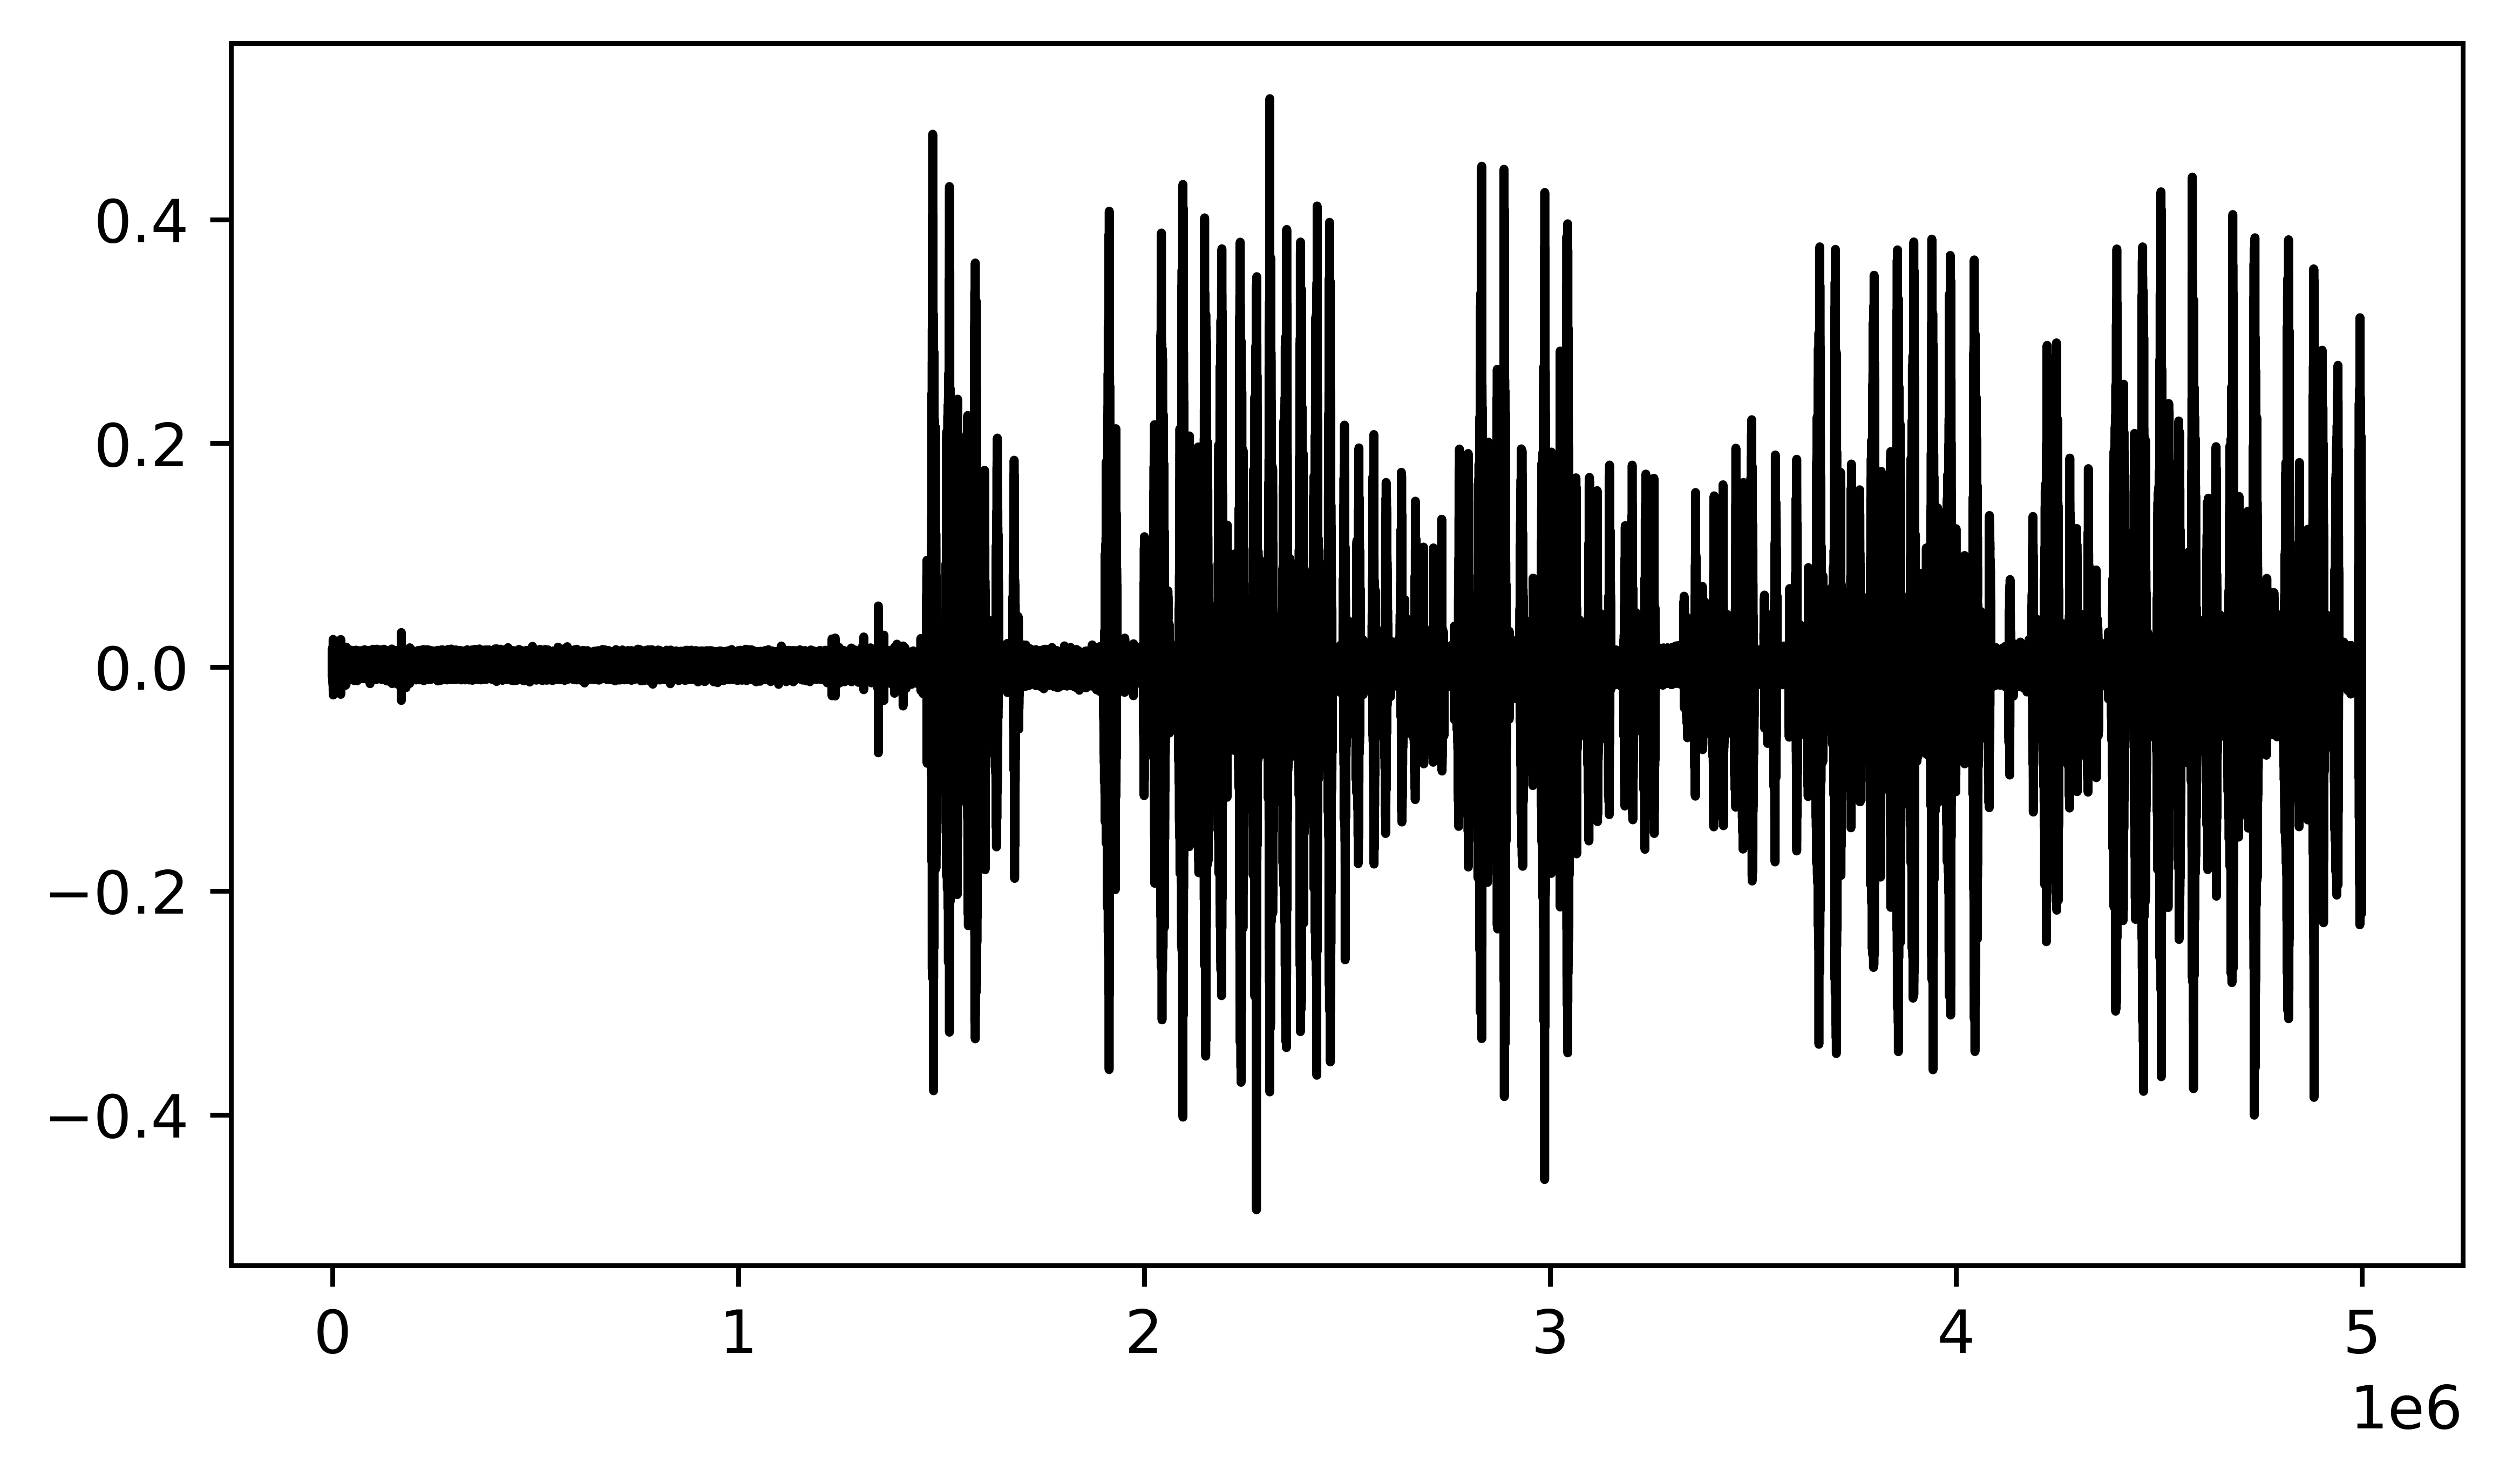

In [79]:
for i in range(int(len(FullSmooth)/1000000)-1):
    FullSmooth[i*1000000:(i+1)*1000000] -= np.average(FullSmooth[i*1000000:(i+1)*1000000])

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FullSmooth[500:5000000])
plt.show()

In [1]:
FullVelocity = getVelocity(FullSmooth[2000:24500000], ODataSet[2000:24500000,2])

FullVelocity *= 9.81

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FullVelocity)
plt.show()

NameError: name 'getVelocity' is not defined

In [82]:

def dualGraph(ODataSet, start, length):
    end = start + length

    FillteredAcceleration = cf.Smoothing(ODataSet[start-500:end,3],3)

    FillteredAcceleration -= np.average(FillteredAcceleration)

    Vs = getVelocity(FillteredAcceleration[500:], ODataSet[start:end,2])

    #fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
    #plt.plot(Vs)
    #plt.show()

    #PointVairance = Vs[-1:] / len(Vs)
    #for i in range(len(Vs)):
    #    Vs[i] -=  PointVairance * i
    Vs *= 9.81

    #Vs -= 1

    #fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
    #plt.plot(Vs)
    #plt.show()

    fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 

    ax1.set_xlabel('Time') 
    ax1.set_ylabel('Velocity', color = 'red') 
    ax1.plot(range(len(Vs)), Vs, color = 'red', linestyle = 'dashed', label='Velocity' )
    ax1.tick_params(axis ='y', labelcolor = 'red') 
    plt.ylim(-6,6)
    legend_1 = ax1.legend(loc=2)
    legend_1.remove()

    # Adding Twin Axes

    ax2 = ax1.twinx() 

    ax2.set_ylabel('Acceleration', color = 'blue') 
    ax2.plot(range(len(Vs)), FillteredAcceleration[500:], color = 'blue', label='Acceleration') 
    ax2.tick_params(axis ='y', labelcolor = 'blue') 
    plt.ylim(-0.06,0.06)
    ax2.legend(loc=1)
    ax2.add_artist(legend_1)
    # Show plot

    plt.show()
    return 1

221011 recording2.csv (13793070, 7)


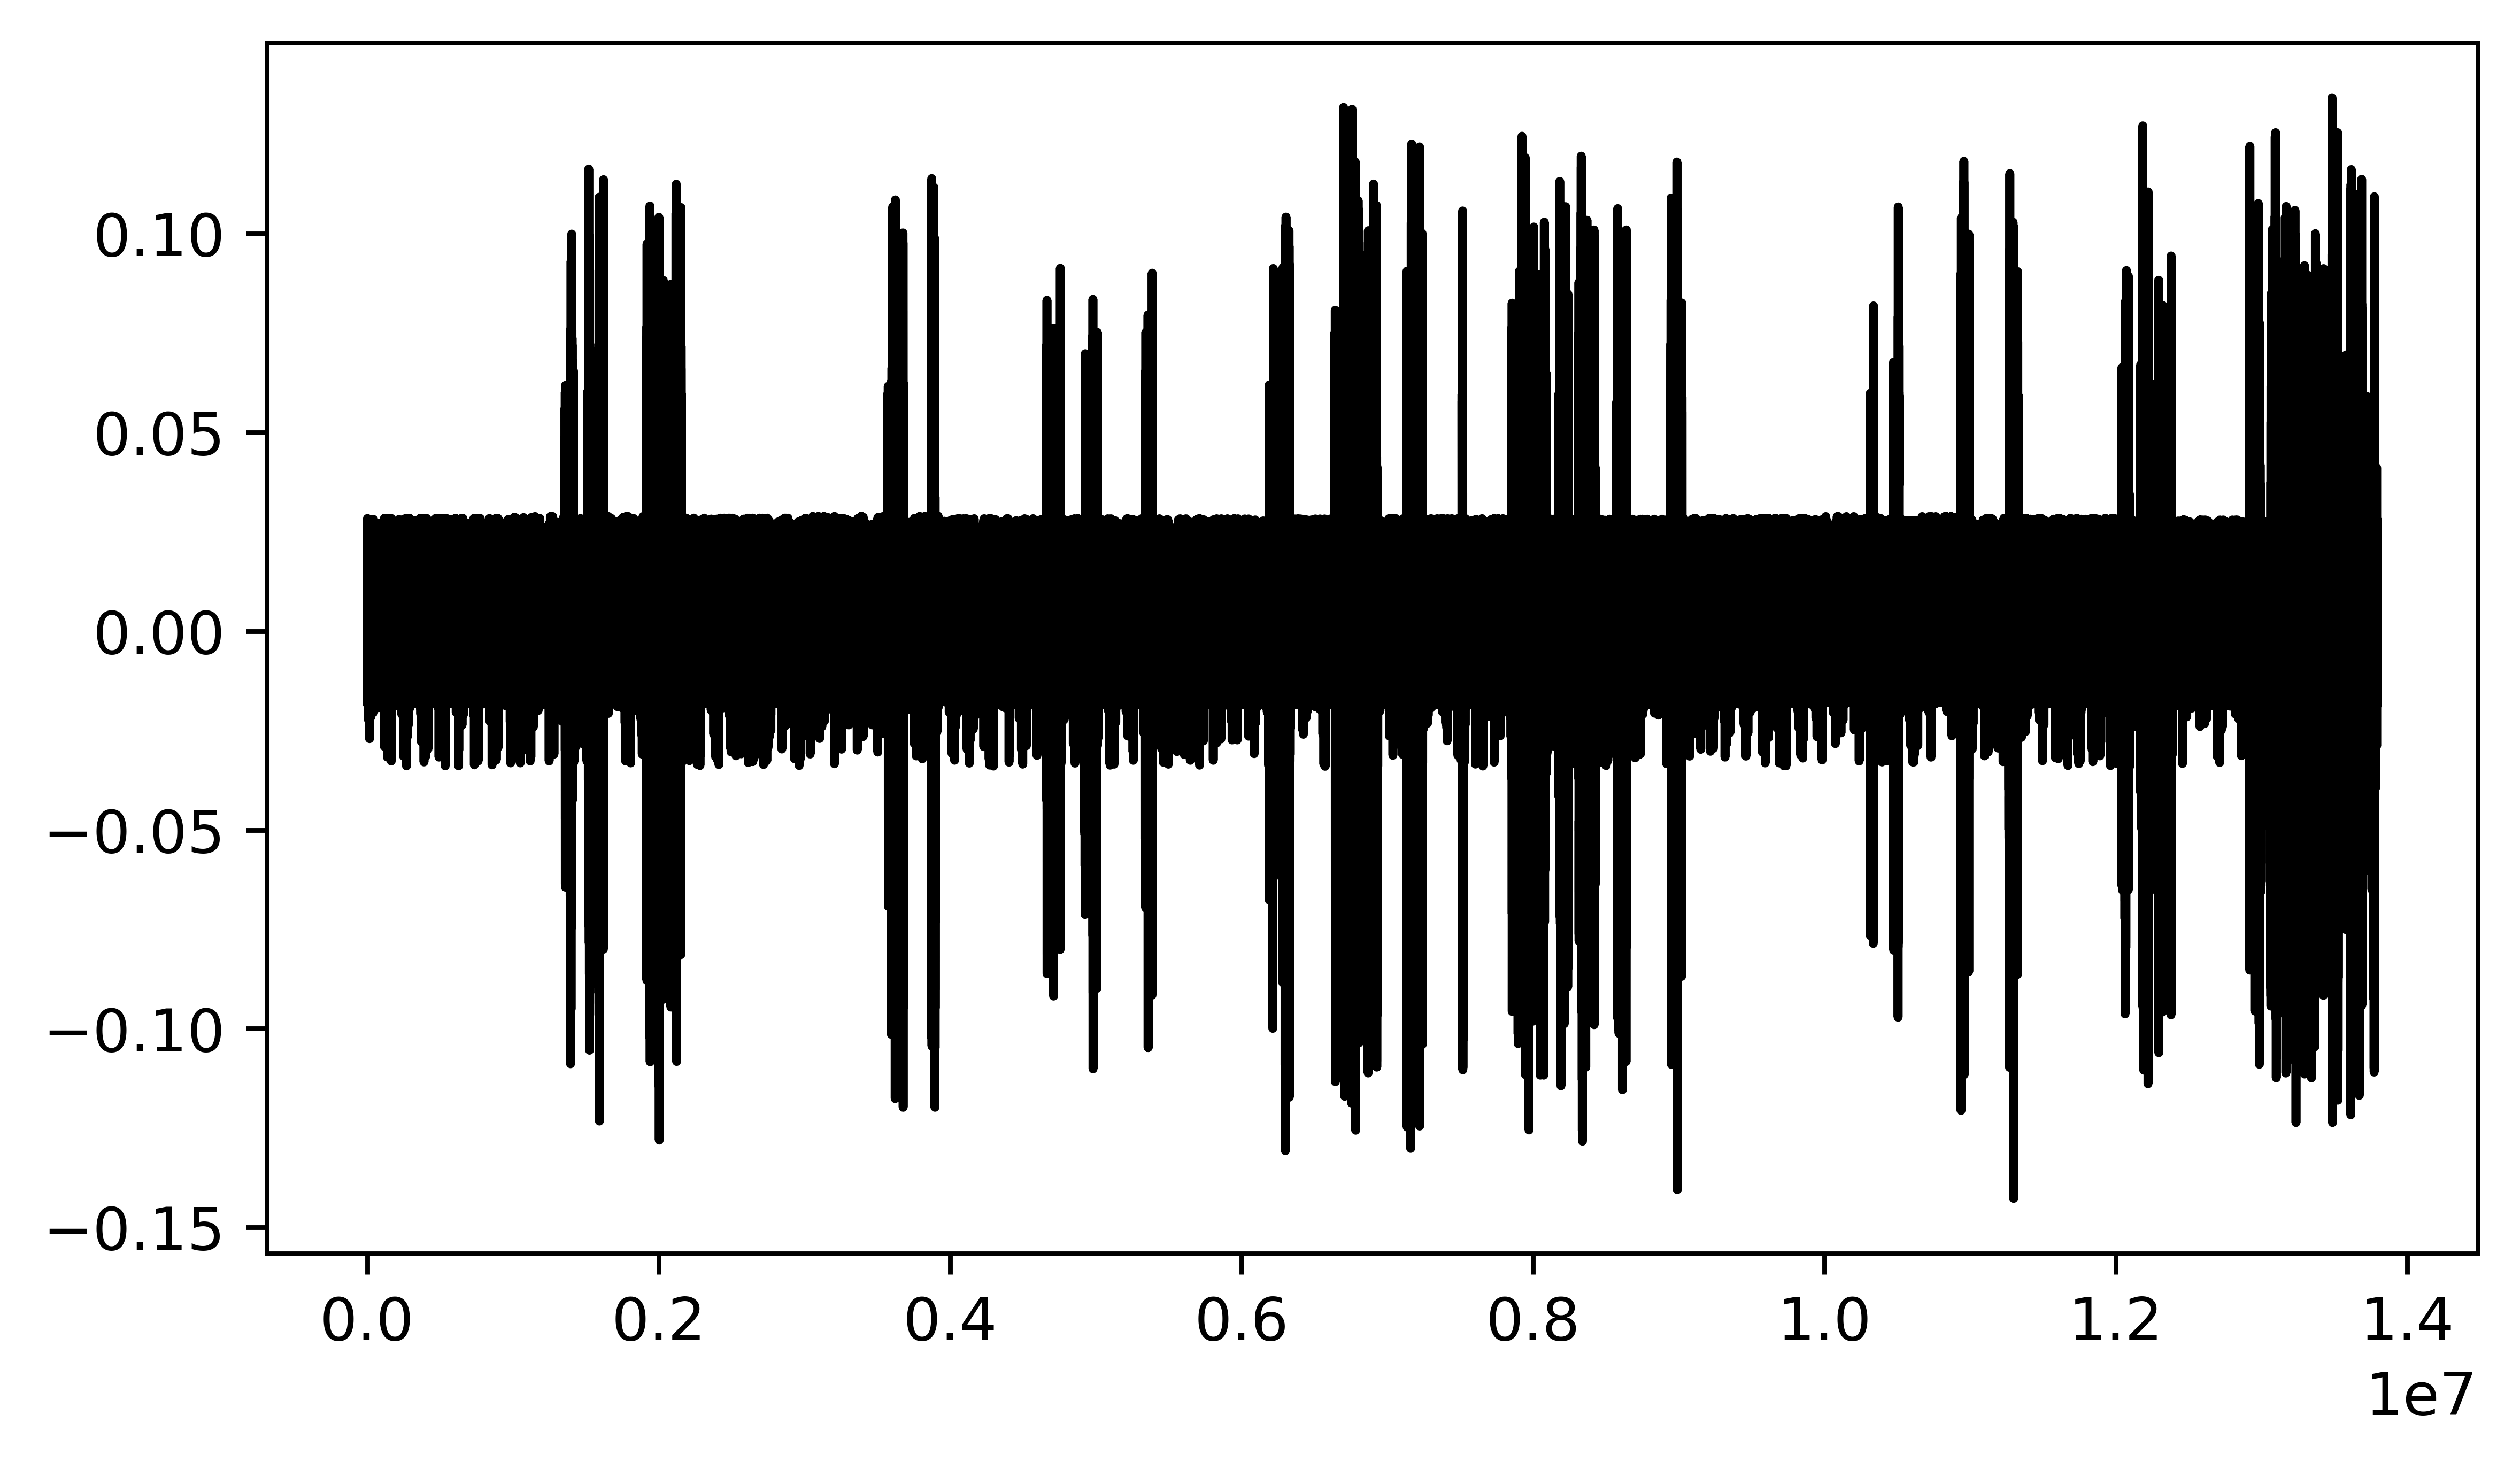

In [83]:
ODataSet = np.genfromtxt(open(folder+files[0],'r'), delimiter=',',skip_header=0)
print(files[1],np.shape(ODataSet))
FullSmooth = cf.Smoothing(ODataSet[:,3],2)
for i in range(int(len(FullSmooth)/1000000)-1):
    FullSmooth[i*1000000:(i+1)*1000000] -= np.average(FullSmooth[i*1000000:(i+1)*1000000])
    b = (i+1)*1000000
FullSmooth[b:] -= np.average(FullSmooth[b:])

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(FullSmooth)
plt.show()

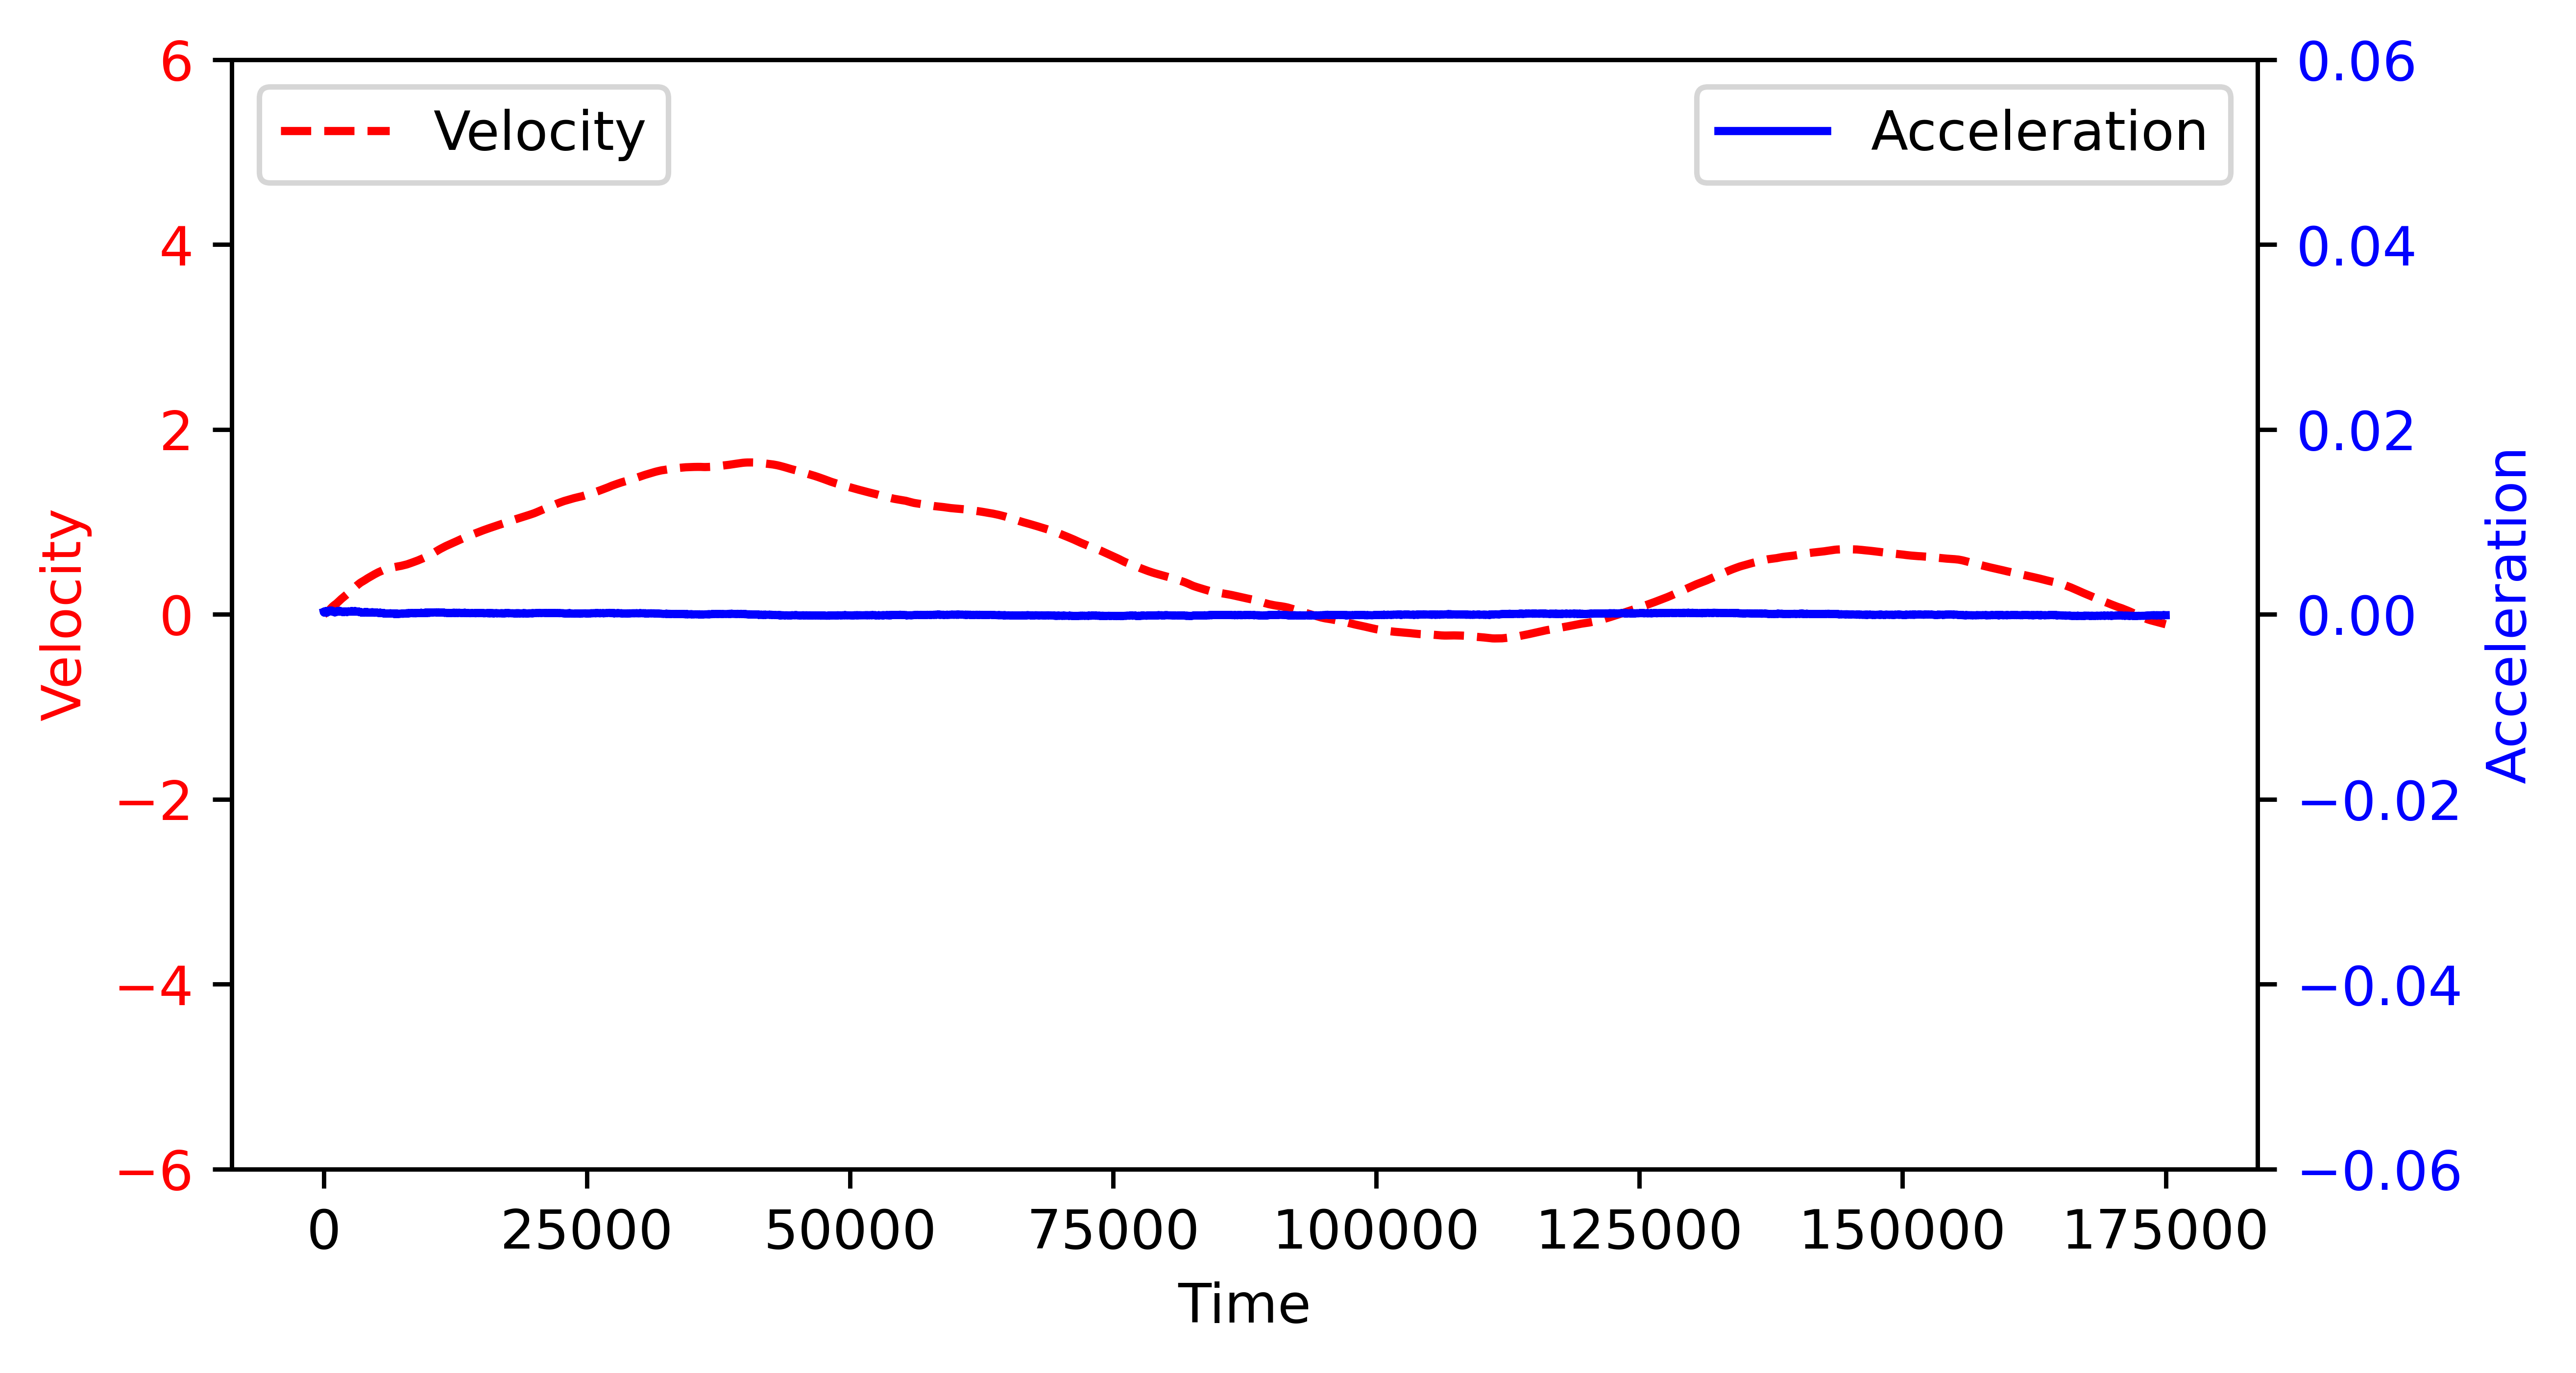

In [84]:
h = dualGraph(ODataSet, 2525000, 175000)

In [85]:
from skimage.restoration import denoise_wavelet
default_cycler = (cycler('color', ['0.40', '0.00', '0.60', '0.70']) + cycler(linestyle=['-', '-', ':', '-.']))

In [86]:
from scipy import signal

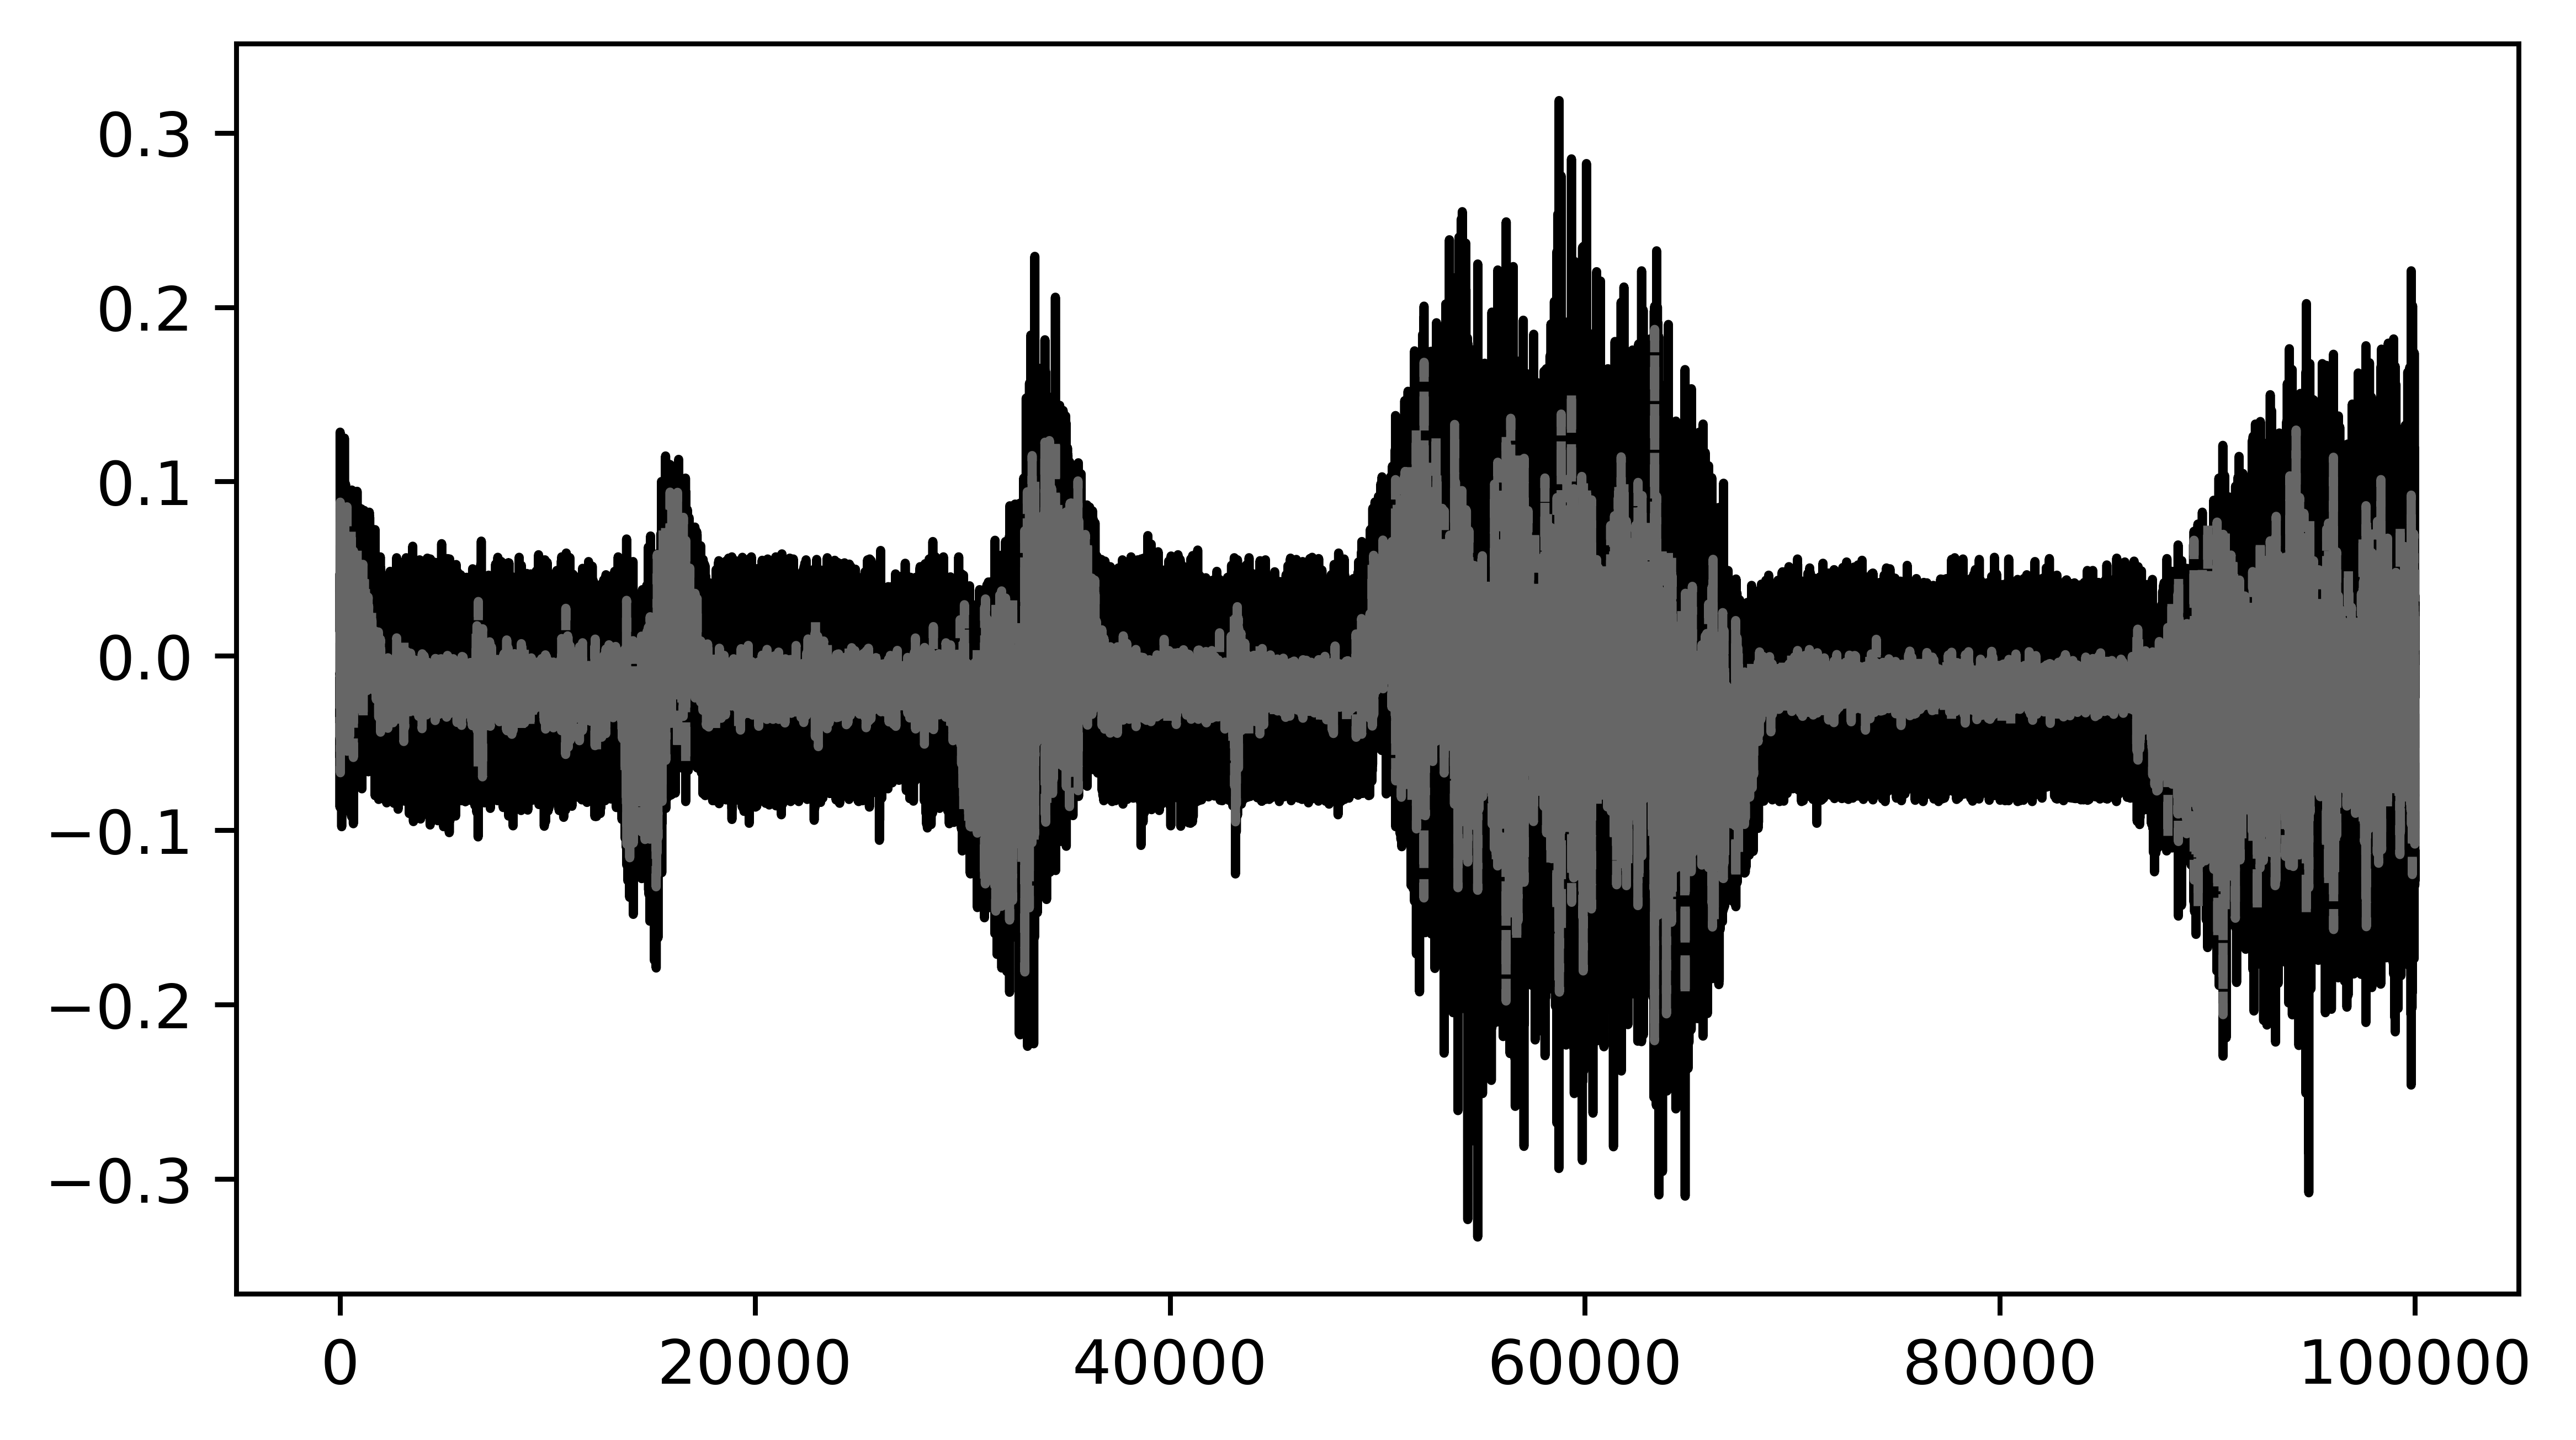

In [87]:

ODataSet = np.genfromtxt(open(folder+files[1],'r'), delimiter=',',skip_header=0)
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(ODataSet[1800000:1900000,3])
ODataSet[:,3] = denoise_wavelet(ODataSet[:,3], method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym2', rescale_sigma='True')
plt.plot(ODataSet[1800000:1900000,3])
plt.show()

TypeError: butter() missing 2 required positional arguments: 'N' and 'Wn'

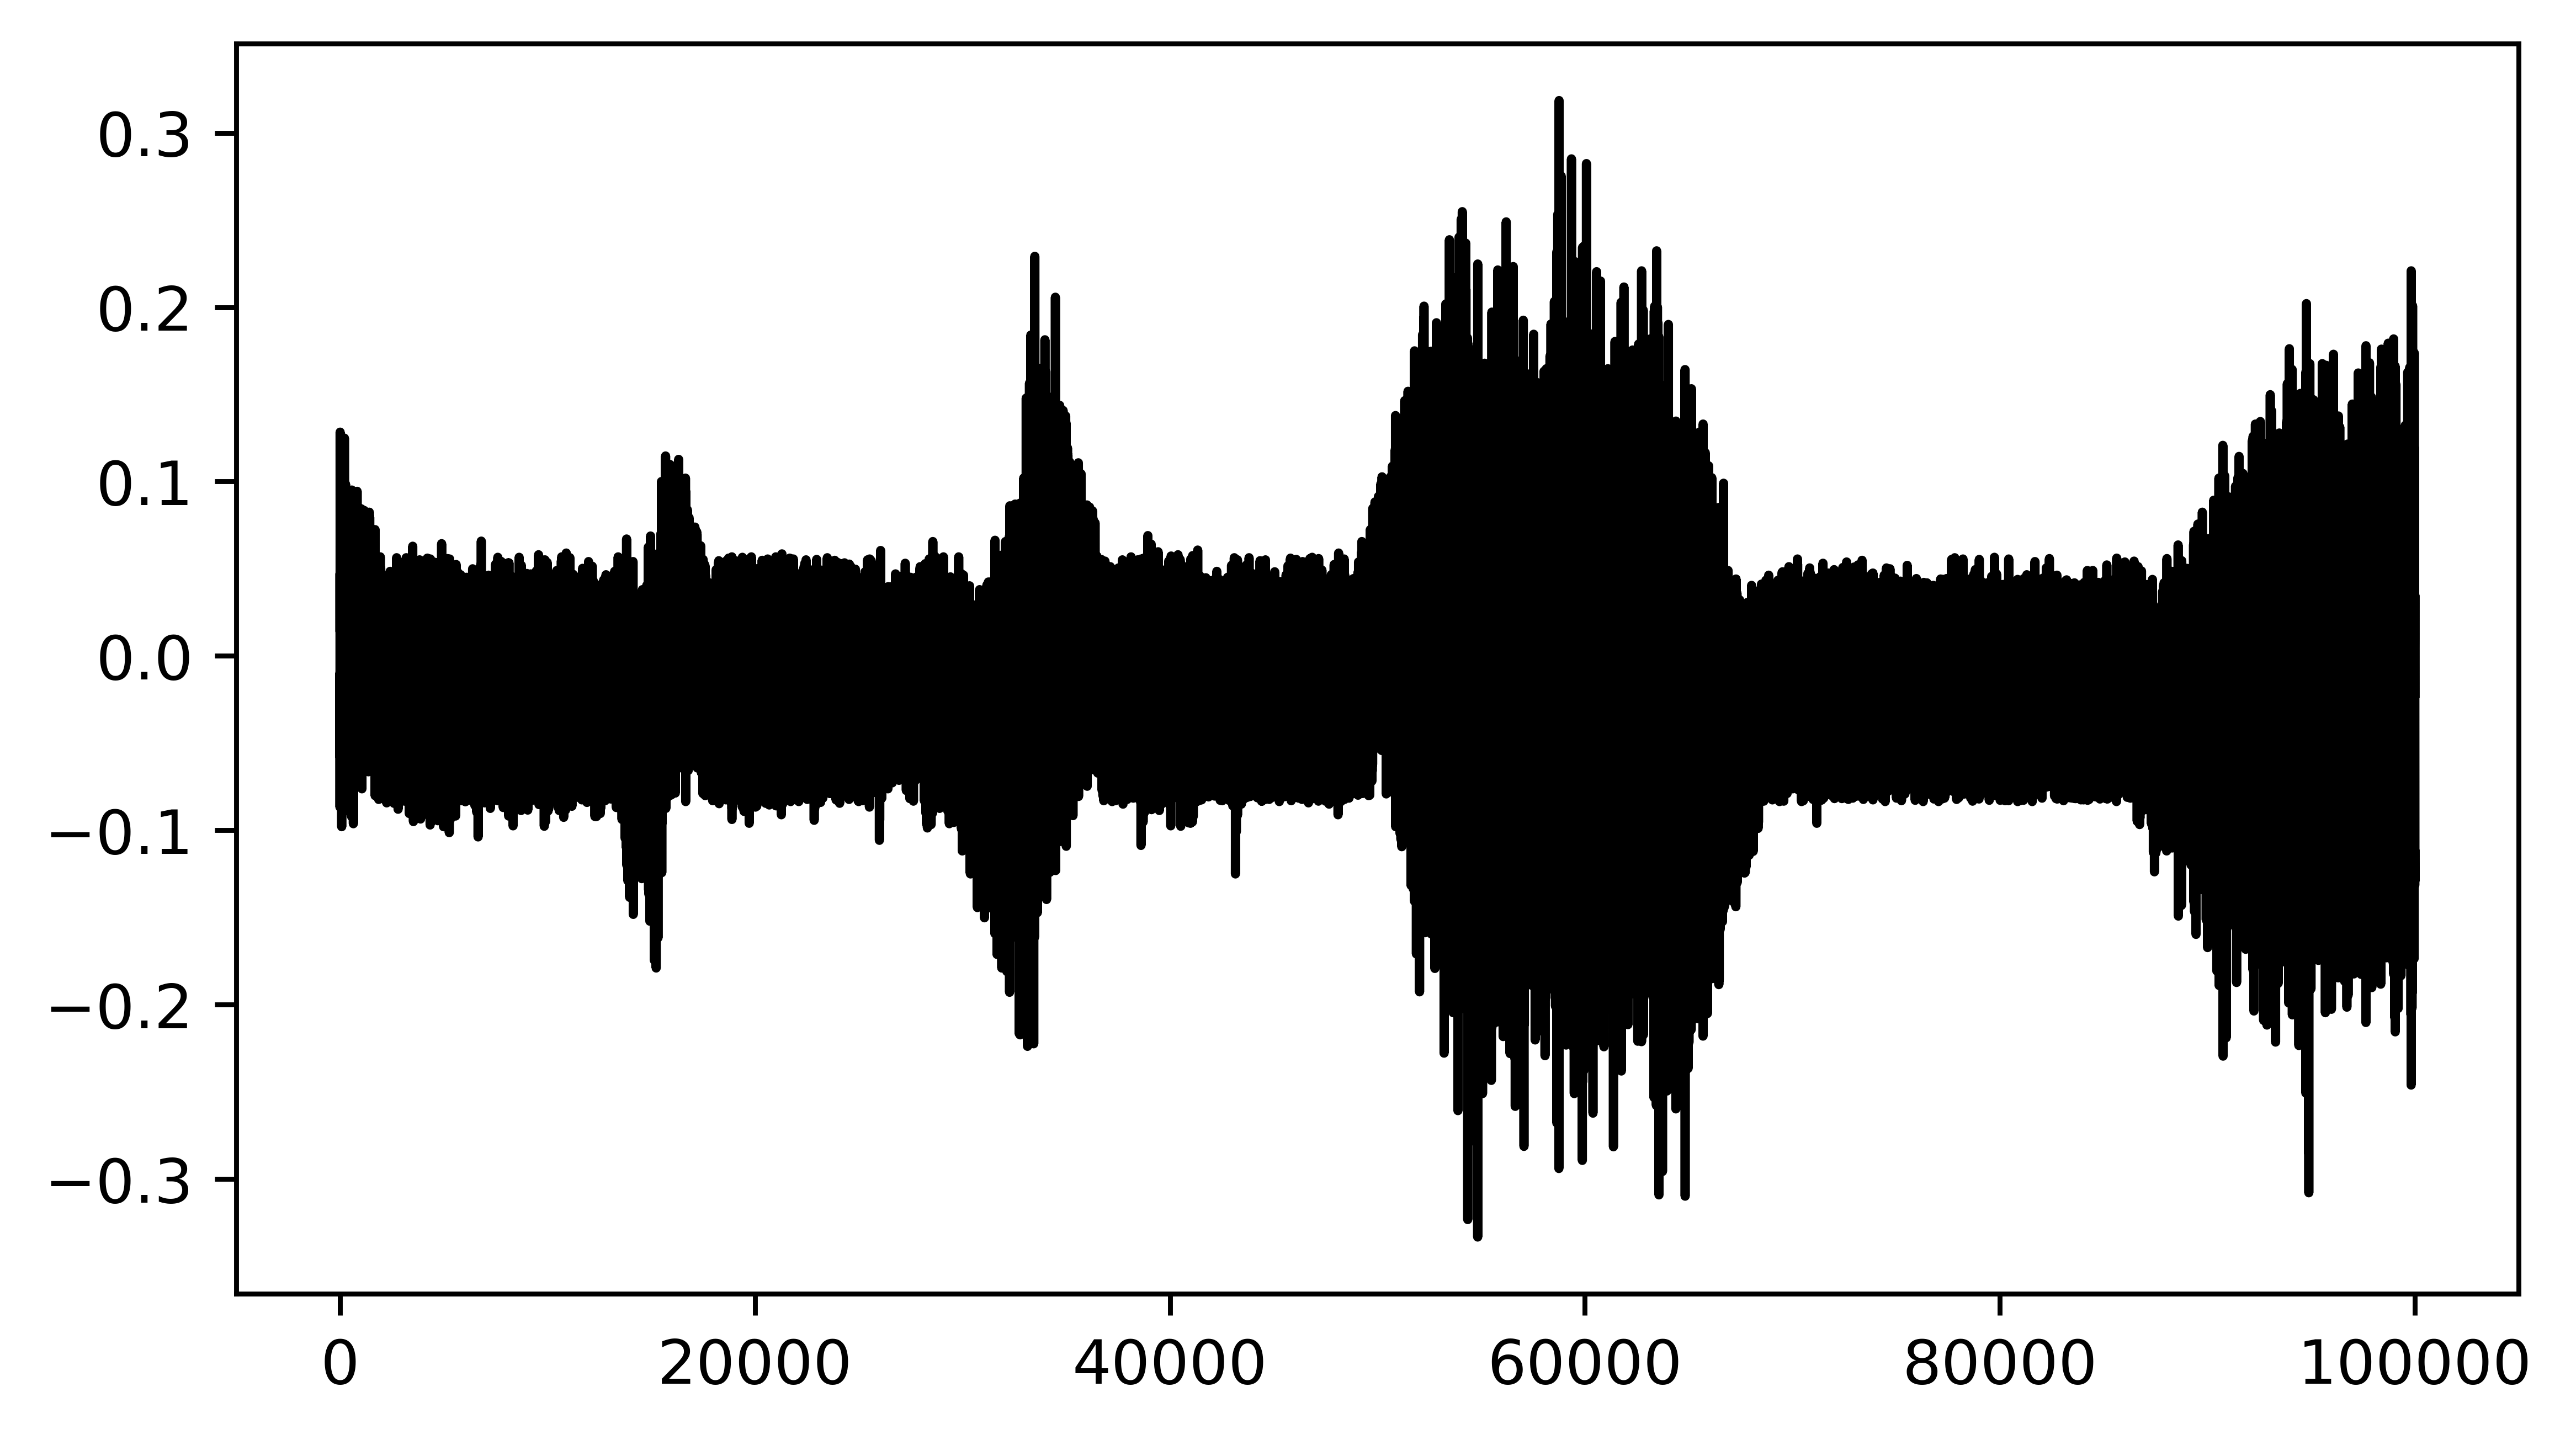

In [88]:

ODataSet = np.genfromtxt(open(folder+files[1],'r'), delimiter=',',skip_header=0)
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(ODataSet[1800000:1900000,3])
ODataSet[:,3] = signal.butter()
plt.plot(ODataSet[1800000:1900000,3])
plt.show()

In [ ]:
h = dualGraph(ODataSet, 1984000, 235000)

In [89]:
averageLength = 100000
#halfAverage = averageLength / 2
#halfAverage = int(halfAverage)
#loops = len(FV)/(halfAverage) - 1
loops = len(ODataSet[:,3])/(averageLength) - 1
loops = int(loops)
Vel = []
for i in range(loops):
    start = i*averageLength
    end = start + averageLength
    sV = getVelocity(ODataSet[start:end,3],ODataSet[start:end,2])
    PointVairance = sV[-1:] / averageLength
    if PointVairance < 0:
        PointVairance *= -1
    for j in range(averageLength):
        sV[j] -=  PointVairance * j
    Vel = np.concatenate((Vel,sV), axis = 0)

sV = getVelocity(ODataSet[end:,3],ODataSet[end:,2])
PointVairance = sV[-1:] / len(sV)
for j in range(len(sV)):
    sV[j] -=  PointVairance * i 
Vel = np.concatenate((Vel,sV), axis = 0)
    

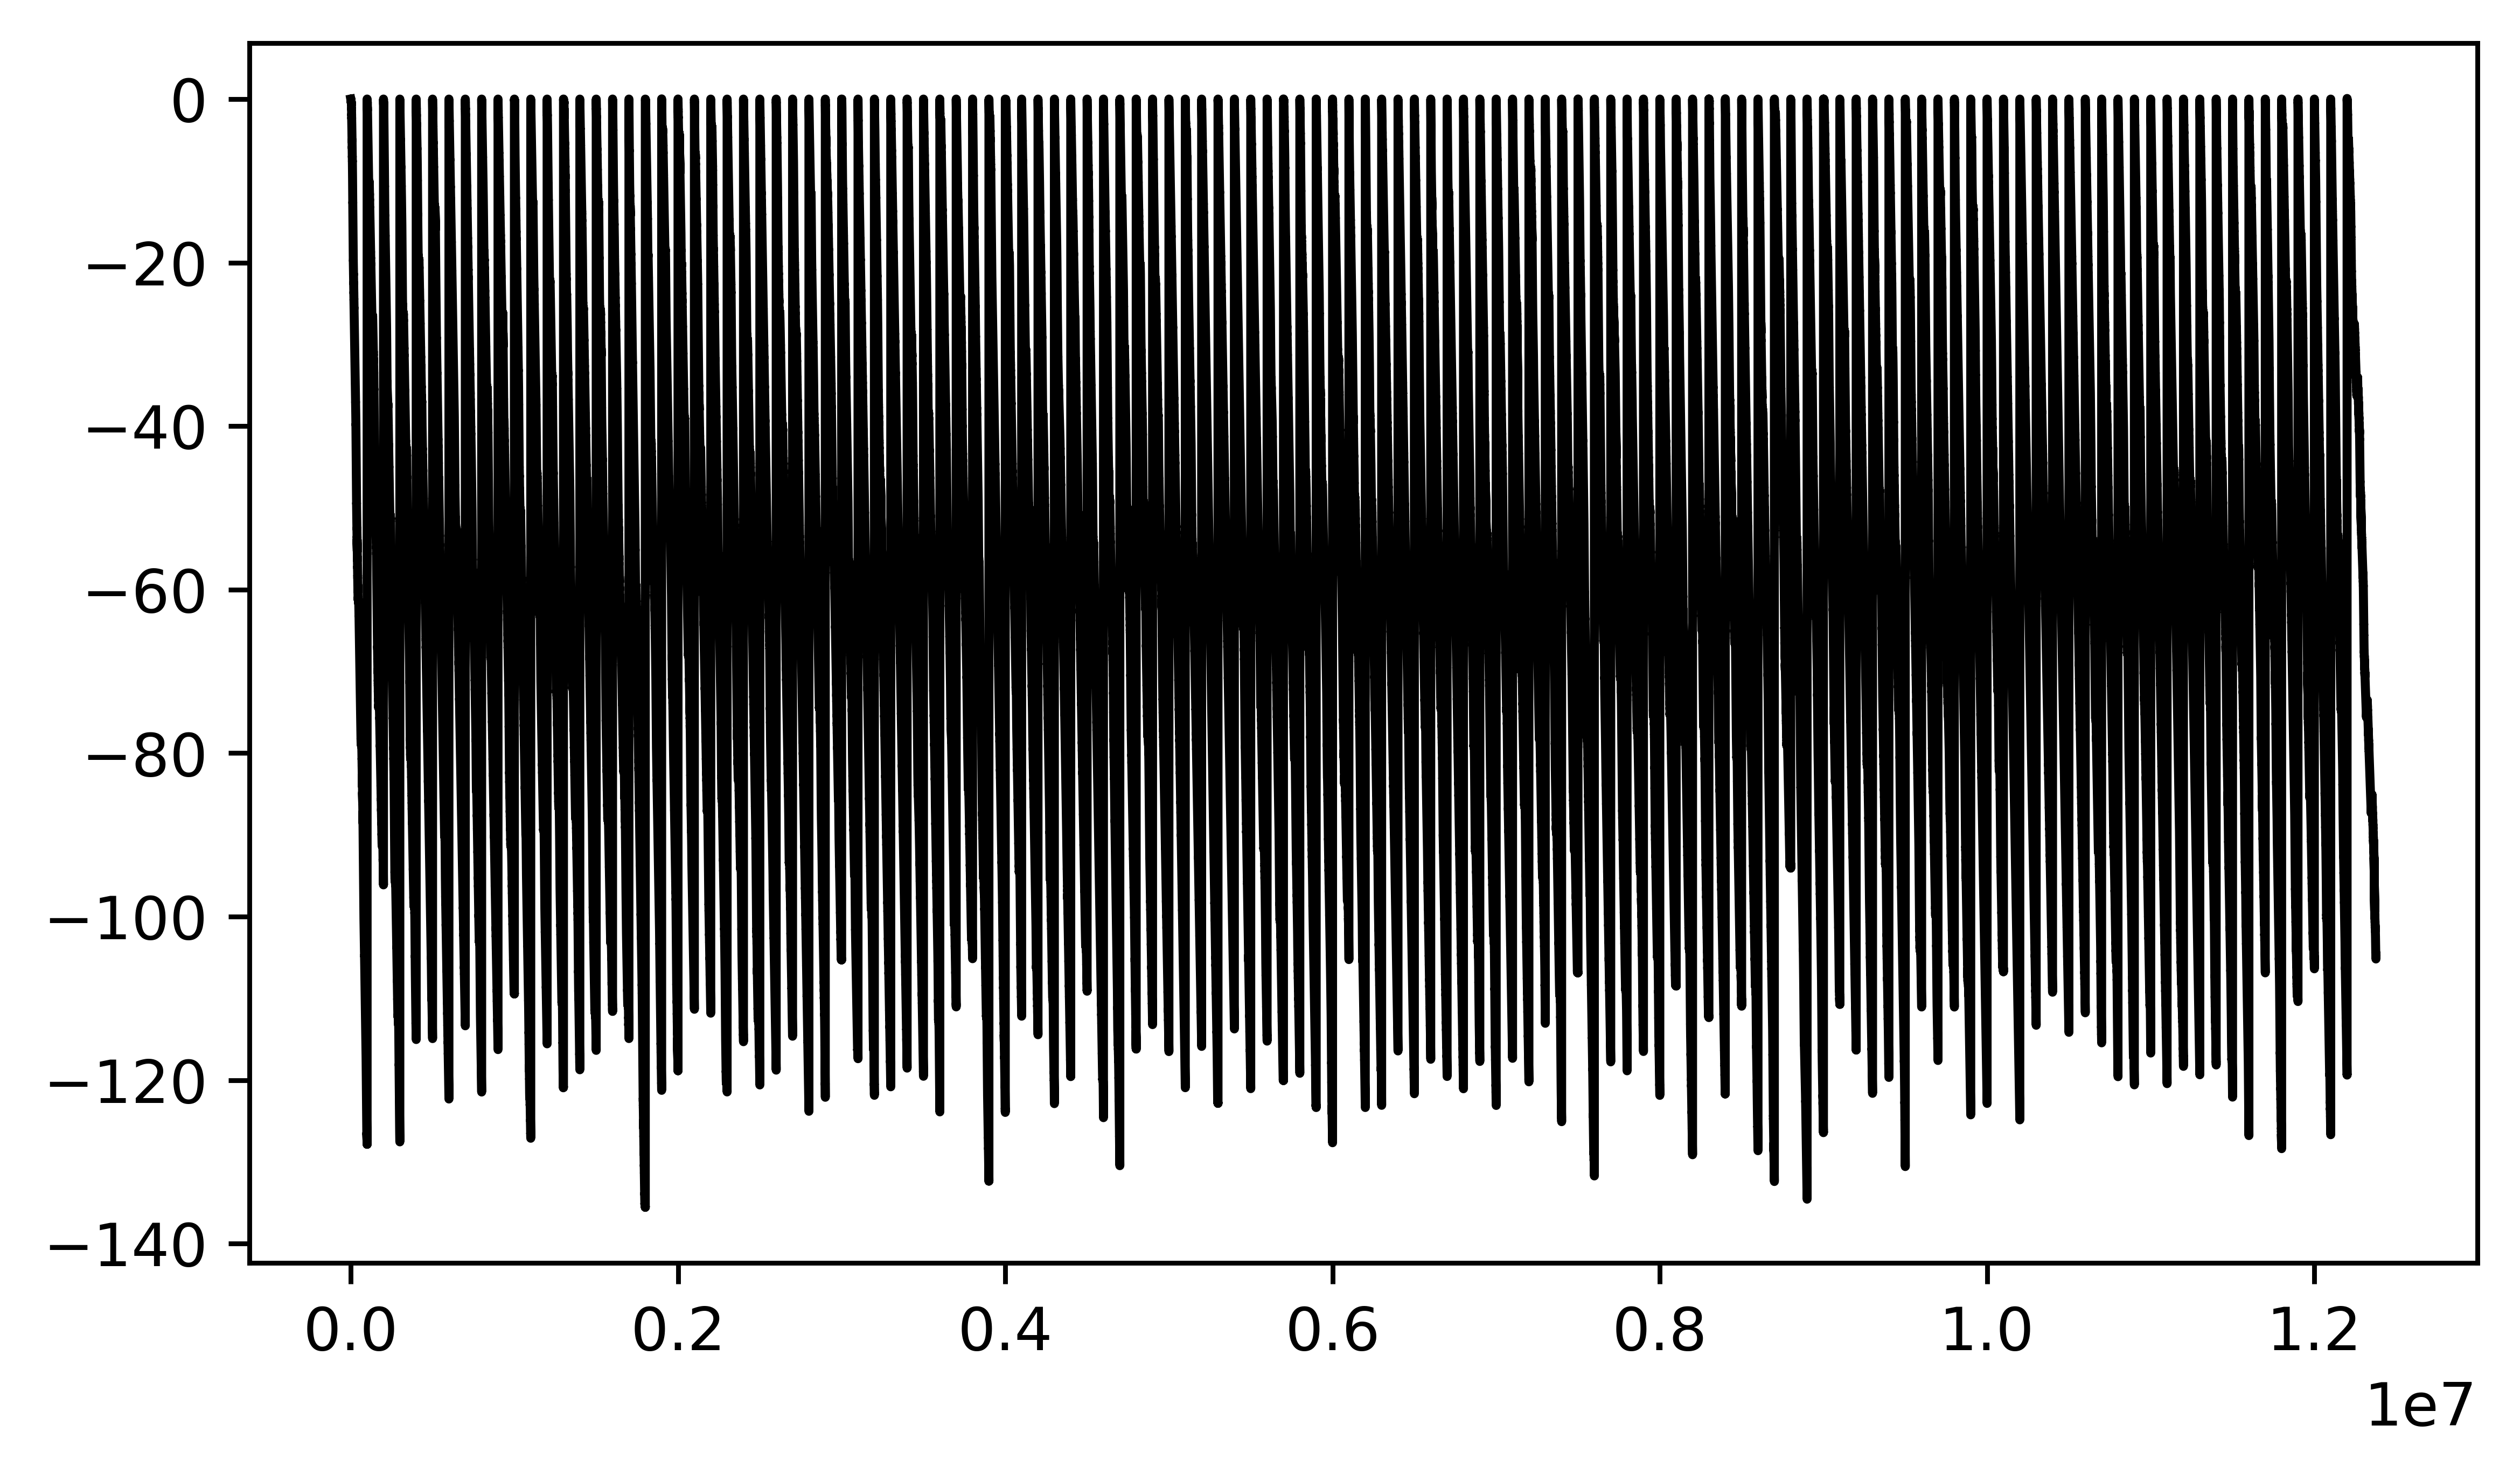

In [90]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(Vel)
plt.show()

In [ ]:
from statistics import stdev


Timestamps = ODataSet[:,2]
totTime = 0
tStep = []
for i in range(len(ODataSet)-1):
            if Timestamps[i]<Timestamps[i+1]:
                totTime += (Timestamps[i+1] - Timestamps[i])
                tStep.append(Timestamps[i+1] - Timestamps[i])
            else:
                totTime += (Timestamps[i+1] - Timestamps[i] + 10000)
                tStep.append(Timestamps[i+1] - Timestamps[i] + 10000)
dTime = totTime / len(Timestamps)

print(min(tStep))
print(max(tStep))
print(stdev(tStep))


In [ ]:
Step = 50000
ZoomSize = 100000

fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 
ax2 = ax1.twinx() 

ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red')     
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
ax2.set_ylabel('Acceleration', color = 'blue') 

def animate(i):
    start = i * Step
    end = start + ZoomSize 
    
    LbPX = cf.Smoothing(ODataSet[start:end,3],2)
    Vs = getVelocity(LbPX, ODataSet[start:end,2])

    PointVairance = Vs[-1:] / len(Vs)
    for i in range(len(Vs)):
        Vs[i] -=  PointVairance * i
    Vs *= 9.81

    ax1.plot(range(len(Vs)), Vs, color = 'red', linestyle = 'dashed' )
    ax2.plot(range(len(Vs)), LbPX, color = 'blue') 

    plt.title('Data Points ' +str(start) + ' : ' + str(end))
    
    #time.sleep(1)
    return ax1, ax2



In [ ]:
import matplotlib.animation as ani


In [ ]:

anim = ani.FuncAnimation(fig, animate, frames=(100))

anim.save('animation.gif')



        #for i in range(int(length/size)):
        for i in range(3):
            # StdDev = np.zeros(length)
            # StdDevSmooth = np.zeros(length)
            coord = i+2
            
            SmoothRDataSet[0] = 0
            SmoothXDataSet[0] = 0
            # StdDev[0]=0
            # StdDevSmooth[0]=0

            fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)

            #factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            #TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            #TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            #for j in range(Arange-1):
            #    k = j+2
            #    TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            #for j in range(length-Arange):
            #    k = (length-1)-j
            #    TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                smooth[k,i] = np.average(ODataSet[0:k,coord])
                #SmoothXDataSet[k] = np.average(ODataSet[0:k,coord])
                #StdDev[k]=st.stdev(ODataSet[0:k,coord])
                #StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
                #SmoothRDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                smooth[k,i] = np.average(ODataSet[k-Arange:k,coord])
                #SmoothXDataSet[k] = np.average(ODataSet[k-Arange:k,coord])
                #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
                #StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
                #SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
            
            plt.plot(ODataSet[:,coord], label = 'Original ' + Header[coord])
            plt.plot(smooth[:,i], label = 'Smooth ' + Header[coord])
            #plt.plot(SmoothXDataSet[:], label = 'Smooth ' + Header[coord])
            #plt.plot(TdDataSet[start:end]) #, label = 'Smoothed Signal')
            #plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            #plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')
            
            plt.title(Filename + Header[coord])
            if Saving: plt.savefig(location+Filename+Header[coord].replace(" ", "").replace(":", "").replace(",", "")+FFormat)
            plt.show()
            #print(title,max(StdDev),max(SmoothXDataSet[start:end]))
        
        # title = Filename #+ ' ' + Header[coord]
        # if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        
        # if Ledgends: plt.legend()
        # if Titles: plt.title(title)
        
        # plt.show()
        
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

Saving = True
Titles = True

In [ ]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [ ]:
#trys = ['coif1','coif2','mexh','gaus2','dmey','gaus1','morl','cgau1','cgau2','db1','db2','sym1','sym2','sym3']
#trys = ['coif2','mexh','gaus2','db1','sym2']
#trys = ['gaus2'] #,'gaus1','gaus2','gaus3','gaus5']
wvlt = 'gaus2'

Titles = False
Saving = True

Saving = False
Titles = True

start = 1400
end = 3100
coord = 1
scales = 50
slices = 20
trim = 100

#for segmenets in range(24):
#    start = segmenets * 2500
#    end = start + 5000
#for id in trys:
    #try:
#        for cord in range(1):
#           coord = cord + 1
            #PlotFingerPrint(ODataSet[start:end,coord],'a','Raw data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(SmoothDataSet[start:end,coord],'a','Smoothed data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDev[start:end],'a',id + 'StdDev from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDevSmooth[start:end],'a',id + 'Wavelet from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(TdDataSet[start:end],'a',id + 'Wavelet on r series from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(SmoothDataSet[start:end],'a','Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            
    #except:
#        print(id)

In [ ]:
for i in range(3):
    coord = i+2
    FpScat = fp.getLabeledThumbprint(smooth[start:end,i], wvlt,scales,slices,0.12,'both')
    #FpScat = fp.getLabeledThumbprint(ODataSet[start:end,coord], wvlt,scales,slices,0.12,'both')
    PlotFingerPrint(FpScat,'a',Header[coord],wvlt,scales,slices,trim)

In [ ]:
np.shape(ODataSet)

In [ ]:
#y = np.linspace(0, BeamLength, np.shape(CenterZResults[0][0])[1])
#x = np.linspace(0, BeamHeight, np.shape(CenterZResults[0][0])[0])

import matplotlib.animation as animation


Spacing = 4
ZoomSize = 200
Step = int(ZoomSize/Spacing)
Length = np.shape(FpScat)[1]
Frames = int(Length/ZoomSize)*Spacing - Spacing + 2

y = np.linspace(0, scales, scales)
x = np.linspace(0, ZoomSize, ZoomSize)
x,y = np.meshgrid(x,y)

fig = plt.figure(plt.figure(figsize=(6.67,3.75)),dpi=600)
#ax = plt.axes(xlim=(0, BeamHeight), ylim=(0, BeamLength))  

plt.ylabel(r'scales')
plt.xlabel(r'time')


print(Length, Frames)

def animate(i):
    start = i * Step
    end = start + ZoomSize 
    #print(i,start,end)
    z = np.matrix(FpScat[:,start:end])
    plt.title('Data Points ' +str(start) + ' : ' + str(end))
    cont = plt.contourf(x, y, z, levels=scales, cmap='gray',vmin=-100, vmax=100)
    #time.sleep(1)
    return cont  

anim = animation.FuncAnimation(fig, animate, frames=30)

anim.save('animation.gif')

In [ ]:
PlotFingerPrint(FpScat,'a',Filename[:-4] + ' Wavelet on r series from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [ ]:
FpScatR = fp.getLabeledThumbprint(SmoothRDataSet[start:end], wvlt,scales,slices)

In [ ]:
PlotFingerPrint(FpScatR,'a',Filename[:-4] + ' Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [ ]:
FpScatX = fp.getLabeledThumbprint(SmoothXDataSet[start:end], wvlt,scales,slices)

In [ ]:
PlotFingerPrint(FpScatX,'a','Smoothed X data from '+str(start)+' to '+str(end),id,scales,slices,trim)